# Practica_IAA_2

In [1]:
# Uncomment to upgrade packages
#!pip install pandas --user --upgrade --quiet
#!pip install numpy --user --upgrade --quiet
#!pip install scipy --user --upgrade --quiet
#!pip install statsmodels --user --upgrade --quiet
#!pip install seaborn --user --upgrade --quiet
#!pip install scikit-learn --user --upgrade --quiet

%load_ext autoreload

<div class="alert alert-block alert-info">

**INSTRUCCIONS**

No cal entregar res, cal assimilar

S'ha de fer amb calma, sense córrer, mirant d'entendre en tot moment què s'està fent **a nivell conceptual** i quin efecte té

 Podeu deixar el codi python en si (crides, paràmetres, sintaxi) per una segona lectura o com a treball personal. El codi python és un mitjà, no un objectiu.
 
</div>

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings

InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')

In [3]:
# extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # linia nova
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
import copy # linia nova

In [4]:
pd.__version__

'1.5.0'

## SECTION 1: Anàlisis i preprocessat de dades

In [5]:
Cust = read_csv("telecom_customer_churn.csv",header=0, delimiter=',')


Cust.describe(include = 'all')
Cust.info()

Customer ID Gender      Age Married  Number of Dependents         City  \
count         7043   7043  7043.00    7043              7043.000         7043   
unique        7043      2      NaN       2                   NaN         1106   
top     0002-ORFBO   Male      NaN      No                   NaN  Los Angeles   
freq             1   3555      NaN    3641                   NaN          293   
mean           NaN    NaN    46.51     NaN                 0.469          NaN   
std            NaN    NaN    16.75     NaN                 0.963          NaN   
min            NaN    NaN    19.00     NaN                 0.000          NaN   
25%            NaN    NaN    32.00     NaN                 0.000          NaN   
50%            NaN    NaN    46.00     NaN                 0.000          NaN   
75%            NaN    NaN    60.00     NaN                 0.000          NaN   
max            NaN    NaN    80.00     NaN                 9.000          NaN   

         Zip Code  Latitude  Longitude  Number of Referrals  ...  \
count    7043.000  7043.000   7043.000             7043.000  ...   
unique        NaN       NaN        NaN                  NaN  ...   
top           NaN       NaN        NaN                  NaN  ...   
freq          NaN       NaN        NaN                  NaN  ...   
mean    93486.071    36.197   -119.757                1.952  ...   
std      1856.768     2.469      2.154                3.001  ...   
min     90001.000    32.556   -124.301                0.000  ...   
25%     92101.000    33.991   -121.788                0.000  ...   
50%     93518.000    36.205   -119.595                0.000  ...   
75%     95329.000    38.161   -117.970                3.000  ...   
max     96150.000    41.962   -114.193               11.000  ...   

         Payment Method Monthly Charge Total Charges  Total Refunds  \
count              7043       7043.000      7043.000       7043.000   
unique                3            NaN           NaN            NaN   
top     Bank Withdrawal            NaN           NaN            NaN   
freq               3909            NaN           NaN            NaN   
mean                NaN         63.596      2280.381          1.962   
std                 NaN         31.205      2266.220          7.903   
min                 NaN        -10.000        18.800          0.000   
25%                 NaN         30.400       400.150          0.000   
50%                 NaN         70.050      1394.550          0.000   
75%                 NaN         89.750      3786.600          0.000   
max                 NaN        118.750      8684.800         49.790   

       Total Extra Data Charges Total Long Distance Charges Total Revenue  \
count                  7043.000                    7043.000      7043.000   
unique                      NaN                         NaN           NaN   
top                         NaN                         NaN           NaN   
freq                        NaN                         NaN           NaN   
mean                      6.861                     749.099      3034.379   
std                      25.105                     846.660      2865.205   
min                       0.000                       0.000        21.360   
25%                       0.000                      70.545       605.610   
50%                       0.000                     401.440      2108.640   
75%                       0.000                    1191.100      4801.145   
max                     150.000                    3564.720     11979.340   

        Customer Status Churn Category                   Churn Reason  
count              7043           1869                           1869  
unique                3              5                             20  
top              Stayed     Competitor  Competitor had better devices  
freq               4720            841                            313  
mean                NaN            NaN                            NaN  
std    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

### Anàlisi de correlació de les variables

Abans de mirar correlacions eliminarem aquelles variables que considerem que aportaran un comportament pitjor al nostre model

In [6]:
Cust_ch = Cust.loc[Cust['Customer Status'] == 'Churned']

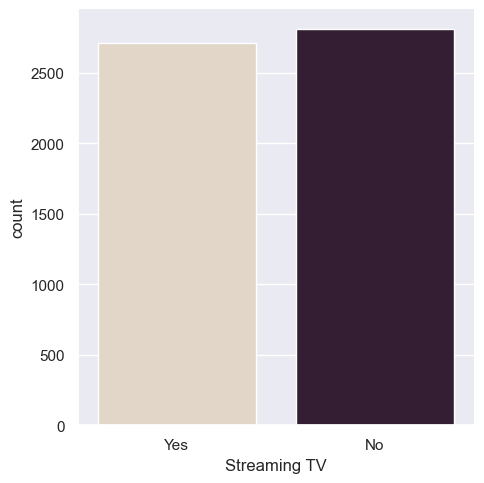

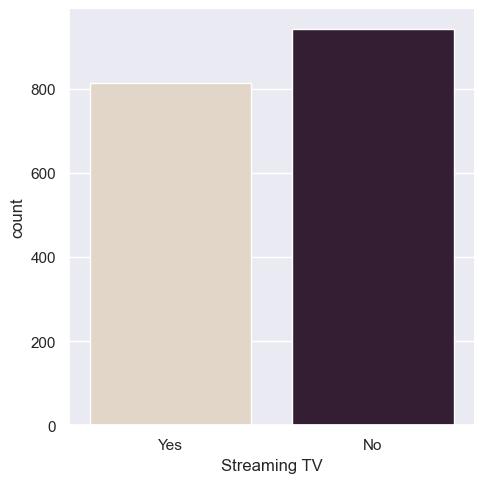

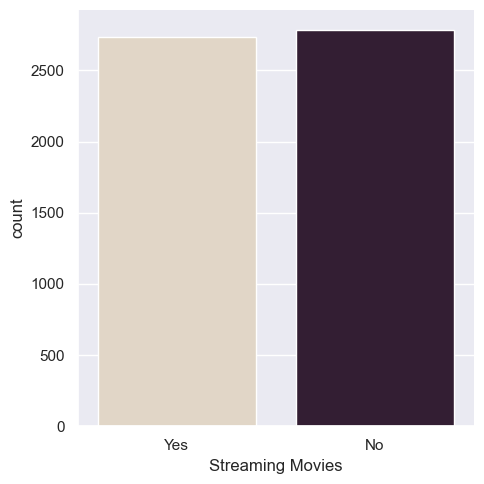

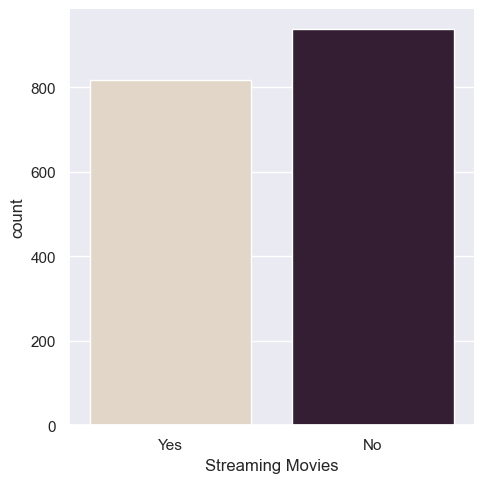

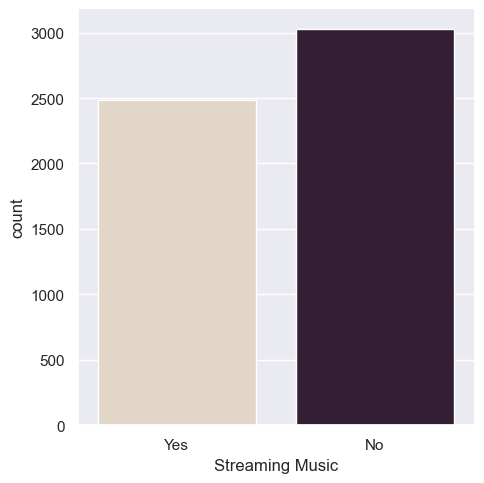

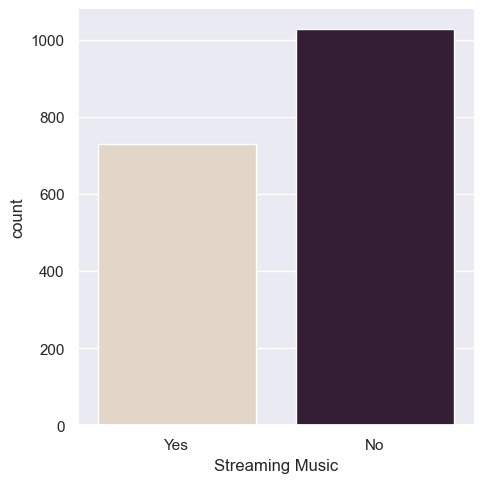

In [7]:
# Variables Streaming  
sns.catplot(data=Cust, x="Streaming TV", kind="count", palette="ch:.25", order=['Yes','No'])
sns.catplot(data=Cust_ch, x="Streaming TV", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust, x="Streaming Movies", kind="count", palette="ch:.25", order=['Yes','No'])
sns.catplot(data=Cust_ch, x="Streaming Movies", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust, x= "Streaming Music", kind="count", palette="ch:.25", order=['Yes','No'])
sns.catplot(data=Cust_ch, x= "Streaming Music", kind="count", palette="ch:.25", order=['Yes','No'])


In [8]:
# Juntem variables streaming 
n_stream = []
stream_services = ['Streaming TV','Streaming Movies','Streaming Music']
for row in Cust.index:
    count = 0
    for service in stream_services:
        if Cust[service][row] == 'Yes':
            count += 1
    n_stream.append(count)
Cust['Numero Streams'] = n_stream


In [9]:
# Juntem variables serveis premium  
n_services = []
premium_services = ['Online Backup','Online Security', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data' ]
for row in Cust.index:
    count = 0
    for service in premium_services:
        if Cust[service][row] == 'Yes':
            count += 1
    n_services.append(count)
Cust['Premium Services'] = n_services


<AxesSubplot: >

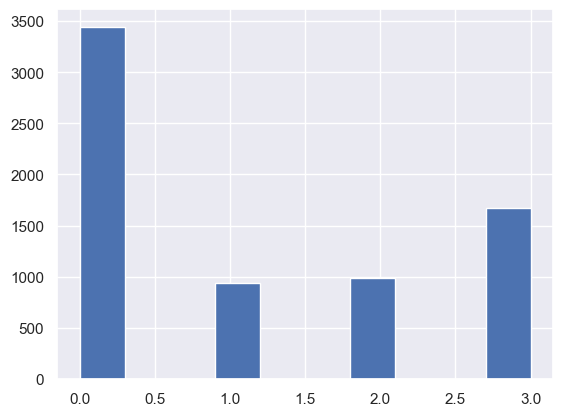

In [10]:
Cust['Numero Streams'].hist()

<AxesSubplot: >

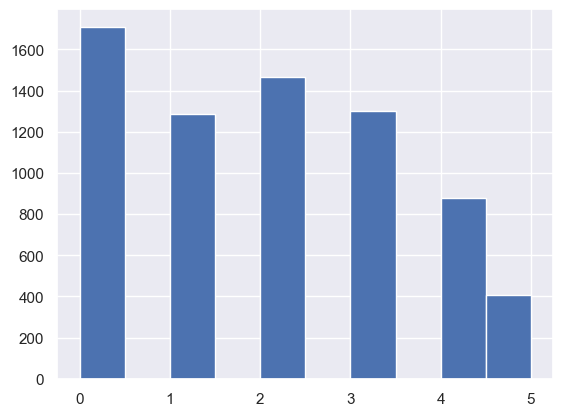

In [11]:
Cust['Premium Services'].hist()

In [12]:
Cust_ch = Cust.loc[Cust['Customer Status'] == 'Churned']


<AxesSubplot: >

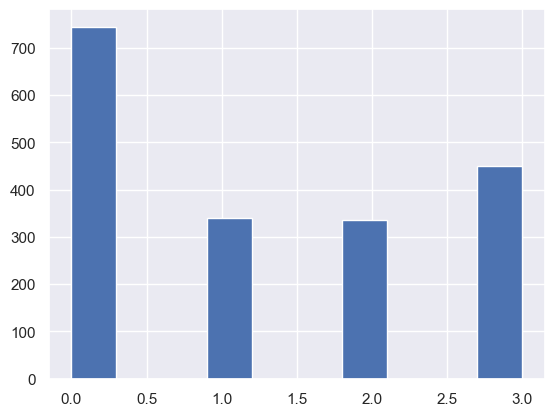

In [13]:
Cust_ch['Numero Streams'].hist()

<AxesSubplot: >

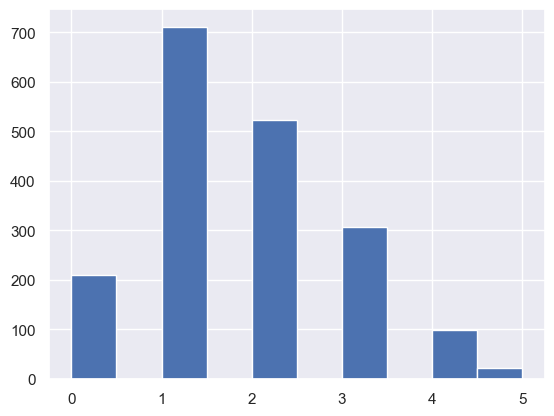

In [14]:
Cust_ch['Premium Services'].hist()

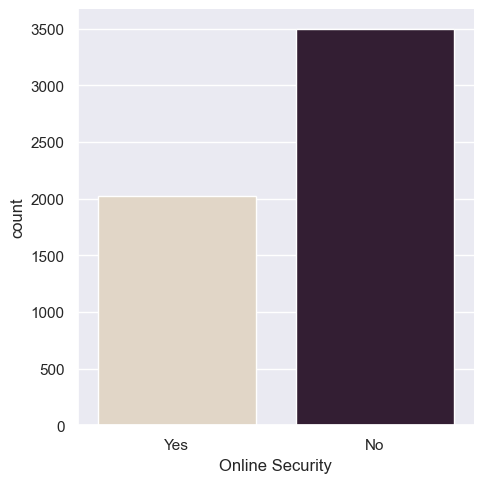

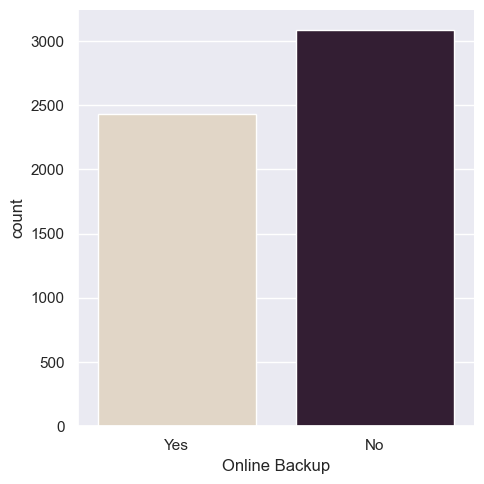

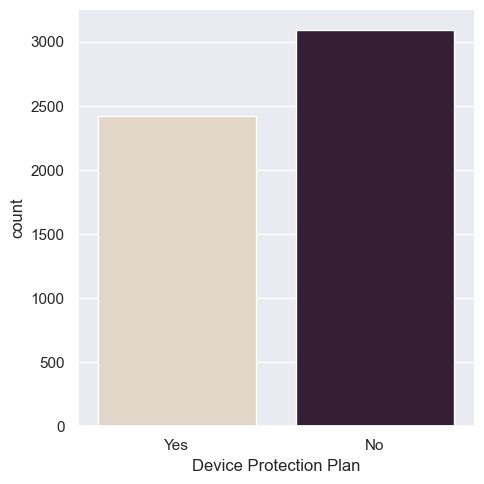

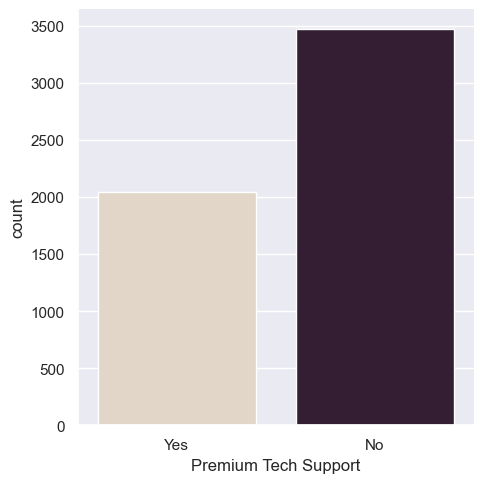

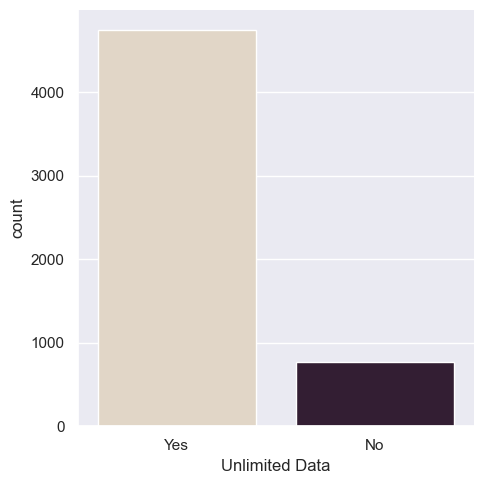

In [15]:
# Variables Serveis premium del dataset total

sns.catplot(data=Cust, x= "Online Security", kind="count", palette="ch:.25",order=['Yes','No'])

sns.catplot(data=Cust, x="Online Backup", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust, x= "Device Protection Plan", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust, x= "Premium Tech Support", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust, x= "Unlimited Data", kind="count", palette="ch:.25", order=['Yes','No'])


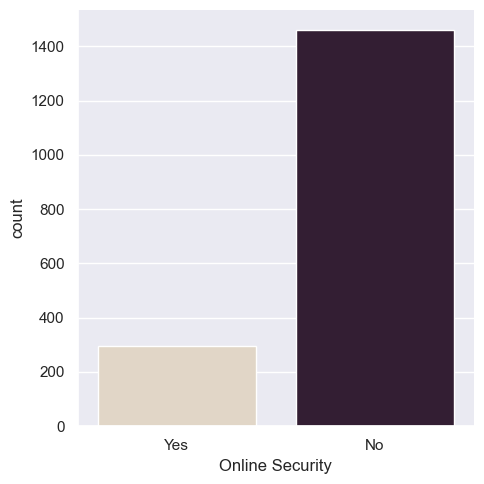

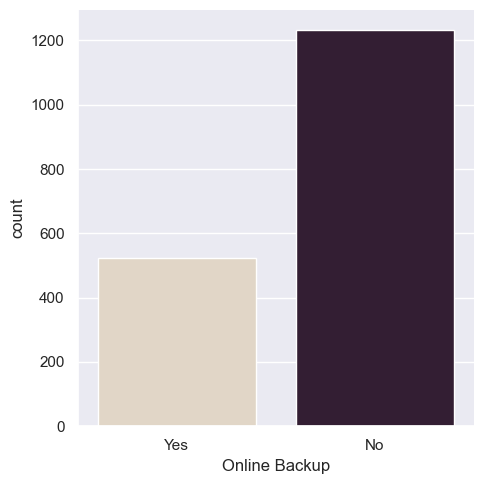

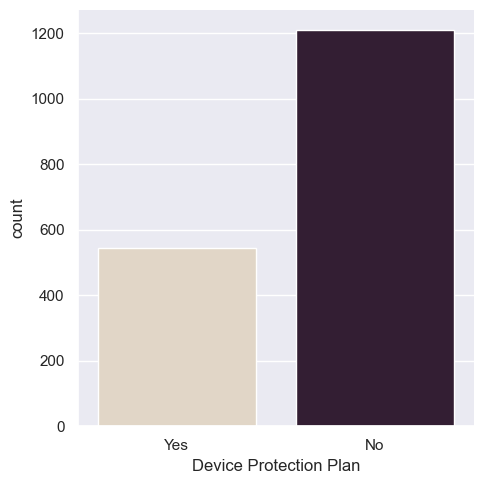

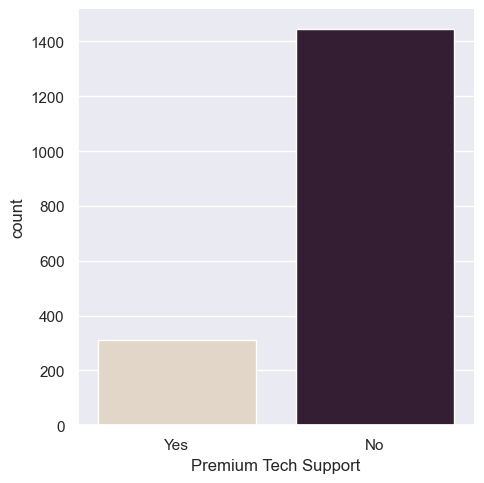

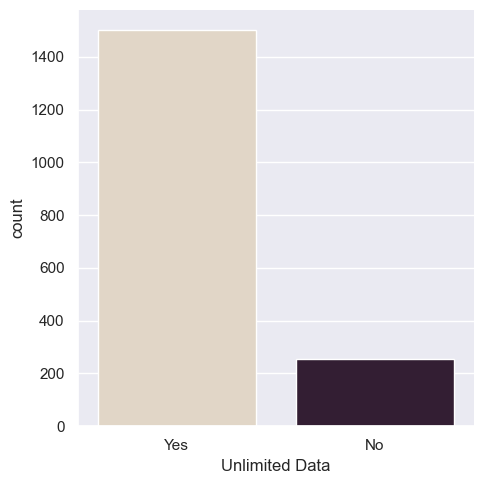

In [16]:
# Variables Serveis premium dels clients que han marxat

sns.catplot(data=Cust_ch, x= "Online Security", kind="count", palette="ch:.25",order=['Yes','No'])

sns.catplot(data=Cust_ch, x="Online Backup", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust_ch, x= "Device Protection Plan", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust_ch, x= "Premium Tech Support", kind="count", palette="ch:.25", order=['Yes','No'])

sns.catplot(data=Cust_ch, x= "Unlimited Data", kind="count", palette="ch:.25", order=['Yes','No'])


En aquest punt tenim una base de dades com la inicial amb les variables afegides Premium Services i Numero Streams

In [17]:
# Eliminem variables Redundants Categoriques
Cust = Cust.drop(columns=['Customer ID', 'Internet Service','Gender'])

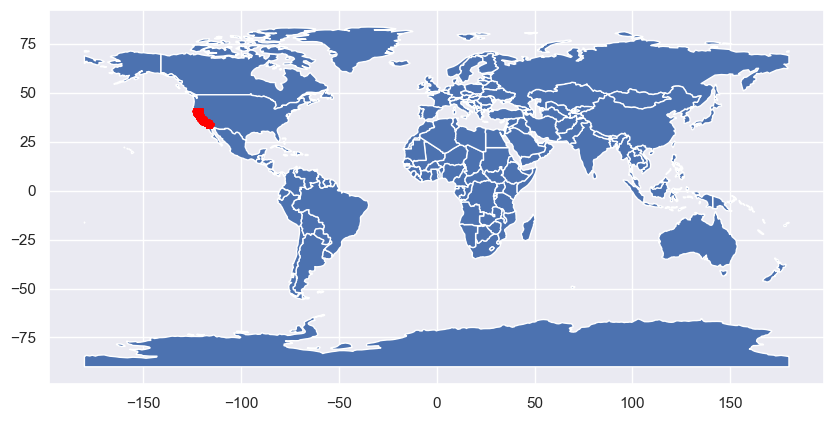

In [18]:
#!pip install shapely --user --upgrade --quiet
#!pip install geopandas --user --upgrade --quiet
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(Cust['Longitude'], Cust['Latitude'])]
gdf = GeoDataFrame(Cust, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=0.5);

In [19]:
Cust = Cust.drop(columns=['Latitude', 'Longitude', 'City','geometry'])

<AxesSubplot: >

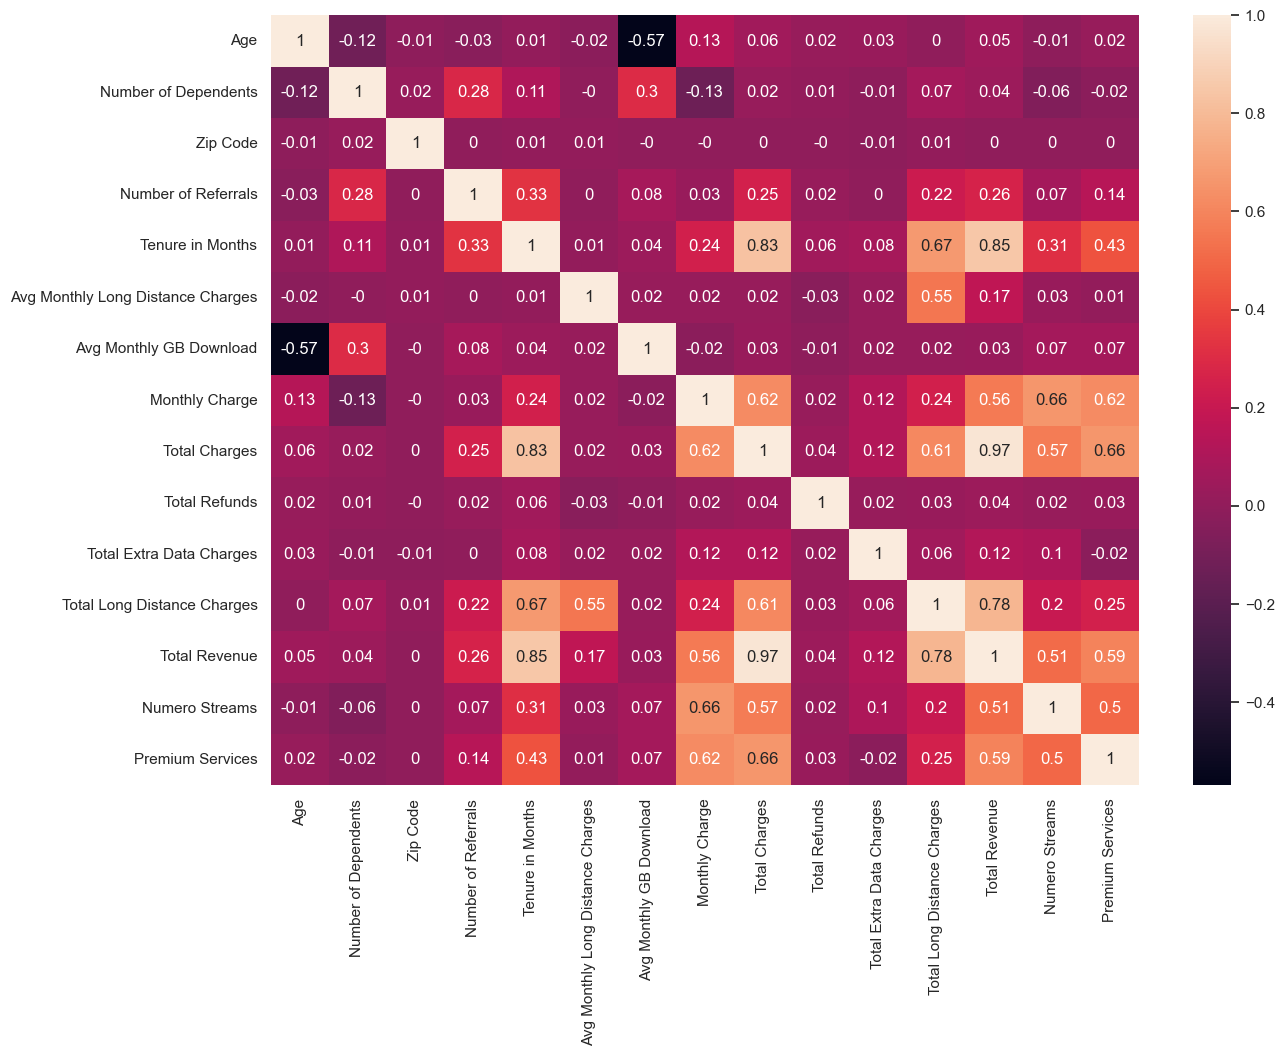

In [20]:
fig, axes= plt.subplots(1,1,figsize=(14,10))
matrix = Cust.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [21]:
Cust_tenure = Cust.copy()
Cust = Cust.drop(columns=['Total Charges', 'Tenure in Months', 'Total Long Distance Charges','Numero Streams', 'Premium Services'])

<AxesSubplot: >

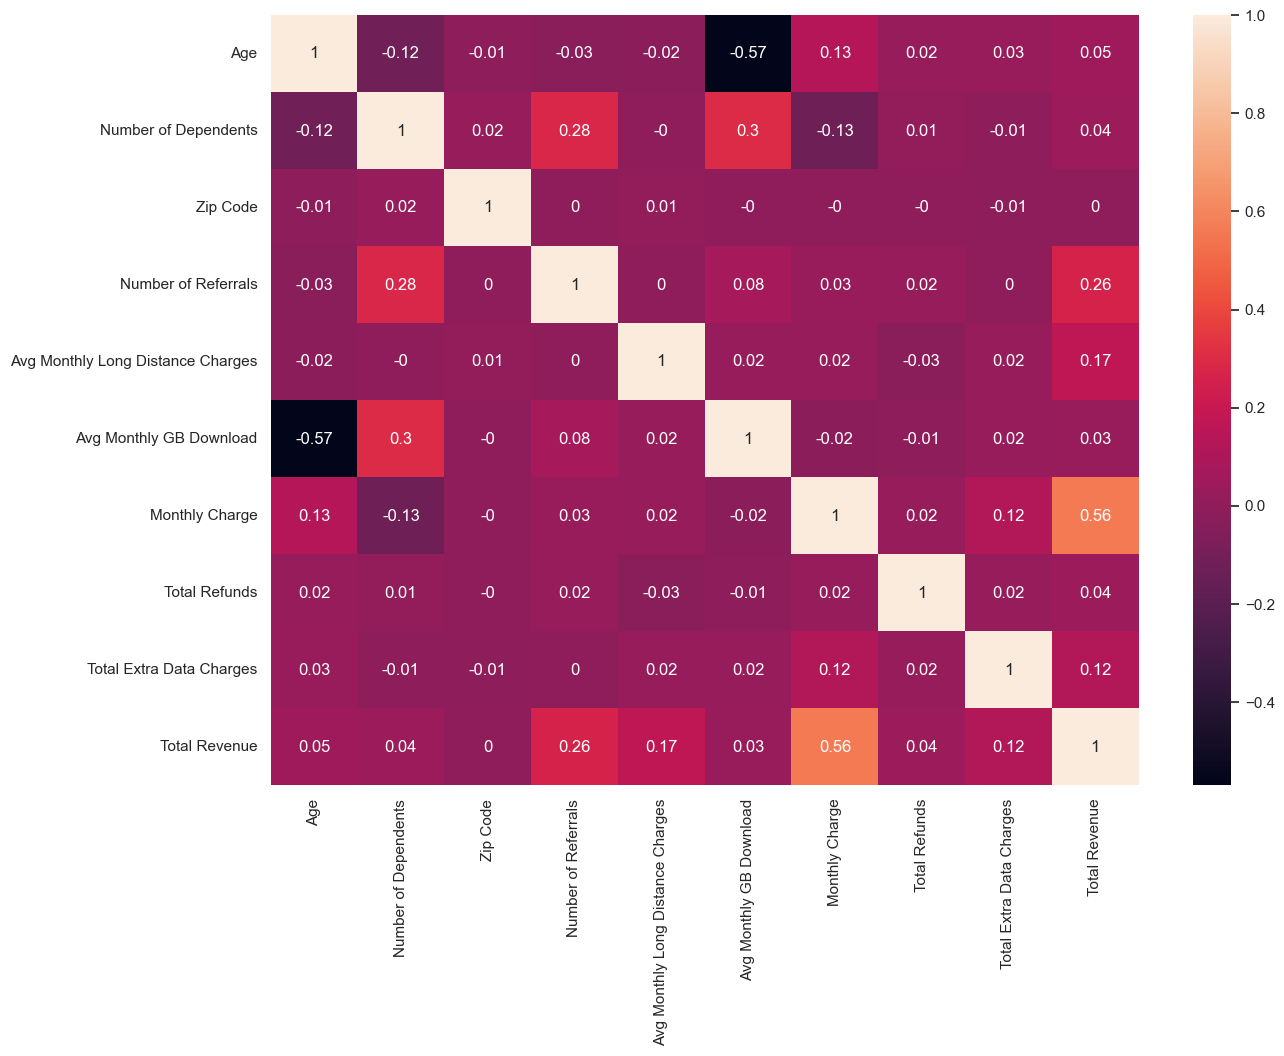

In [22]:
fig, axes= plt.subplots(1,1,figsize=(14,10))
matrix = Cust.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [23]:
Cust.shape

(7043, 29)

Fem els grafics de totes les nostres variables numèriques.

['Age', 'Number of Dependents', 'Zip Code', 'Number of Referrals', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges', 'Total Revenue']
Age has : 0 NAs
Number of Dependents has : 0 NAs
Zip Code has : 0 NAs
Number of Referrals has : 0 NAs
Avg Monthly Long Distance Charges has : 682 NAs
Avg Monthly GB Download has : 1526 NAs
Monthly Charge has : 0 NAs
Total Refunds has : 0 NAs
Total Extra Data Charges has : 0 NAs
Total Revenue has : 0 NAs


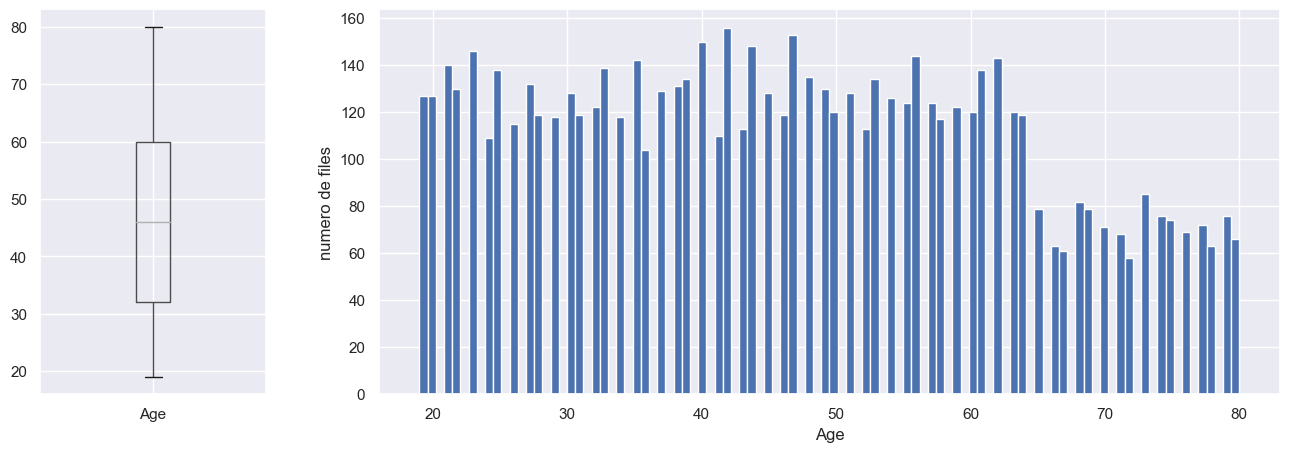

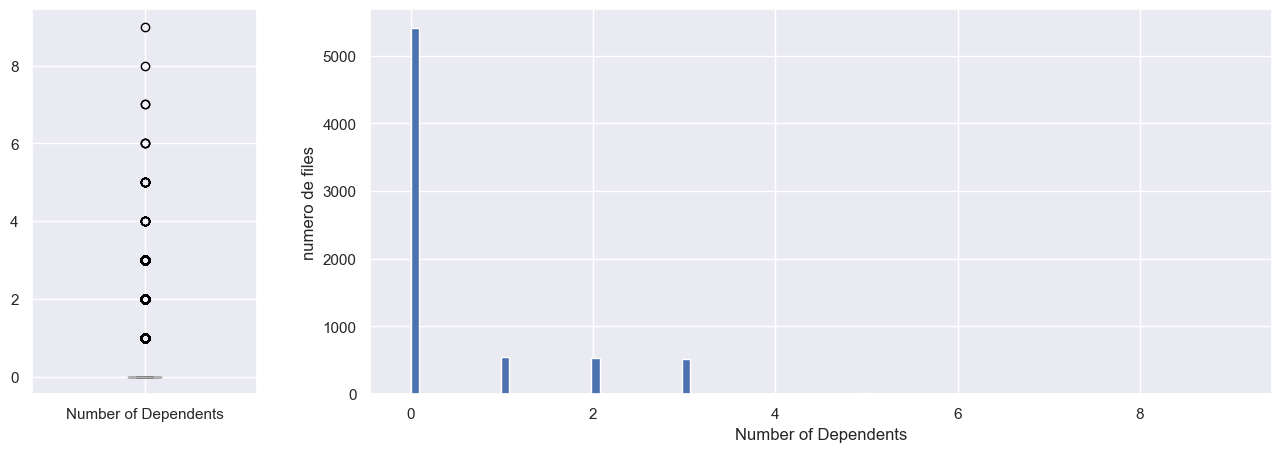

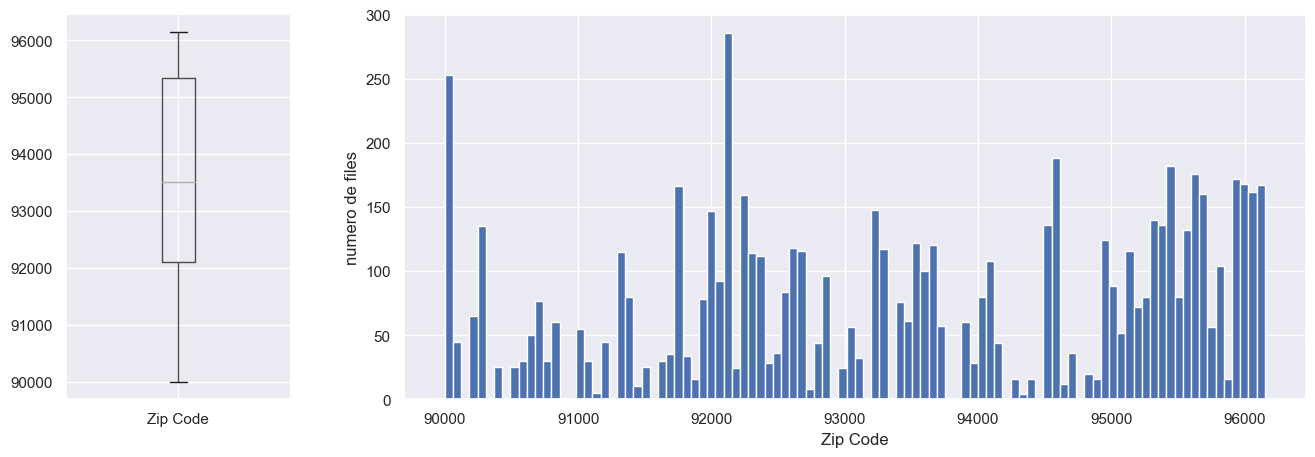

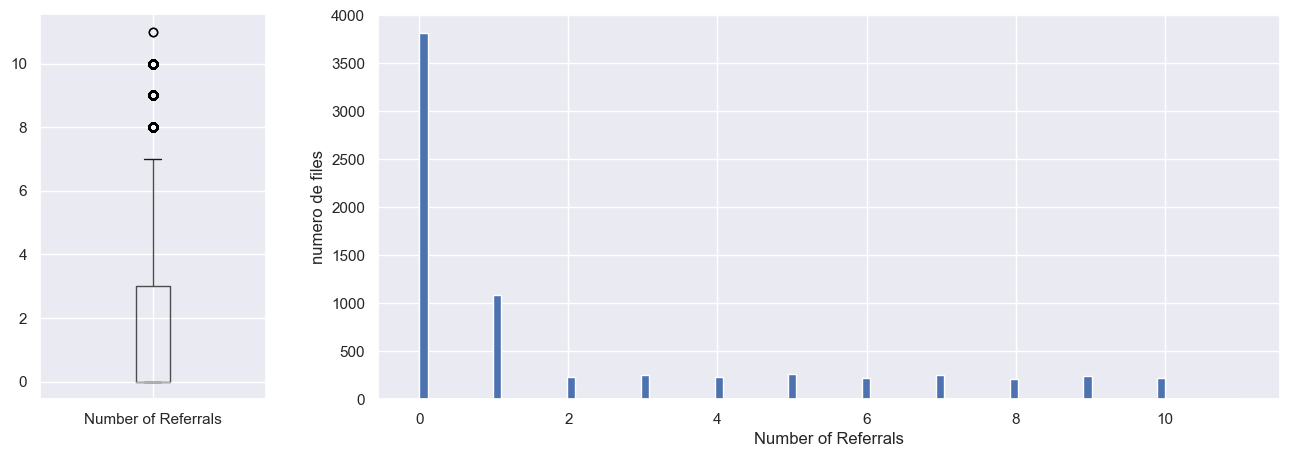

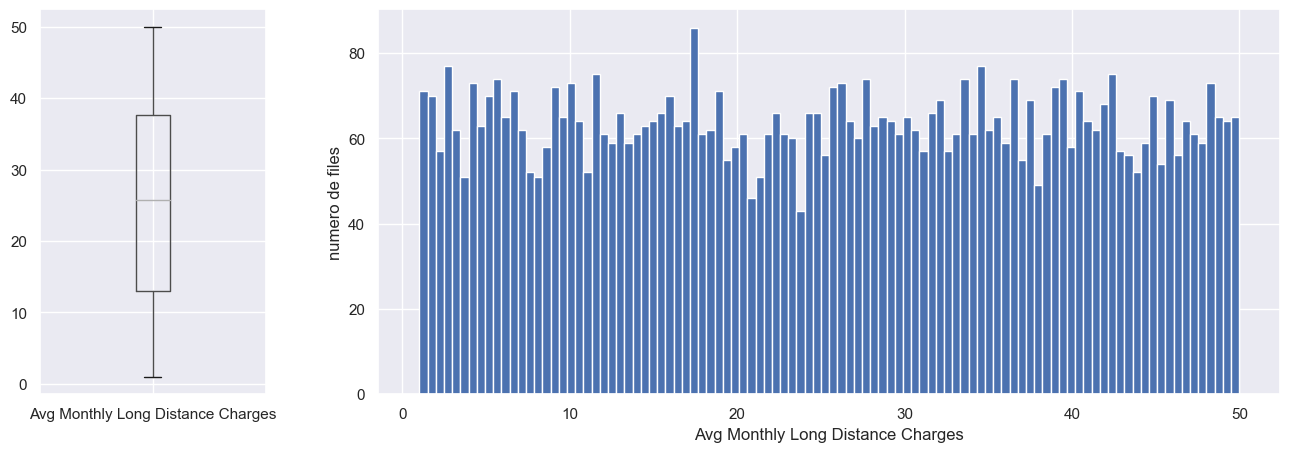

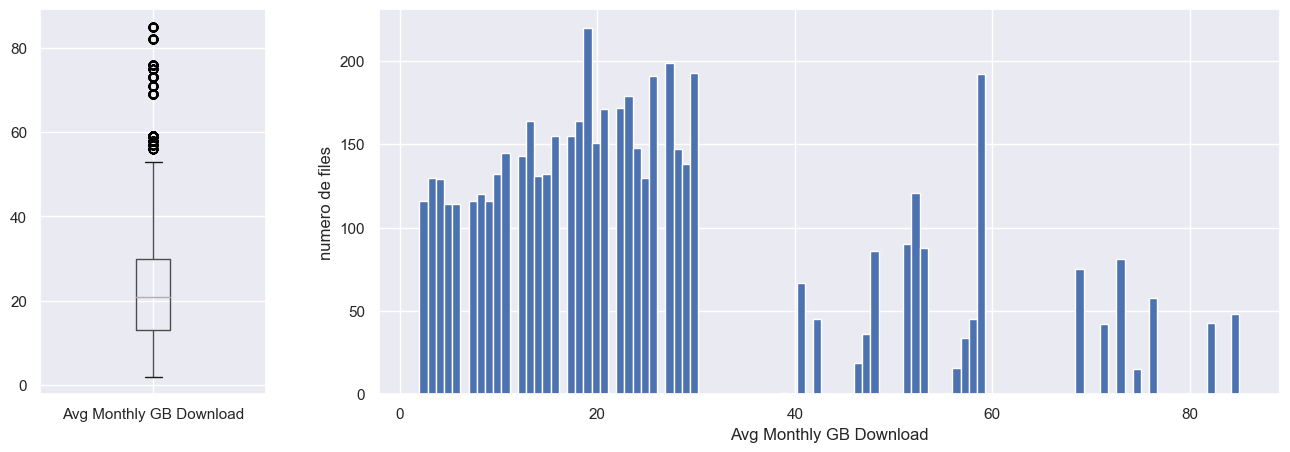

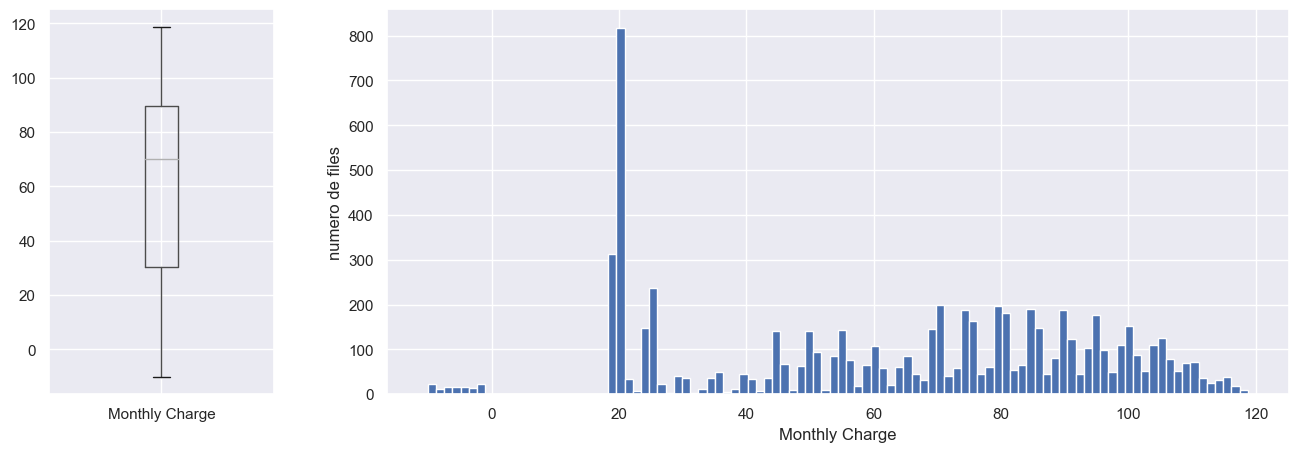

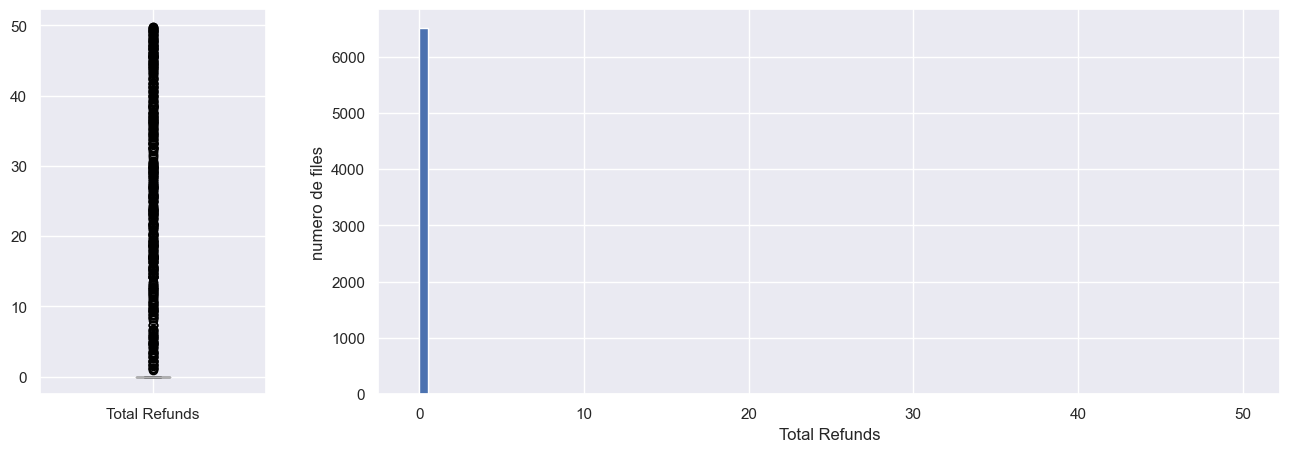

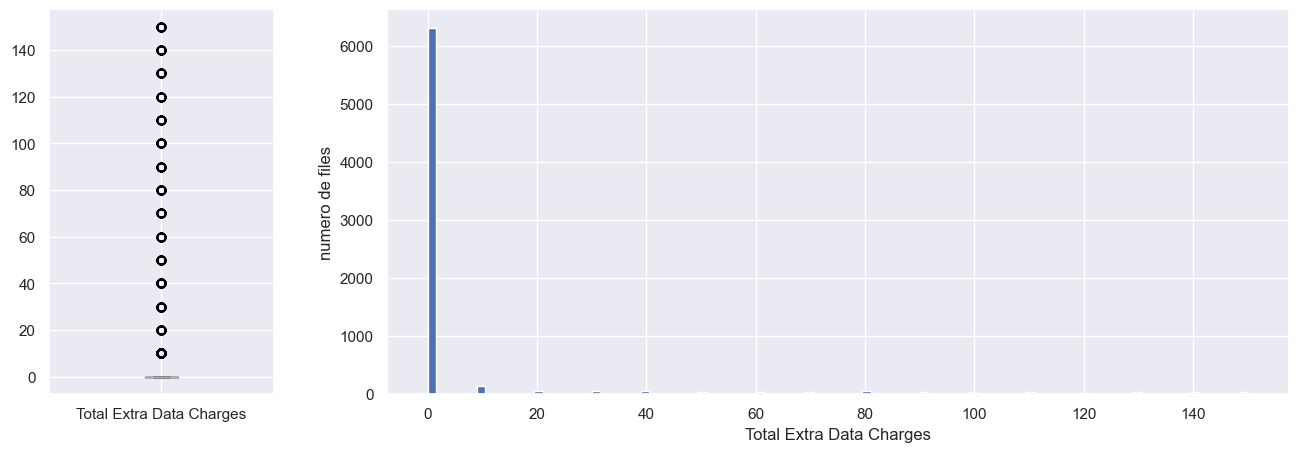

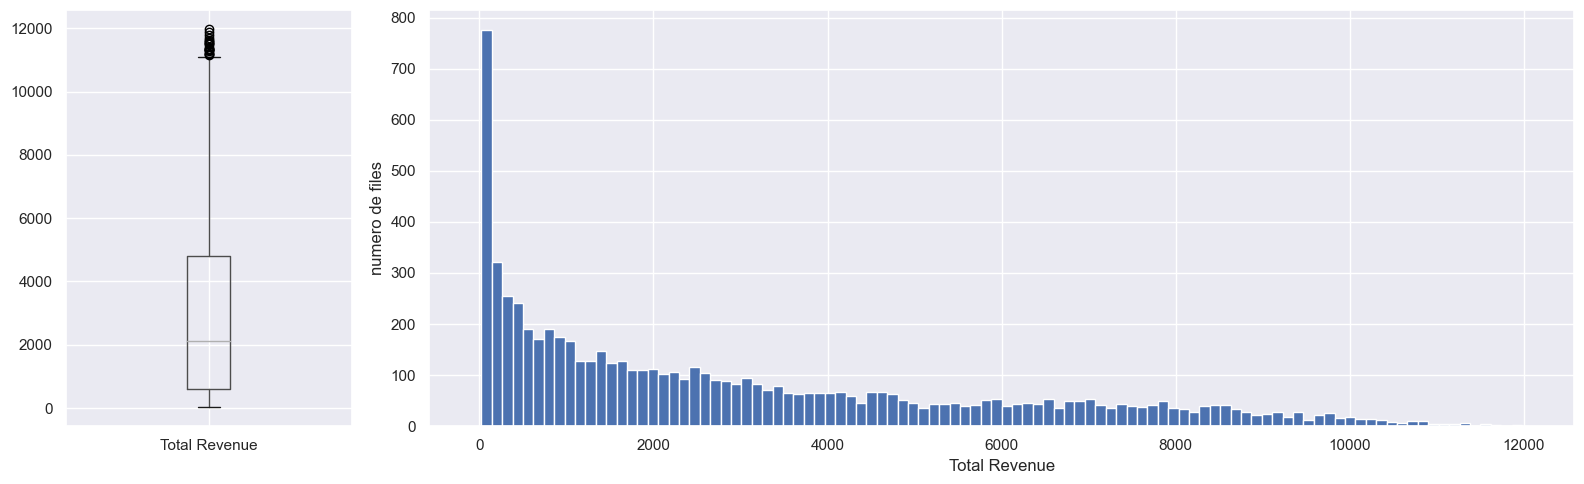

In [24]:
columnes_num = Cust.select_dtypes(include=np.number).columns.tolist()
print(columnes_num)

for i in (columnes_num):
    fig, axes= plt.subplots(1,2,gridspec_kw={'width_ratios': [1, 4]},figsize=(16,5))
    plt.xlabel(i)
    plt.ylabel('numero de files')
    Cust.boxplot(column = i,ax=axes[0]);
    Cust[i].hist(ax=axes[1], bins = 100);
    print( i ,'has :',Cust[i].isna().sum(), "NAs")
fig.tight_layout();


In [25]:
for i in columnes_num:
    Cust[i].describe()

count    7043.00
mean       46.51
std        16.75
min        19.00
25%        32.00
50%        46.00
75%        60.00
max        80.00
Name: Age, dtype: float64

count    7043.000
mean        0.469
std         0.963
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         9.000
Name: Number of Dependents, dtype: float64

count     7043.000
mean     93486.071
std       1856.768
min      90001.000
25%      92101.000
50%      93518.000
75%      95329.000
max      96150.000
Name: Zip Code, dtype: float64

count    7043.000
mean        1.952
std         3.001
min         0.000
25%         0.000
50%         0.000
75%         3.000
max        11.000
Name: Number of Referrals, dtype: float64

count    6361.000
mean       25.421
std        14.200
min         1.010
25%        13.050
50%        25.690
75%        37.680
max        49.990
Name: Avg Monthly Long Distance Charges, dtype: float64

count    5517.000
mean       26.190
std        19.587
min         2.000
25%        13.000
50%        21.000
75%        30.000
max        85.000
Name: Avg Monthly GB Download, dtype: float64

count    7043.000
mean       63.596
std        31.205
min       -10.000
25%        30.400
50%        70.050
75%        89.750
max       118.750
Name: Monthly Charge, dtype: float64

count    7043.000
mean        1.962
std         7.903
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        49.790
Name: Total Refunds, dtype: float64

count    7043.000
mean        6.861
std        25.105
min         0.000
25%         0.000
50%         0.000
75%         0.000
max       150.000
Name: Total Extra Data Charges, dtype: float64

count     7043.000
mean      3034.379
std       2865.205
min         21.360
25%        605.610
50%       2108.640
75%       4801.145
max      11979.340
Name: Total Revenue, dtype: float64

In [26]:
# Recodifiquem les variables total 
variables_total = ['Total Refunds', 'Total Extra Data Charges', 'Total Revenue' ]
variables_monthly = ['Monthly Refunds', 'Monthly Extra Data Charges', 'Monthly Revenue' ]

for i in range(len(variables_total)):
    vec = []
    for ele in range(len(Cust)):
        vec.append(Cust_tenure[variables_total[i]][ele]/Cust_tenure['Tenure in Months'][ele])
    Cust[variables_monthly[i]] = vec
    columnes_num.append(variables_monthly[i])
    Cust = Cust.drop(columns = [variables_total[i]])
Cust.describe()

Age  Number of Dependents   Zip Code  Number of Referrals  \
count  7043.00              7043.000   7043.000             7043.000   
mean     46.51                 0.469  93486.071                1.952   
std      16.75                 0.963   1856.768                3.001   
min      19.00                 0.000  90001.000                0.000   
25%      32.00                 0.000  92101.000                0.000   
50%      46.00                 0.000  93518.000                0.000   
75%      60.00                 0.000  95329.000                3.000   
max      80.00                 9.000  96150.000               11.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           6361.000                 5517.000   
mean                              25.421                   26.190   
std                               14.200                   19.587   
min                                1.010                    2.000   
25%                               13.050                   13.000   
50%                               25.690                   21.000   
75%                               37.680                   30.000   
max                               49.990                   85.000   

       Monthly Charge  Monthly Refunds  Monthly Extra Data Charges  \
count        7043.000         7043.000                    7043.000   
mean           63.596            0.098                       0.496   
std            31.205            0.644                       3.200   
min           -10.000            0.000                       0.000   
25%            30.400            0.000                       0.000   
50%            70.050            0.000                       0.000   
75%            89.750            0.000                       0.000   
max           118.750           22.720                      80.000   

       Monthly Revenue  
count         7043.000  
mean            88.120  
std             35.911  
min             18.166  
25%             56.765  
50%             93.246  
75%            117.016  
max            190.700

Monthly Refunds has : 0 NAs
Monthly Extra Data Charges has : 0 NAs
Monthly Revenue has : 0 NAs


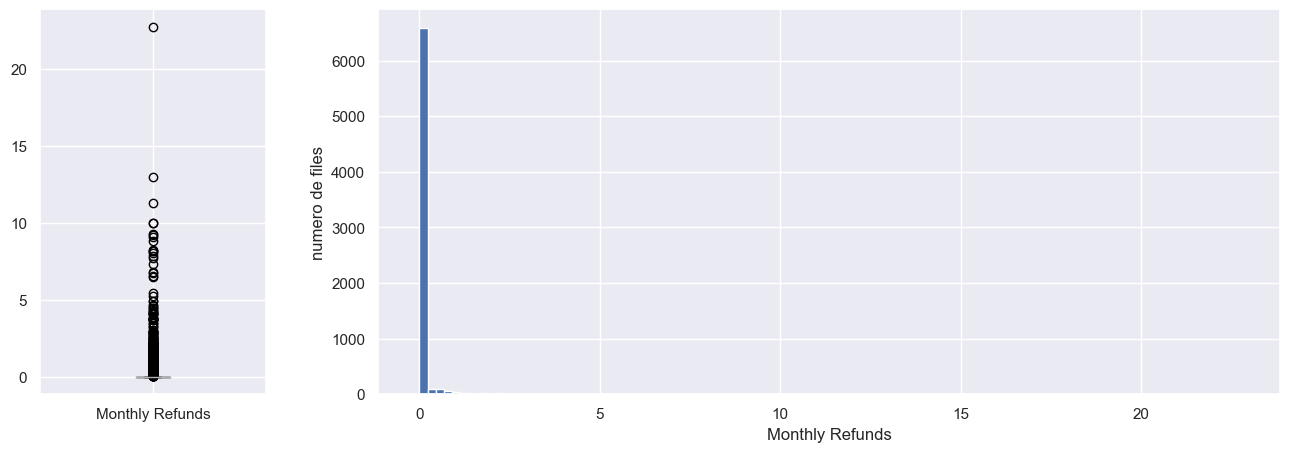

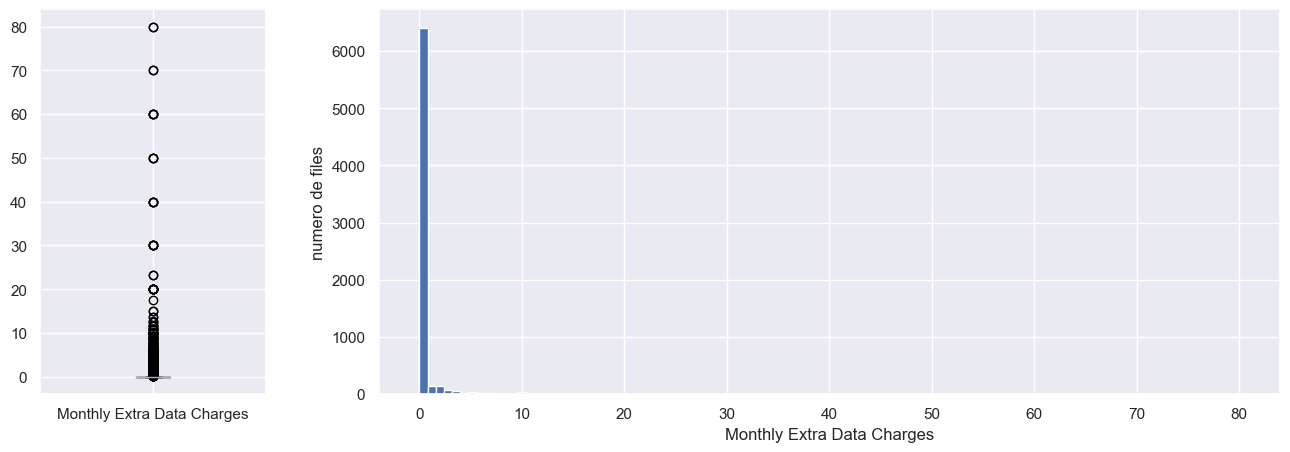

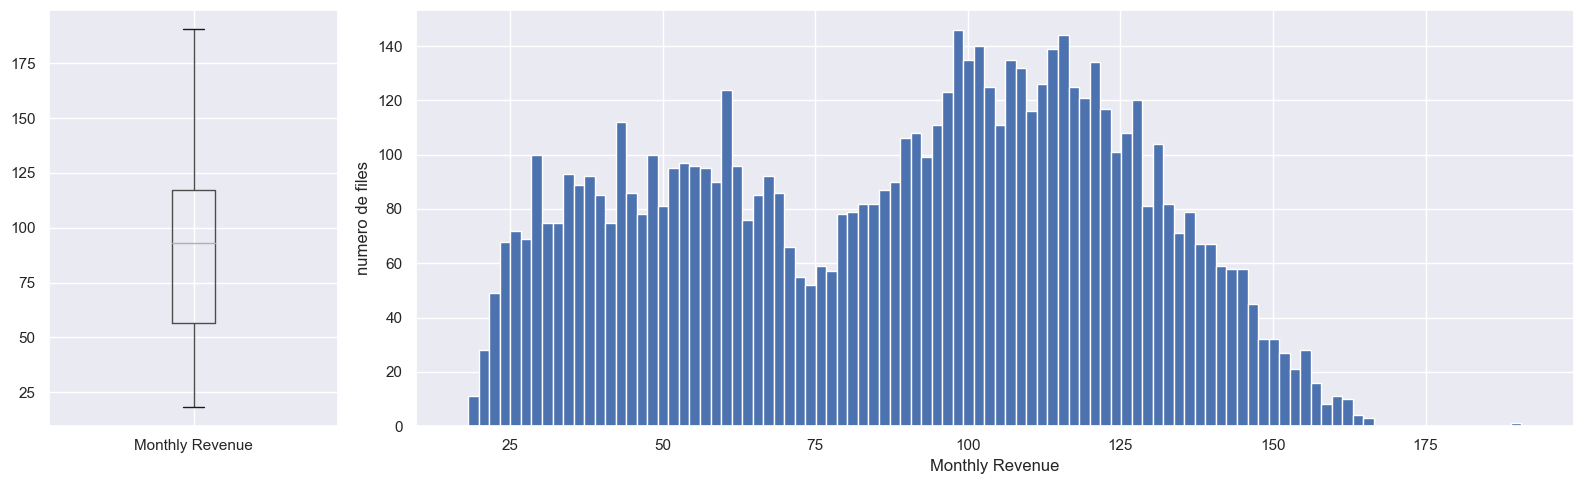

In [27]:
for i in variables_monthly: 
    fig, axes= plt.subplots(1,2,gridspec_kw={'width_ratios': [1, 4]},figsize=(16,5))
    plt.xlabel(i)
    plt.ylabel('numero de files')
    Cust.boxplot(column = i,ax=axes[0]);
    Cust[i].hist(ax=axes[1], bins = 100);
    print( i ,'has :',Cust[i].isna().sum(), "NAs")
fig.tight_layout();
    

<AxesSubplot: >

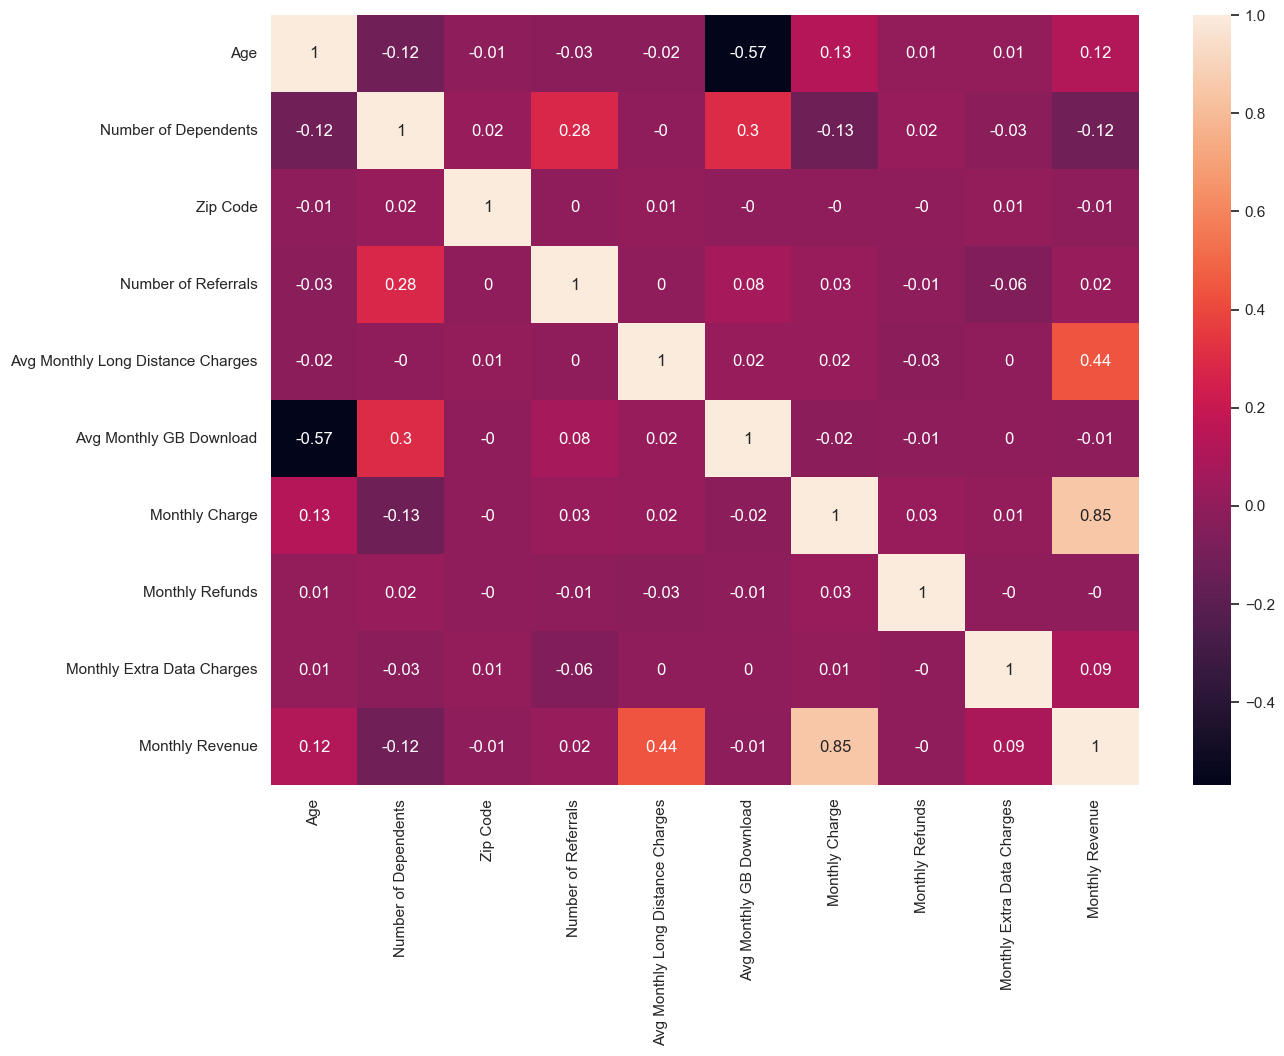

In [28]:
# Mirem Correlacions de les noves variables 
fig, axes= plt.subplots(1,1,figsize=(14,10))
matrix = Cust.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [29]:
Cust = Cust.drop(columns = ['Monthly Charge'])

<AxesSubplot: >

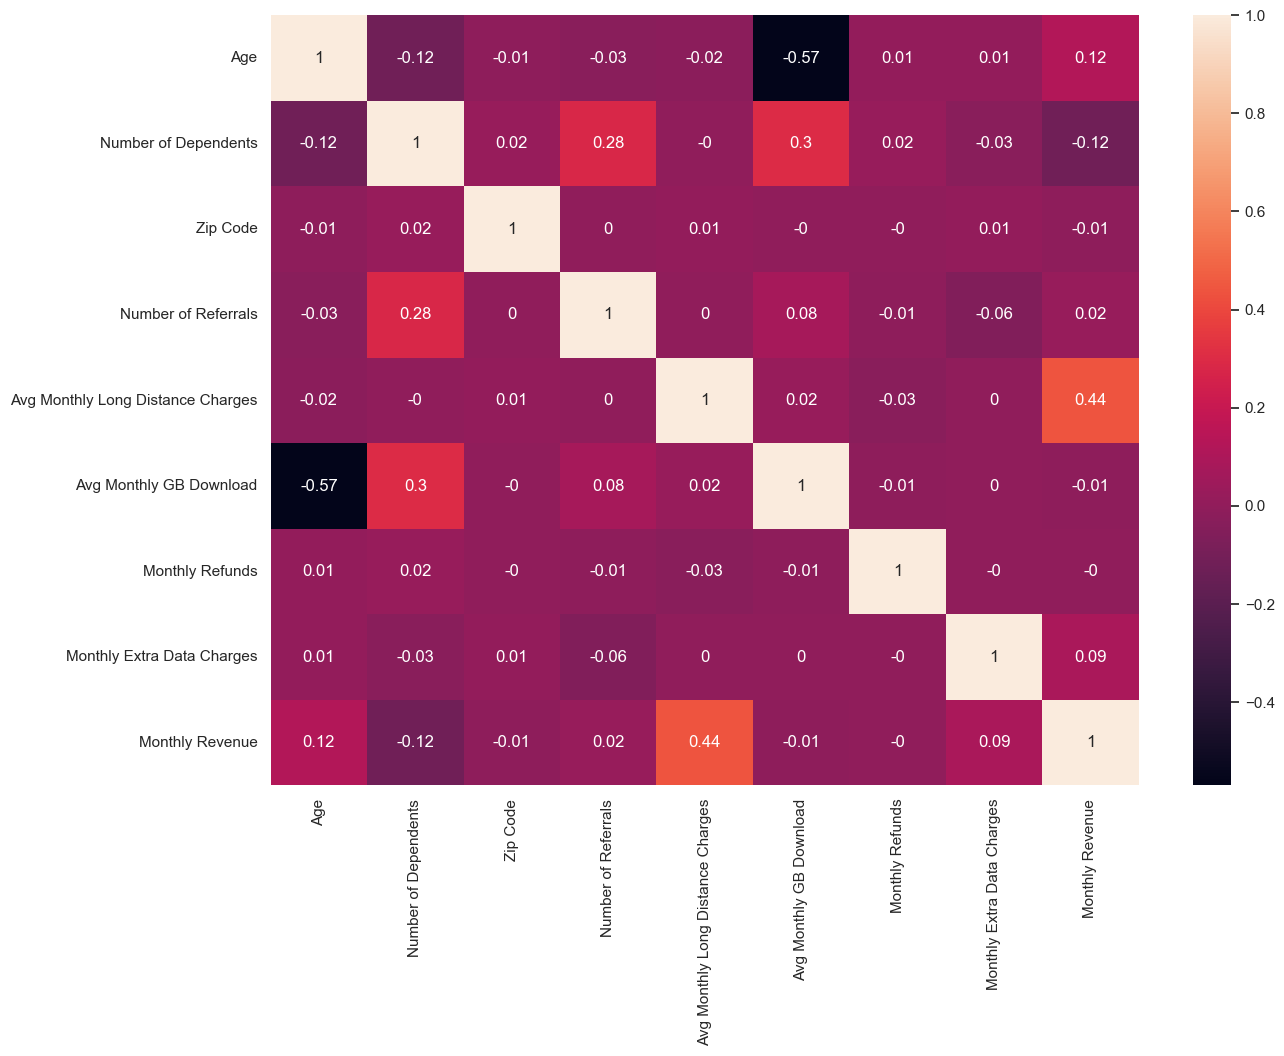

In [30]:
# Mirem Correlacions de les noves variables 
fig, axes= plt.subplots(1,1,figsize=(14,10))
matrix = Cust.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

['Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']


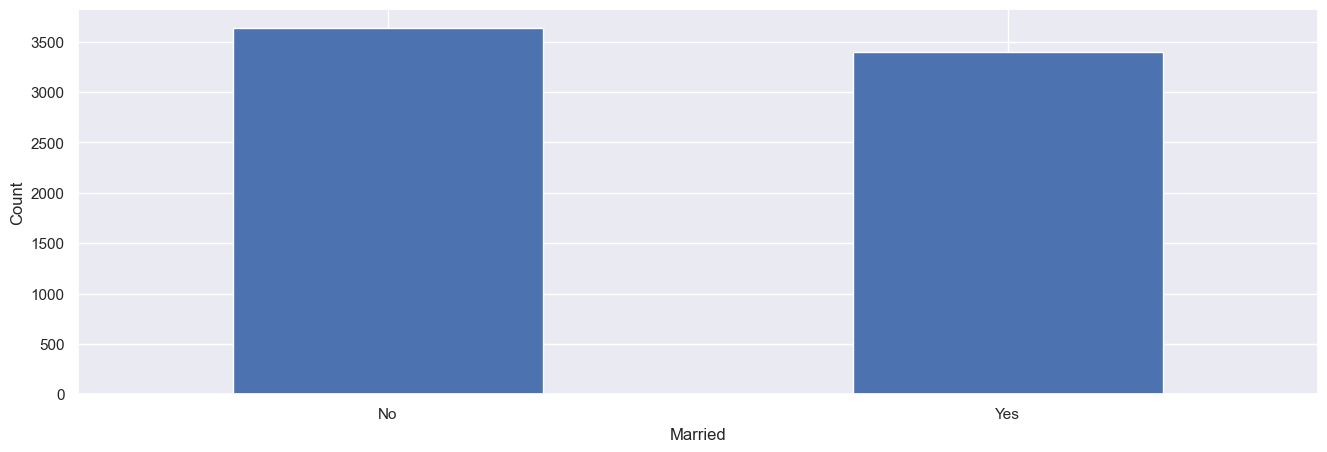

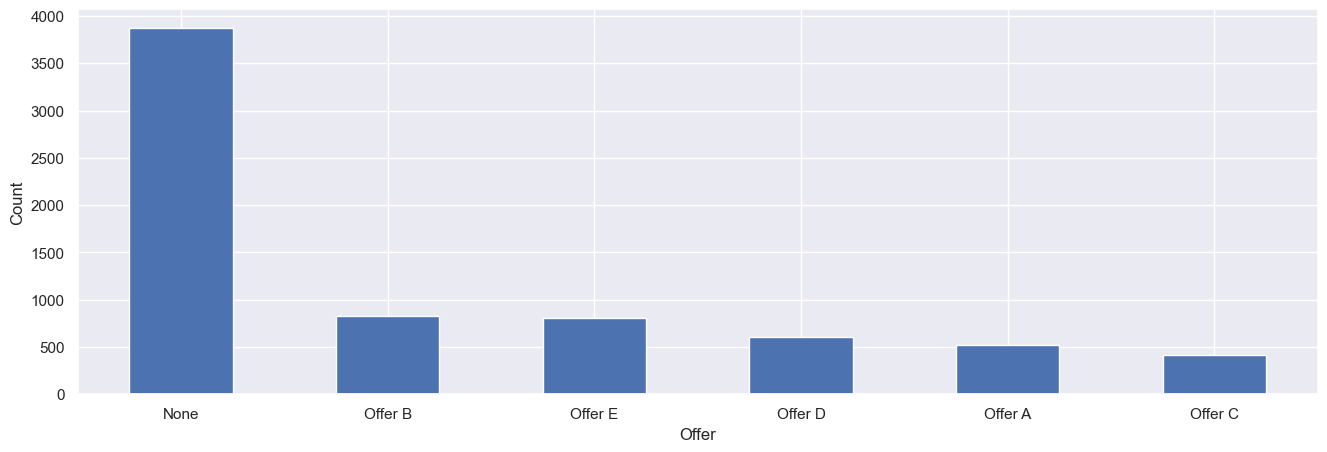

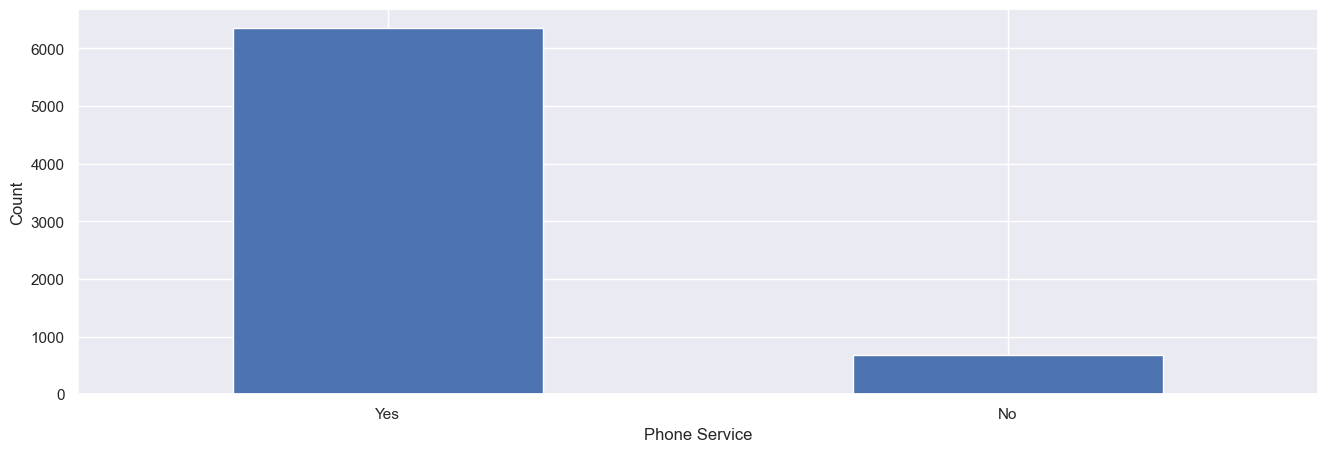

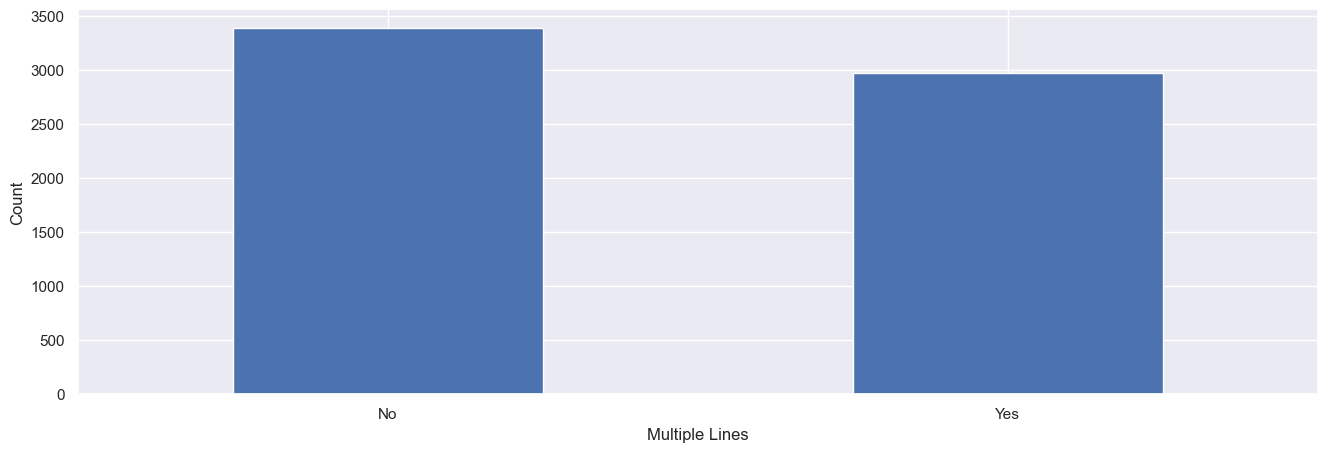

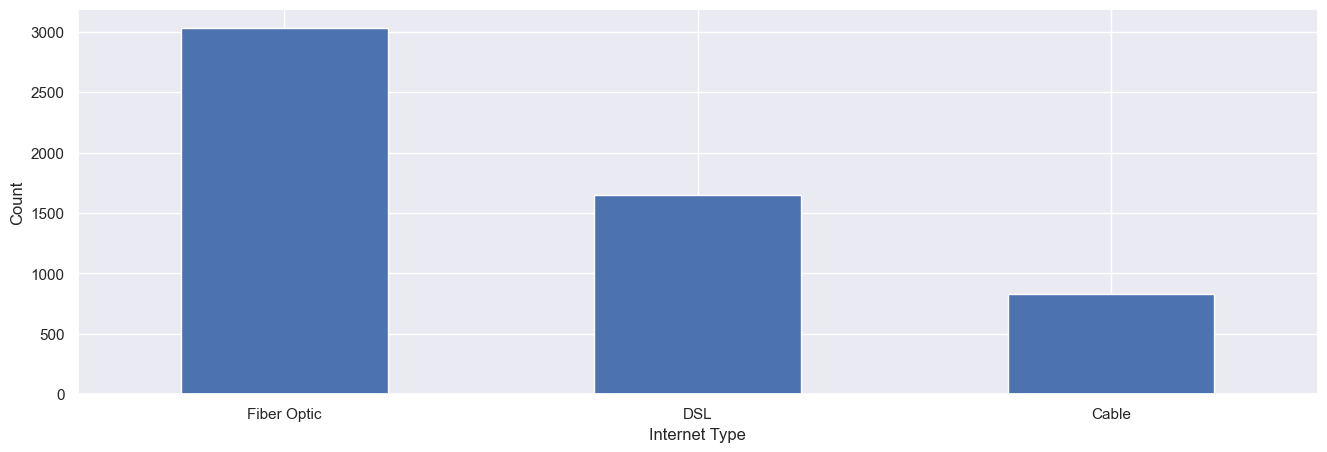

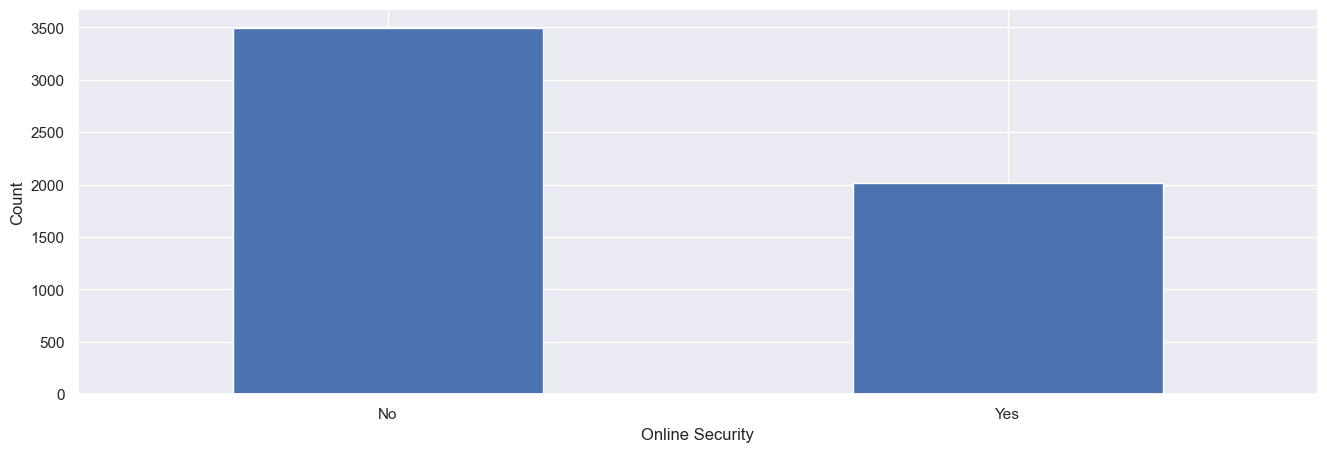

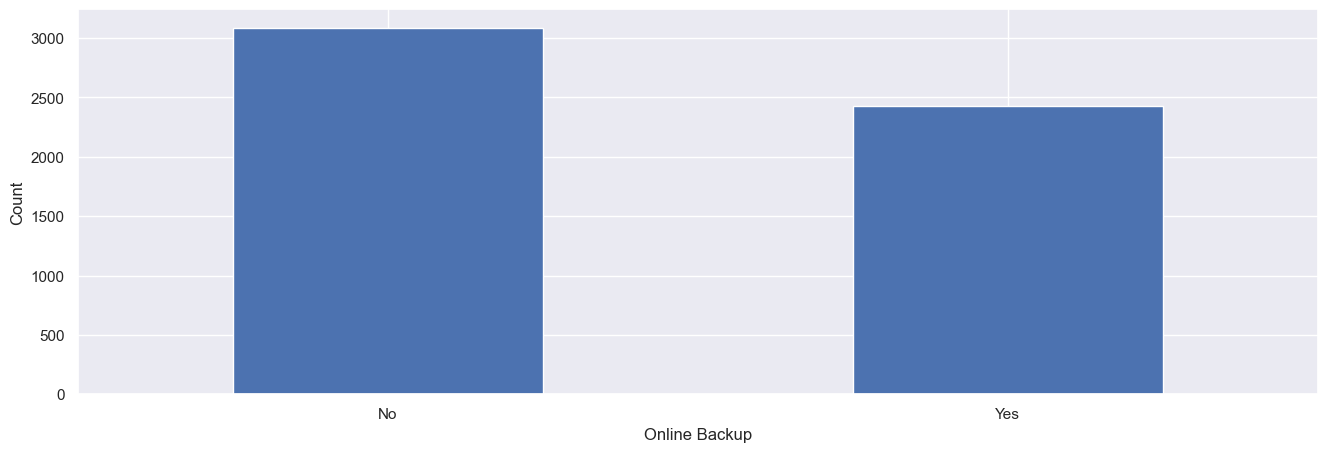

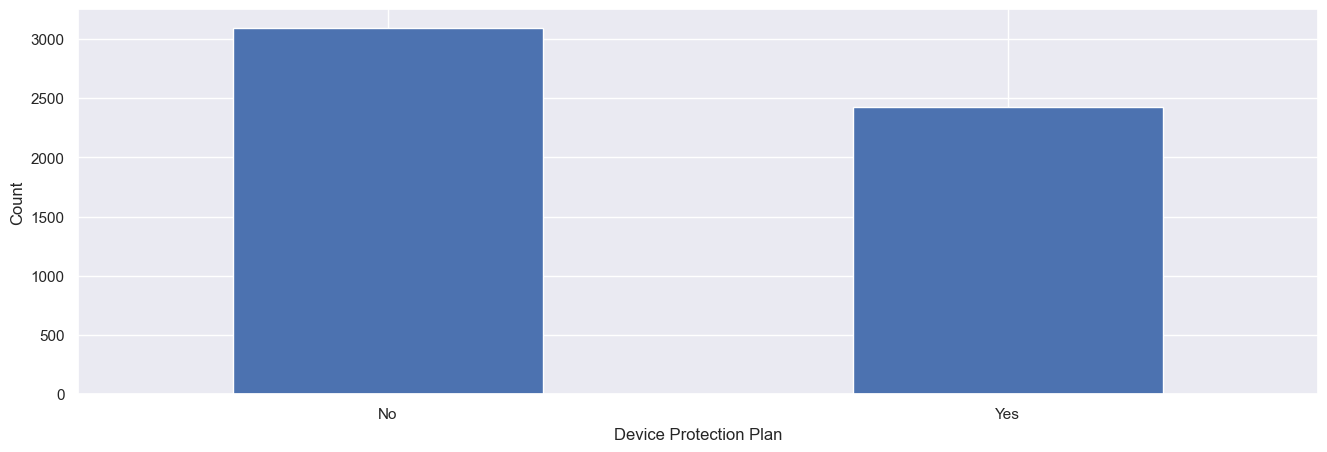

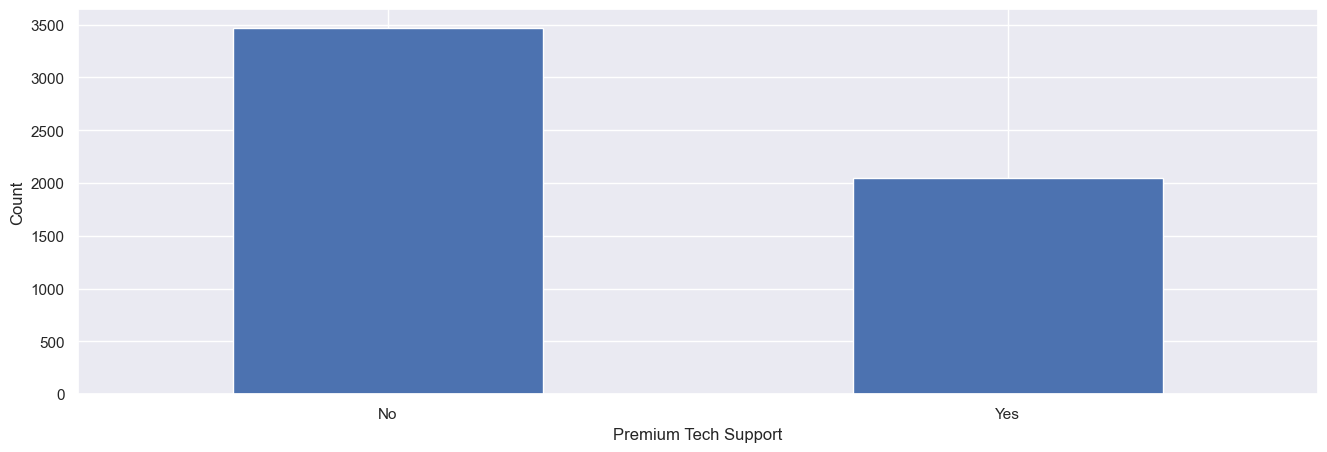

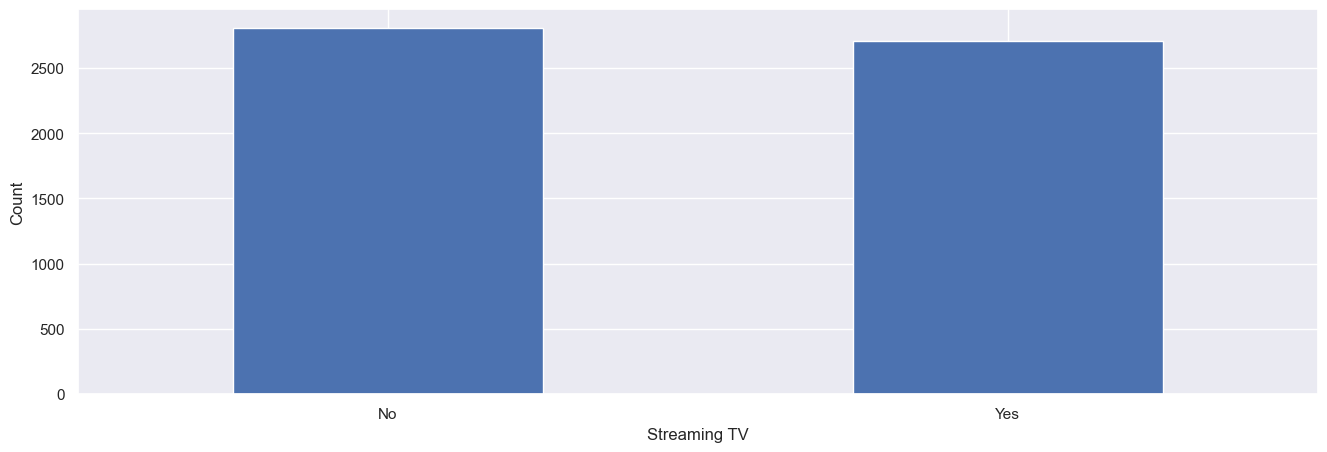

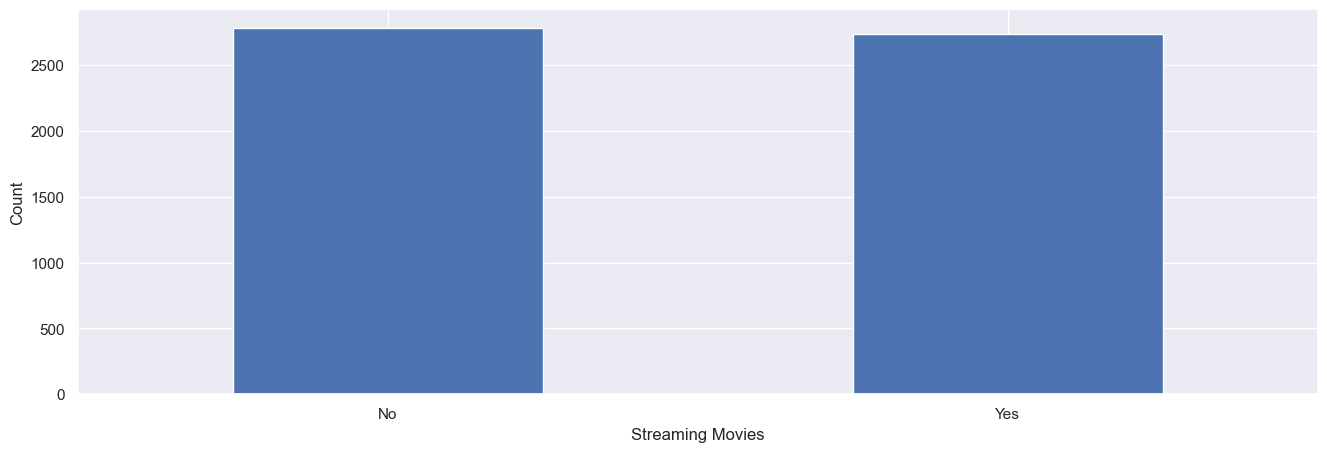

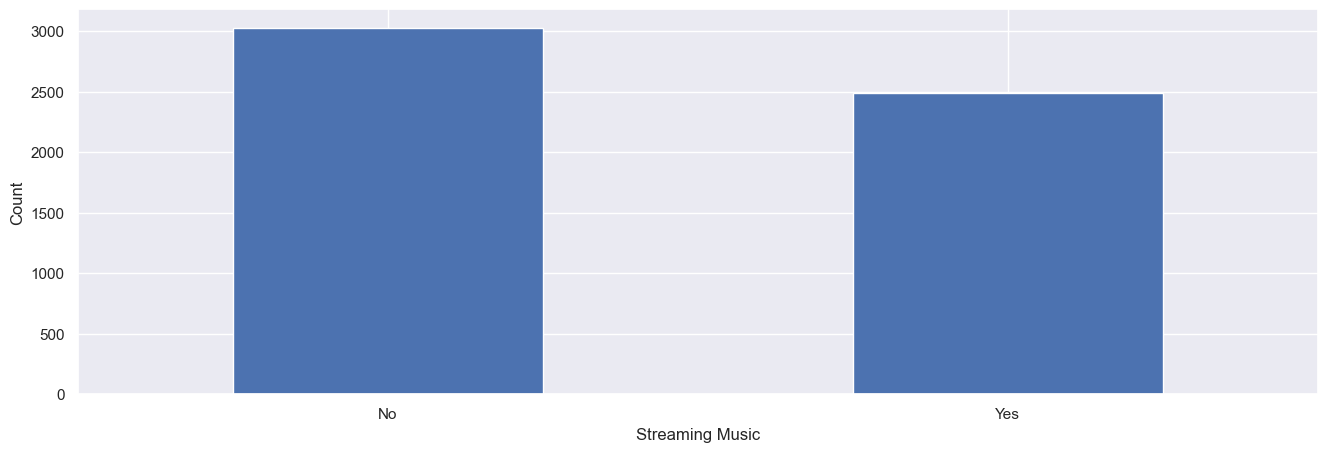

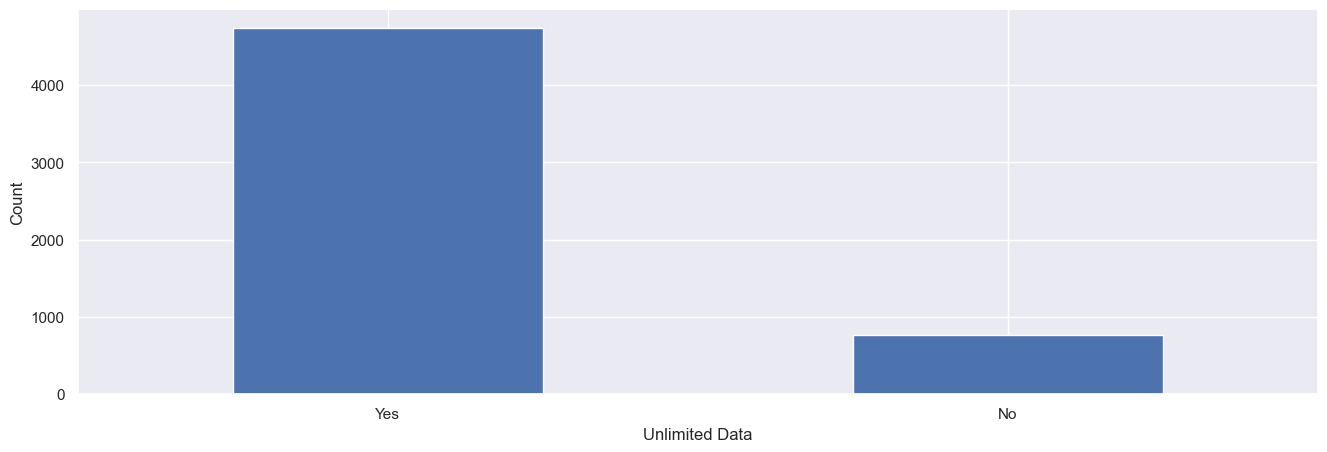

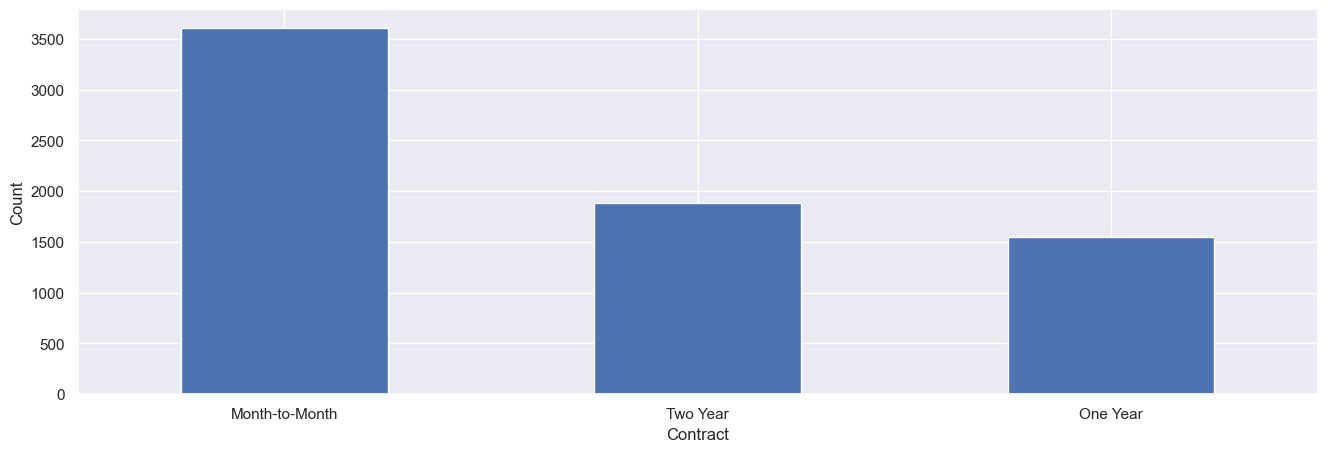

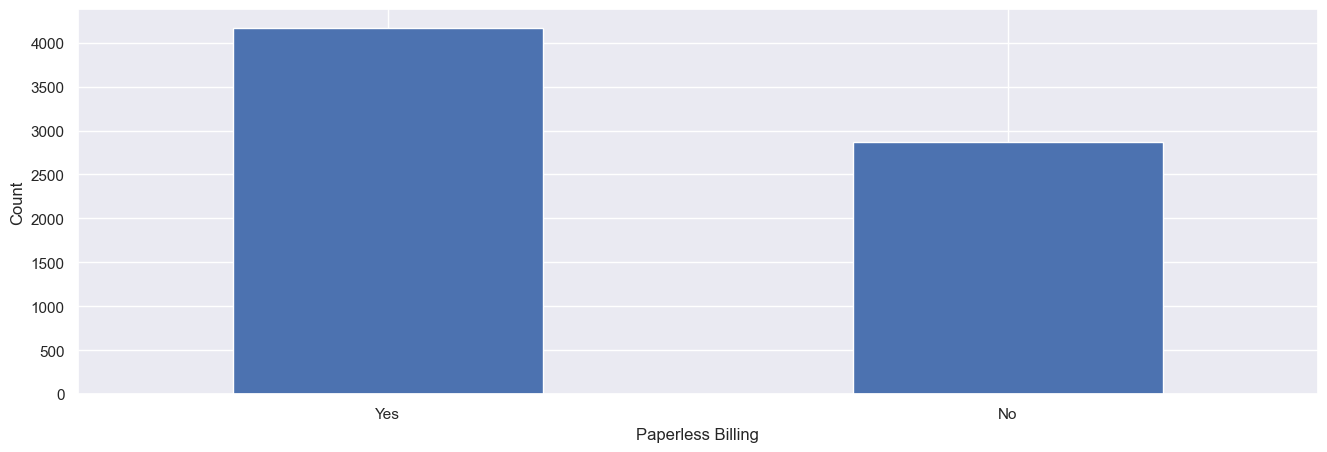

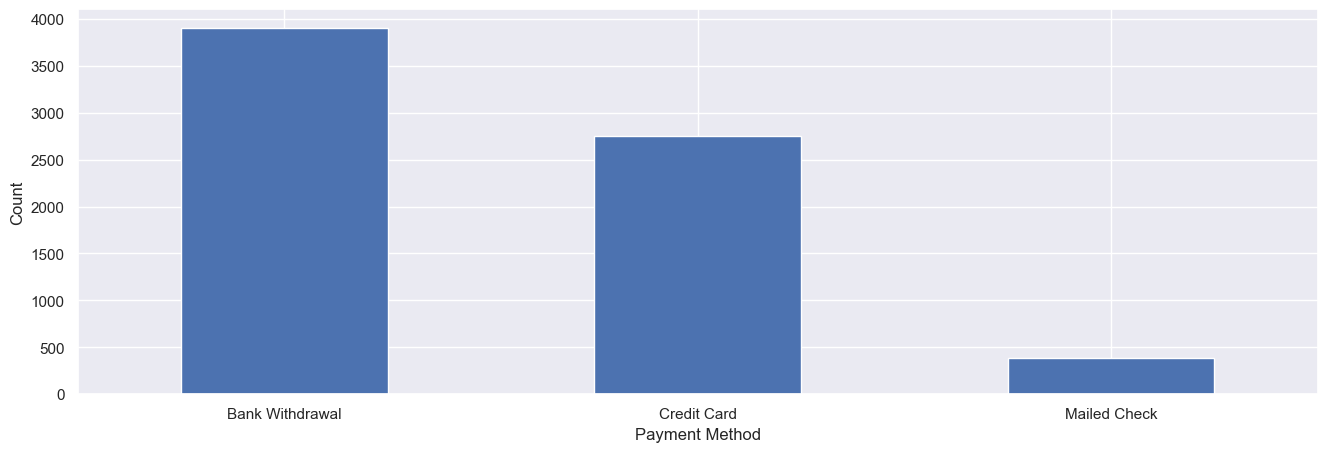

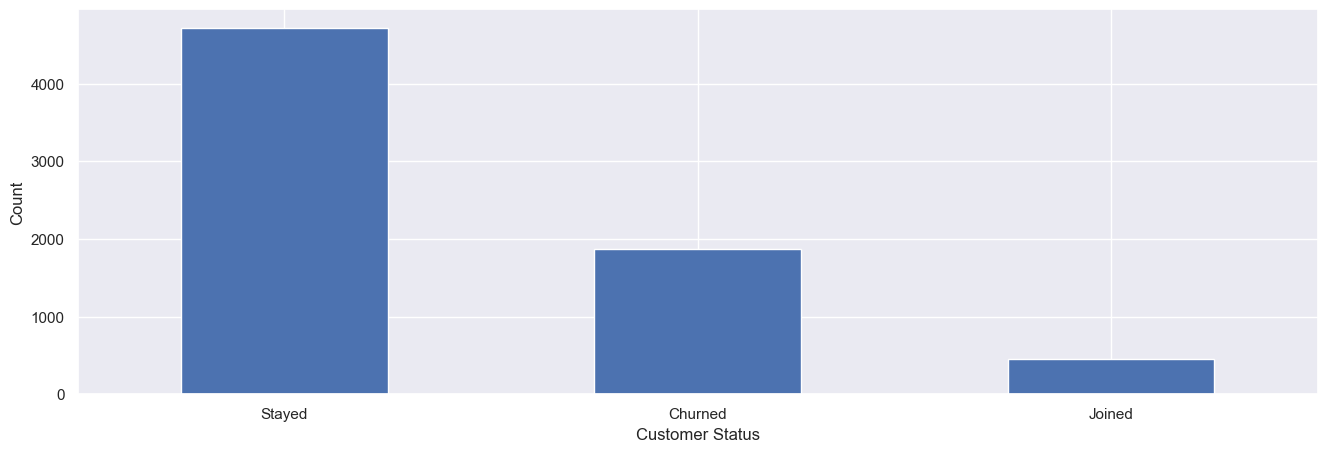

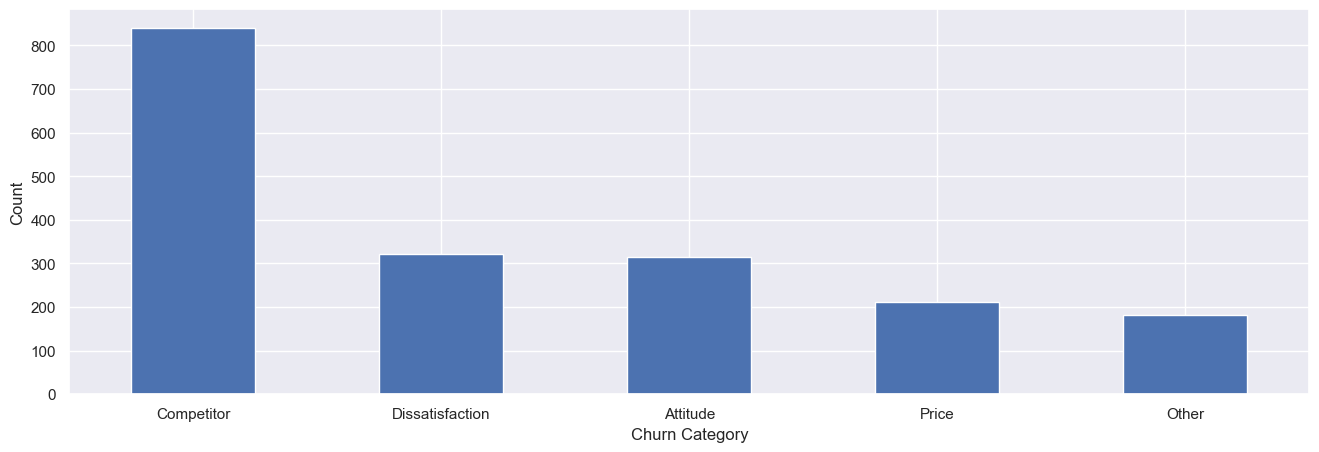

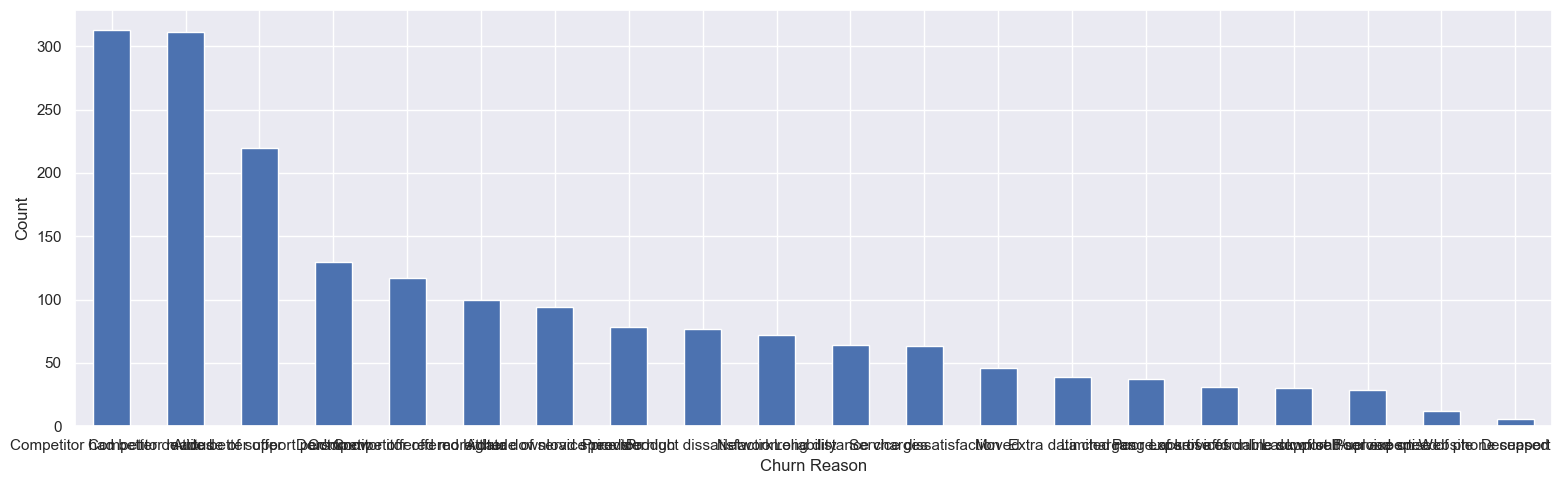

In [31]:
columnes_cat = []
for col in Cust.columns:
    if col not in columnes_num:
        columnes_cat.append(col)
print(columnes_cat)        

for i in (columnes_cat):
    fig, axes= plt.subplots(1,1,figsize=(16,5))
    Cust[i].value_counts().plot(kind='bar', xlabel=i, ylabel='Count', rot=0)
fig.tight_layout();

In [32]:
for i in (columnes_cat):
    print( i ,'has :',Cust[i].isna().sum(), "NAs")
    

Married has : 0 NAs
Offer has : 0 NAs
Phone Service has : 0 NAs
Multiple Lines has : 682 NAs
Internet Type has : 1526 NAs
Online Security has : 1526 NAs
Online Backup has : 1526 NAs
Device Protection Plan has : 1526 NAs
Premium Tech Support has : 1526 NAs
Streaming TV has : 1526 NAs
Streaming Movies has : 1526 NAs
Streaming Music has : 1526 NAs
Unlimited Data has : 1526 NAs
Contract has : 0 NAs
Paperless Billing has : 0 NAs
Payment Method has : 0 NAs
Customer Status has : 0 NAs
Churn Category has : 5174 NAs
Churn Reason has : 5174 NAs


### Tractament de missings (Categòriques)

<AxesSubplot: xlabel='Multiple Lines', ylabel='Count'>

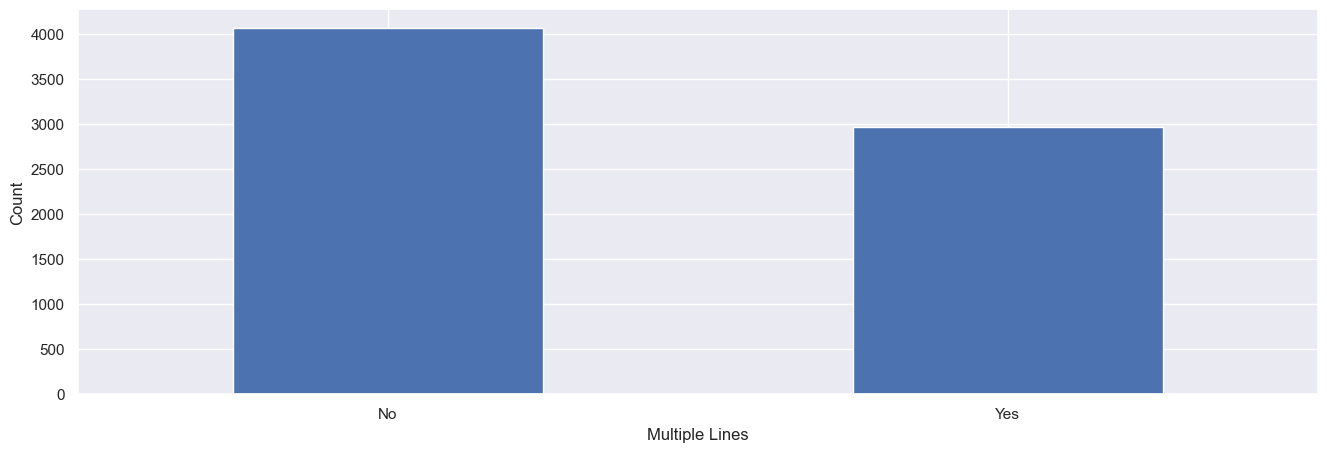

In [33]:
# Multiple lines
Cust['Multiple Lines'] = Cust['Multiple Lines'].fillna('No')
        
fig, axes= plt.subplots(1,1,figsize=(16,5))
Cust['Multiple Lines'].value_counts().plot(kind='bar', xlabel='Multiple Lines', ylabel='Count', rot=0)


<AxesSubplot: xlabel='Internet Type', ylabel='Count'>

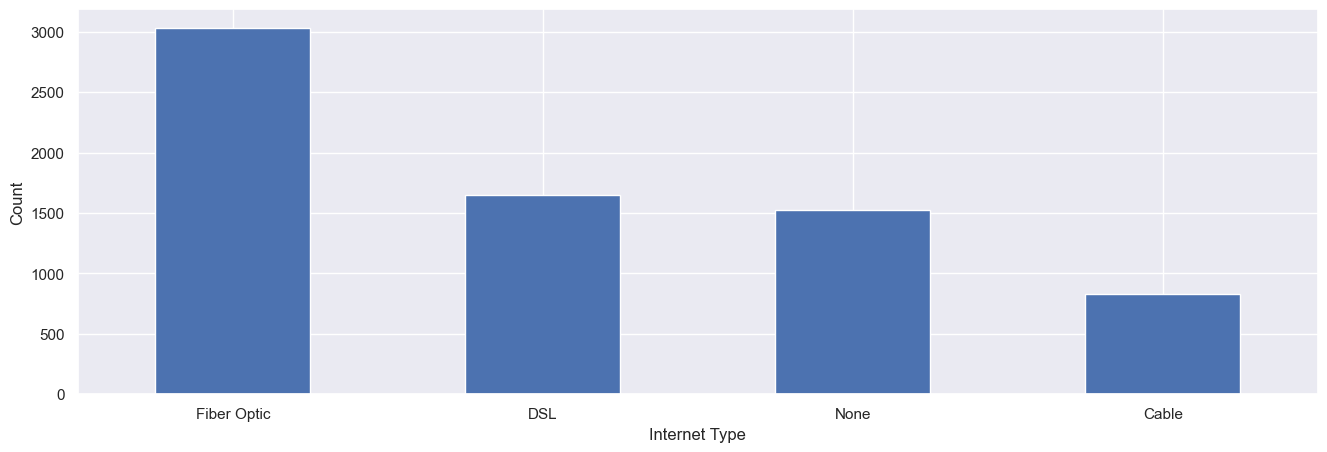

In [34]:
# Internet Type
Cust['Internet Type'] = Cust['Internet Type'].fillna('None')
    
fig, axes= plt.subplots(1,1,figsize=(16,5))
Cust['Internet Type'].value_counts().plot(kind='bar', xlabel='Internet Type', ylabel='Count', rot=0)


In [35]:
# Online Security, Online Security ,Online Backup ,Device Protection Plan ,Premium Tech Support ,Streaming TV ,Streaming Movies ,Streaming Music ,Unlimited Data  
var_na = ['Online Security','Online Backup' ,'Device Protection Plan' ,'Premium Tech Support' ,'Streaming TV' ,'Streaming Movies' ,'Streaming Music' ,'Unlimited Data']
for var in var_na: 
    Cust[var] = Cust[var].fillna('No')


In [36]:
for i in (columnes_cat):
    print( i ,'has :',Cust[i].isna().sum(), "NAs")

Married has : 0 NAs
Offer has : 0 NAs
Phone Service has : 0 NAs
Multiple Lines has : 0 NAs
Internet Type has : 0 NAs
Online Security has : 0 NAs
Online Backup has : 0 NAs
Device Protection Plan has : 0 NAs
Premium Tech Support has : 0 NAs
Streaming TV has : 0 NAs
Streaming Movies has : 0 NAs
Streaming Music has : 0 NAs
Unlimited Data has : 0 NAs
Contract has : 0 NAs
Paperless Billing has : 0 NAs
Payment Method has : 0 NAs
Customer Status has : 0 NAs
Churn Category has : 5174 NAs
Churn Reason has : 5174 NAs


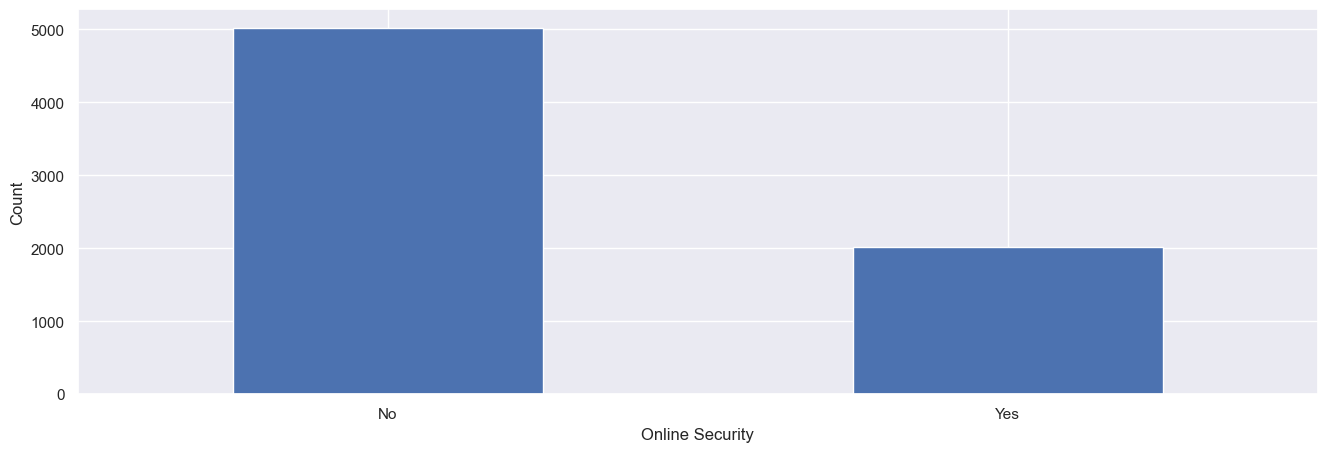

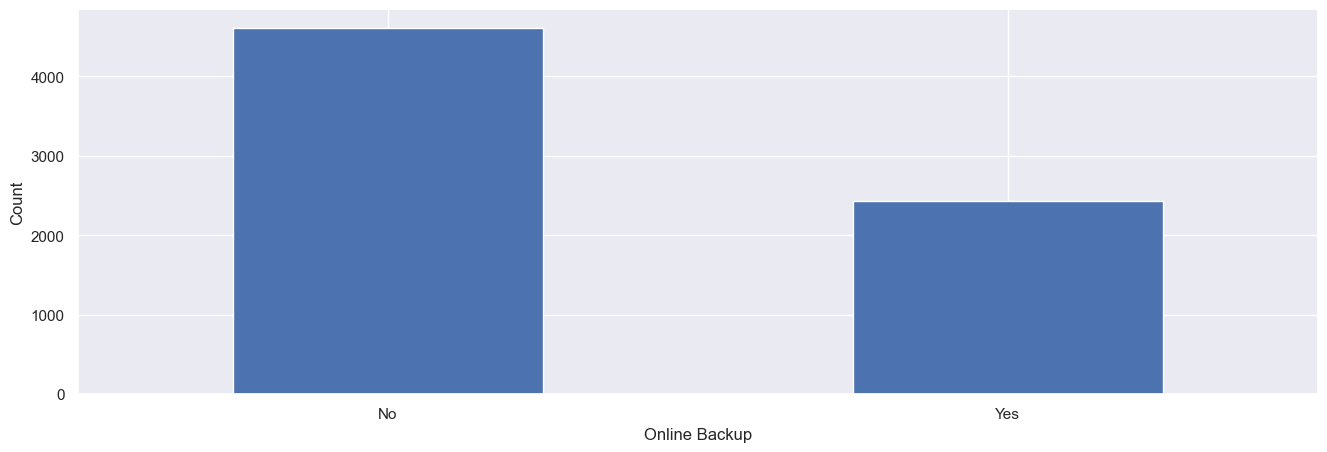

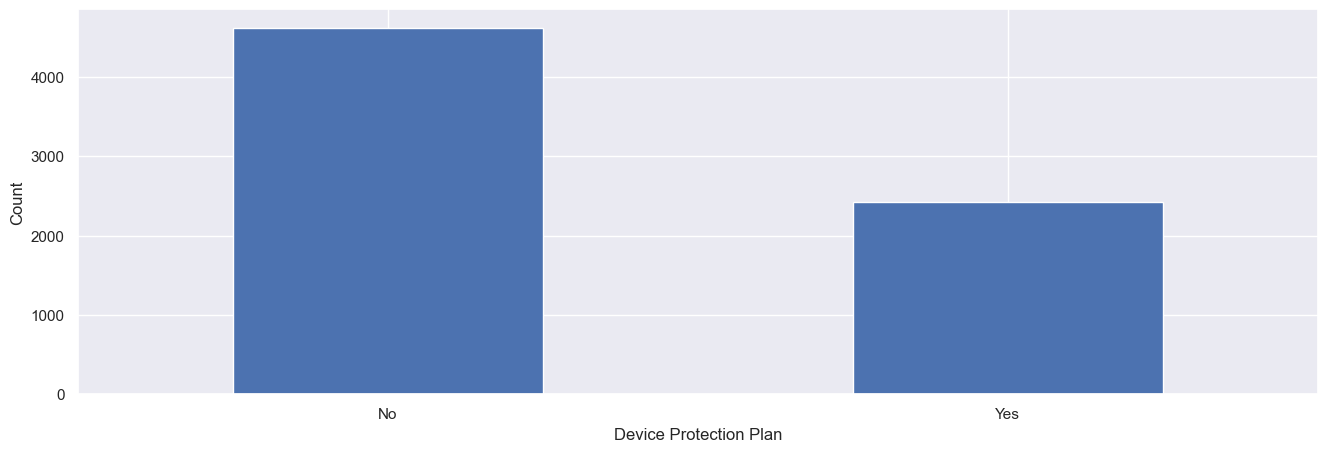

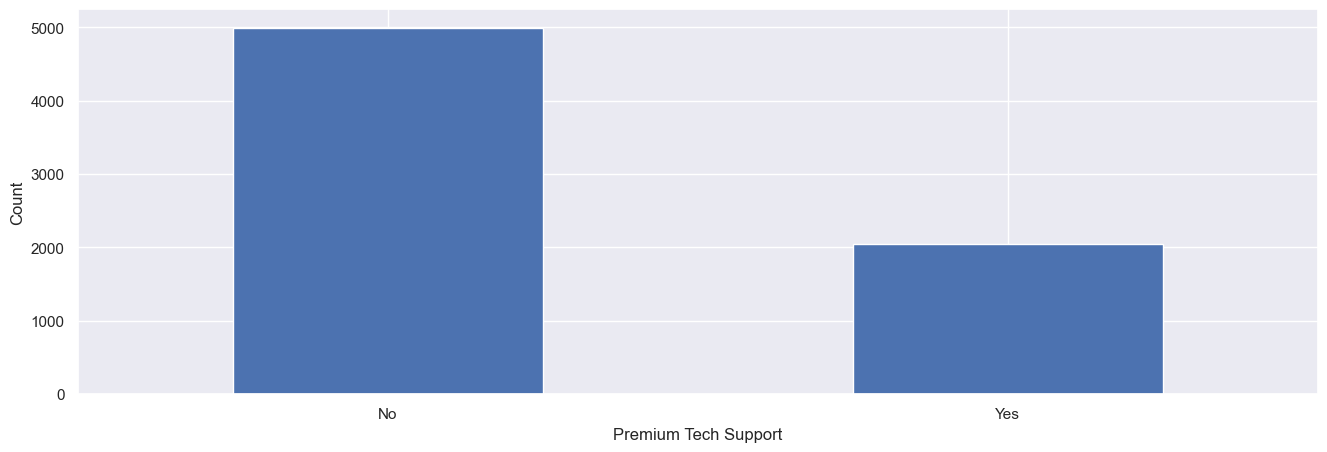

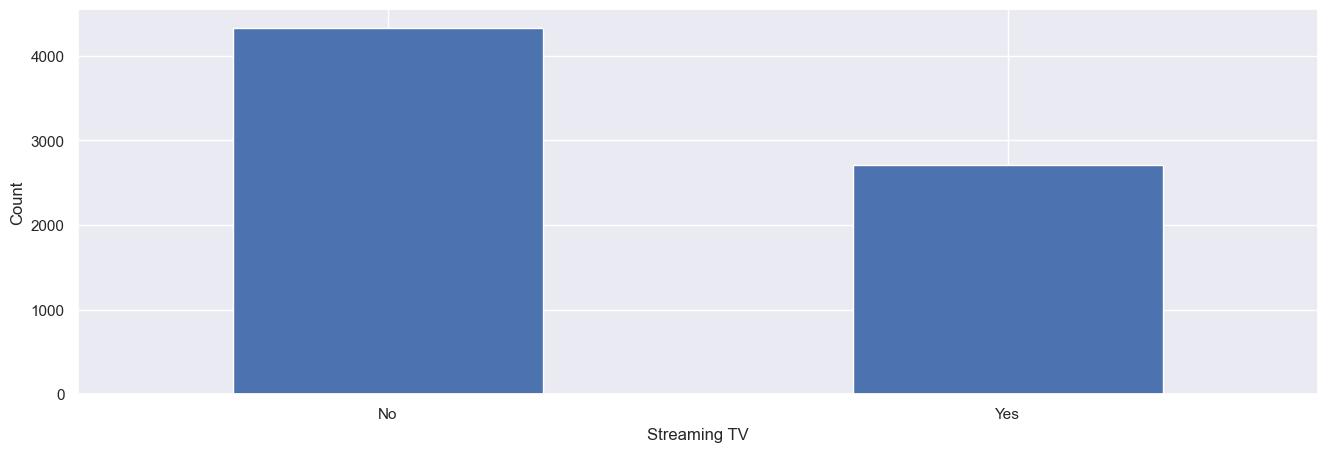

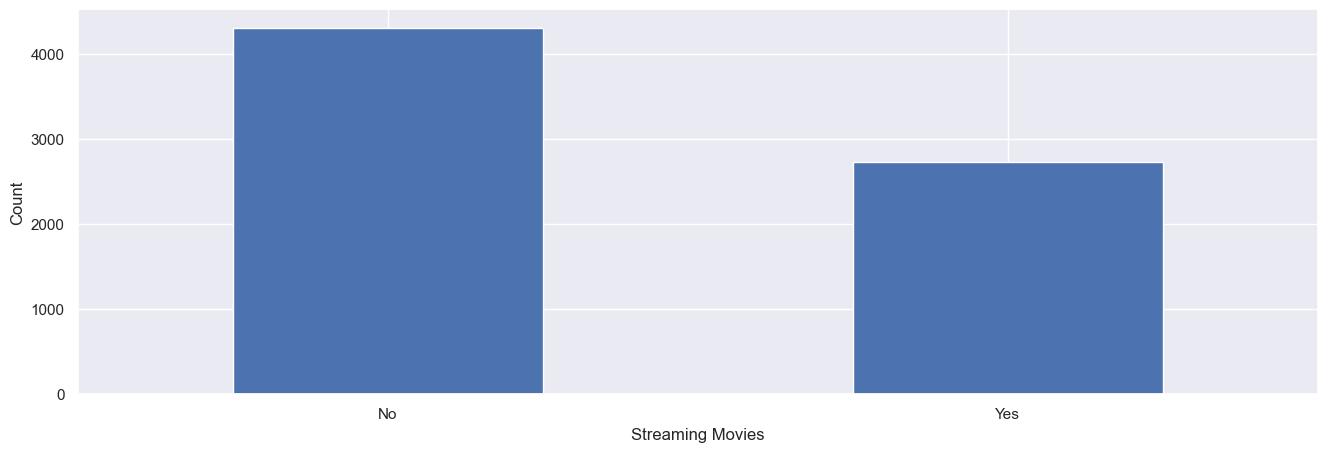

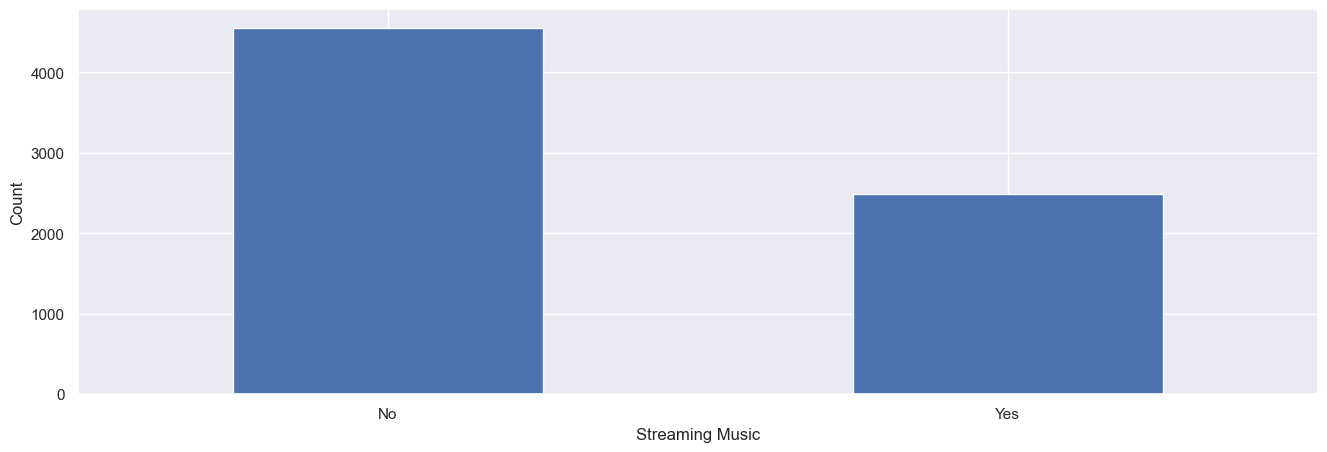

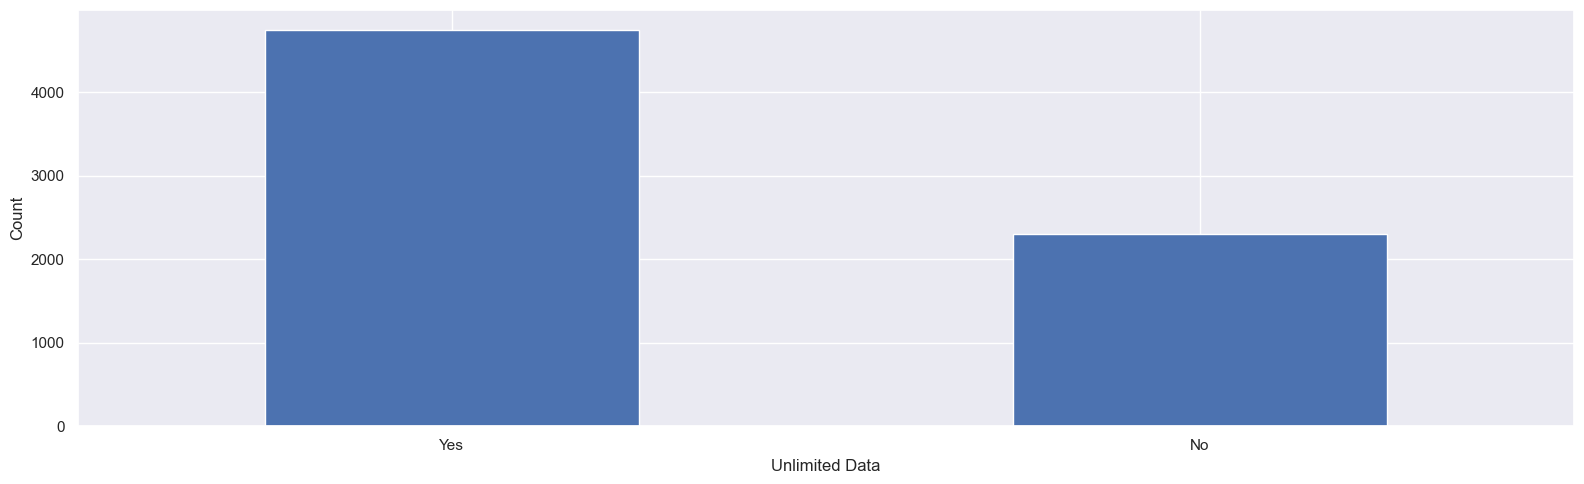

In [37]:
for var in var_na:
    fig, axes= plt.subplots(1,1,figsize=(16,5))
    Cust[var].value_counts().plot(kind='bar', xlabel=var, ylabel='Count', rot=0)
fig.tight_layout();

In [38]:
#Eliminem la categoria Joined de la base de dades
Cust = Cust.drop(Cust[Cust['Customer Status'] == 'Joined'].index)
Cust.shape

(6589, 28)

<AxesSubplot: xlabel='Churn Category', ylabel='Count'>

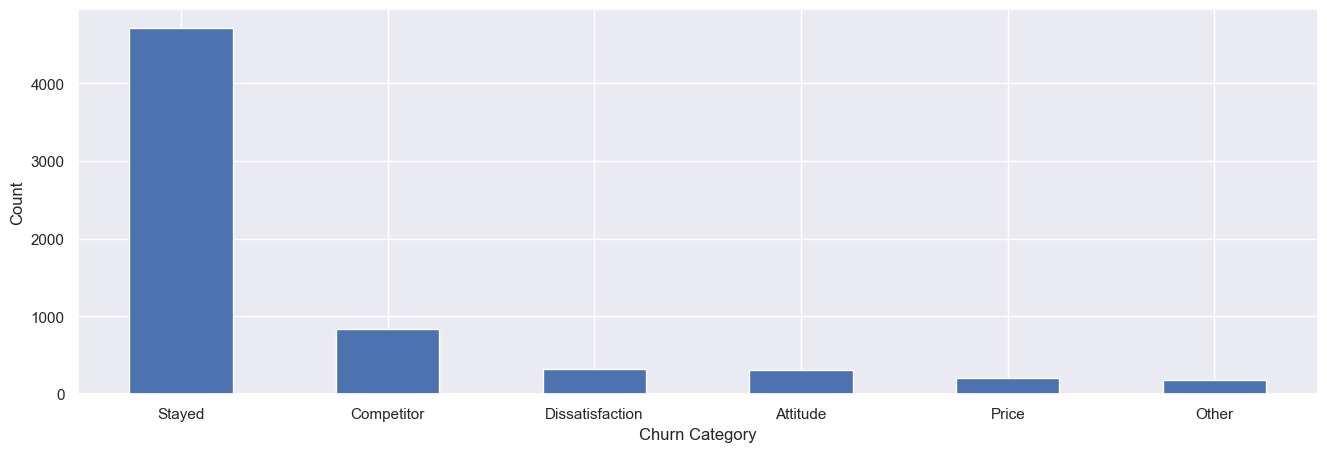

In [39]:
# Churn Category (nova cat stayed)
Cust['Churn Category'] = Cust['Churn Category'].fillna('Stayed')

fig, axes= plt.subplots(1,1,figsize=(16,5))
Cust['Churn Category'].value_counts().plot(kind='bar', xlabel='Churn Category', ylabel='Count', rot=0)

<AxesSubplot: xlabel='Churn Reason', ylabel='Count'>

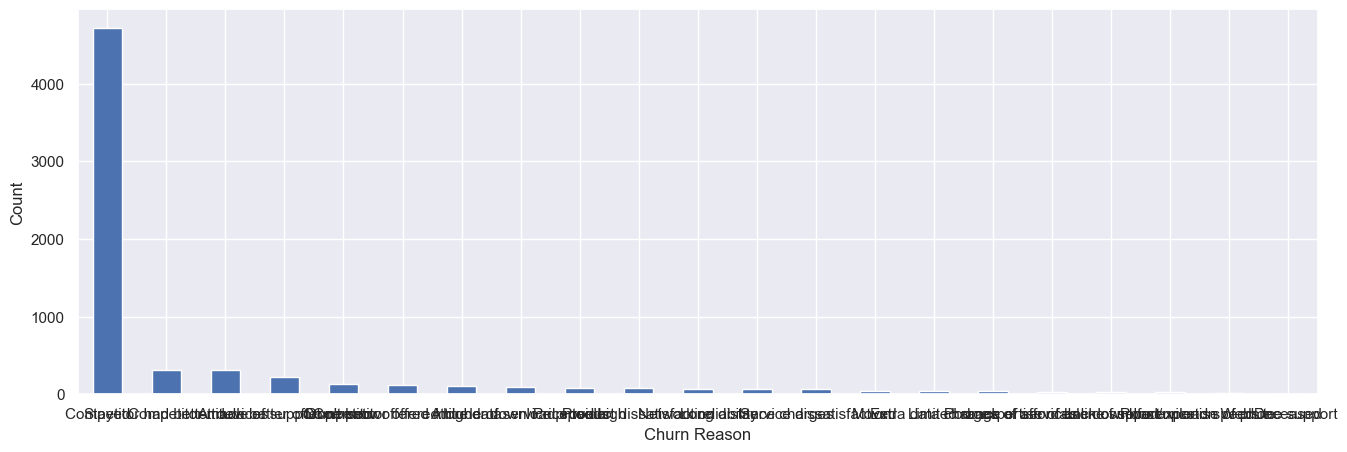

In [40]:
# Churn Reason (nova cat stayed)
Cust['Churn Reason'] = Cust['Churn Reason'].fillna('Stayed')

fig, axes= plt.subplots(1,1,figsize=(16,5))
Cust['Churn Reason'].value_counts().plot(kind='bar', xlabel='Churn Reason', ylabel='Count', rot=0)

### Tractem Valors Mancants a les Numèriques

In [41]:
Cust['Avg Monthly Long Distance Charges'] = Cust['Avg Monthly Long Distance Charges'].fillna(0)

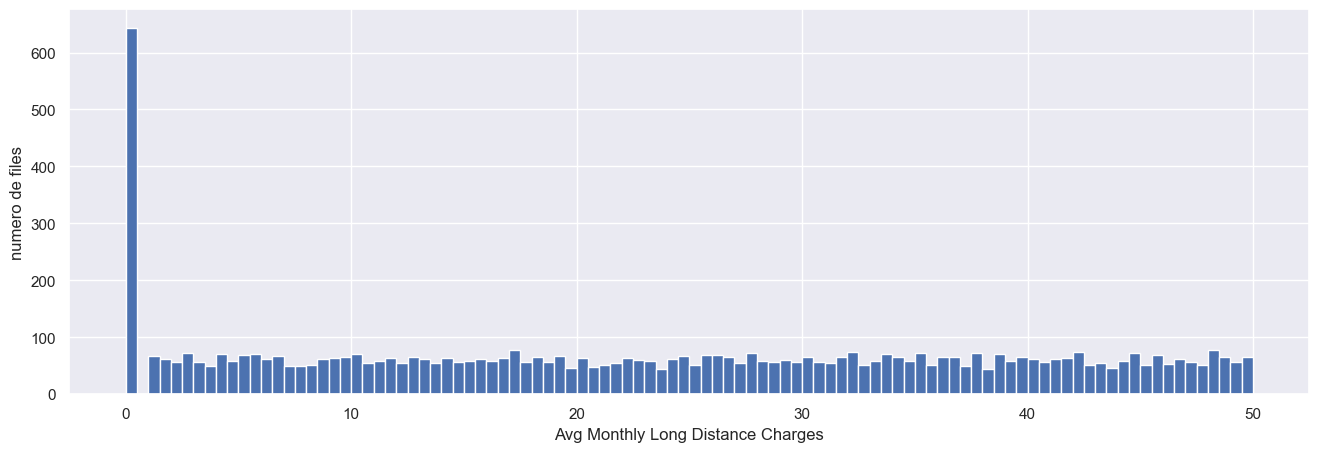

In [42]:
fig, axes= plt.subplots(1,1,figsize=(16,5))
plt.xlabel('Avg Monthly Long Distance Charges')
plt.ylabel('numero de files')
Cust['Avg Monthly Long Distance Charges'].hist(ax=axes, bins = 100);

In [43]:
Cust['Avg Monthly GB Download'] = Cust['Avg Monthly GB Download'].fillna(0)

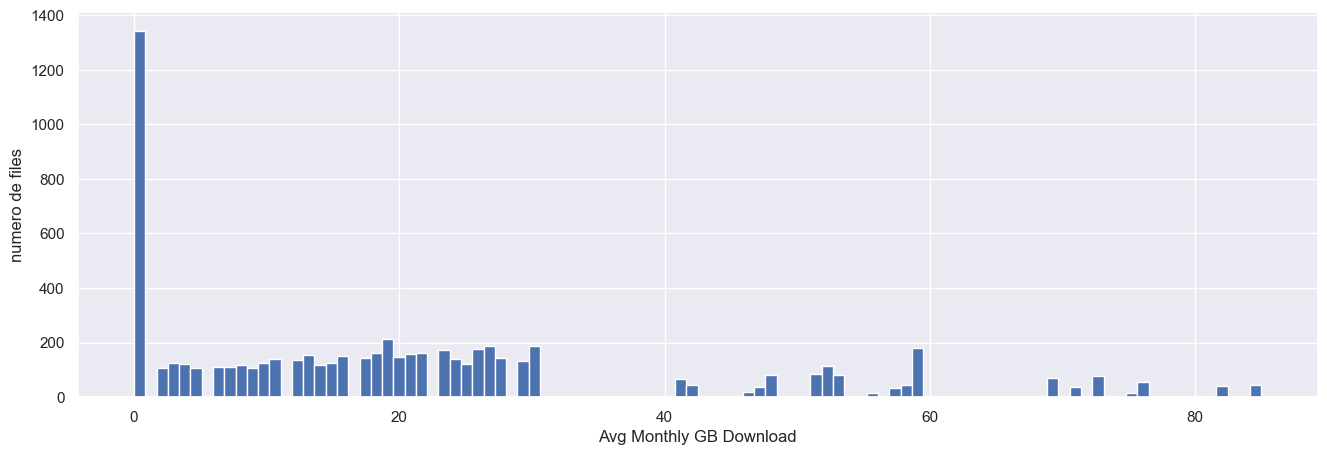

In [44]:
fig, axes= plt.subplots(1,1,figsize=(16,5))
plt.xlabel('Avg Monthly GB Download')
plt.ylabel('numero de files')
Cust['Avg Monthly GB Download'].hist(ax=axes, bins = 100);

In [45]:
Cust_models = Cust.drop(columns=['Churn Category', 'Churn Reason'])

In [46]:
Cust_models.info()
Cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6589 non-null   int64  
 1   Married                            6589 non-null   object 
 2   Number of Dependents               6589 non-null   int64  
 3   Zip Code                           6589 non-null   int64  
 4   Number of Referrals                6589 non-null   int64  
 5   Offer                              6589 non-null   object 
 6   Phone Service                      6589 non-null   object 
 7   Avg Monthly Long Distance Charges  6589 non-null   float64
 8   Multiple Lines                     6589 non-null   object 
 9   Internet Type                      6589 non-null   object 
 10  Avg Monthly GB Download            6589 non-null   float64
 11  Online Security                    6589 non-null   objec

## SECTION 2:	User profiling

In [47]:
# Creem dataset amb només empleats que han marxat i que s'han quedat 
Cust_churned = Cust.loc[Cust['Customer Status'] == 'Churned']
Cust_stayed = Cust.loc[Cust['Customer Status'] == 'Stayed']
Cust_churned.shape
Cust_stayed.shape

(1869, 28)

(4720, 28)

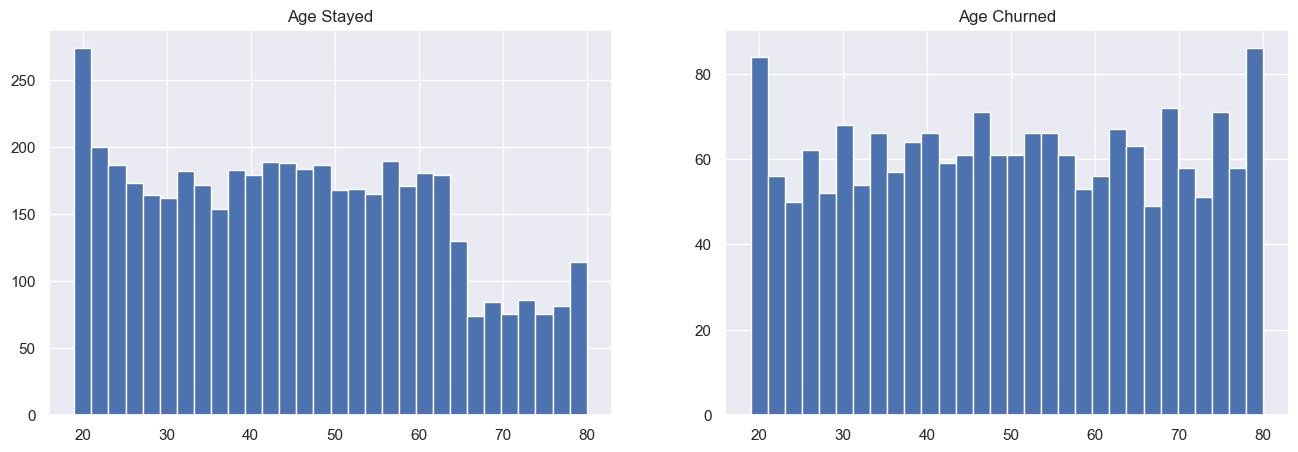

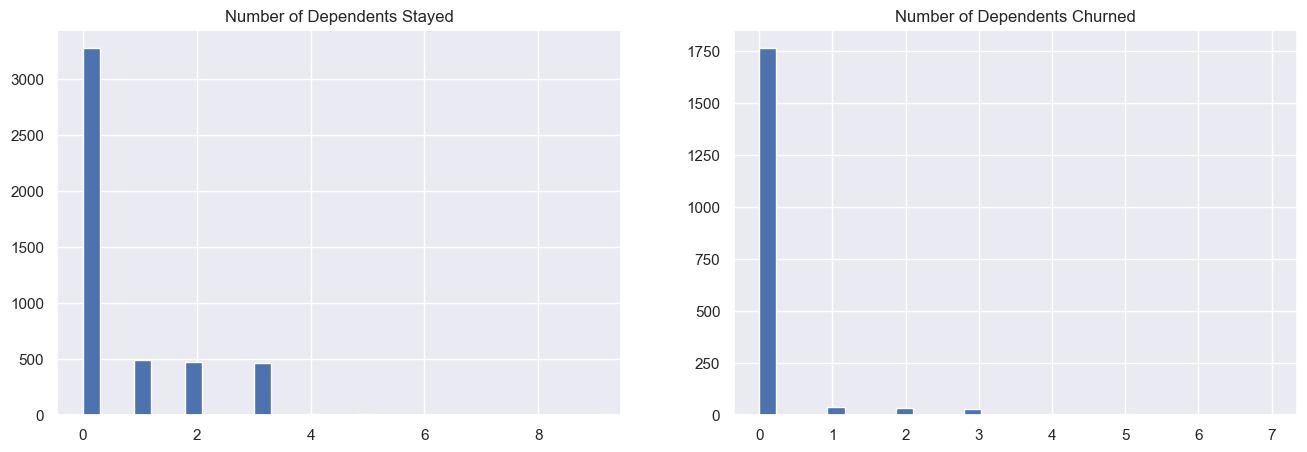

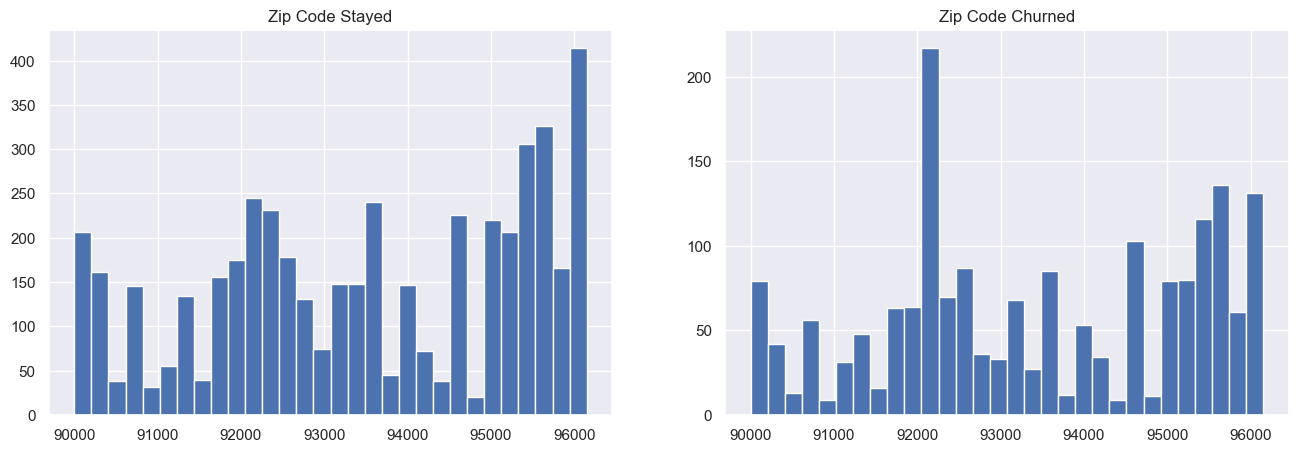

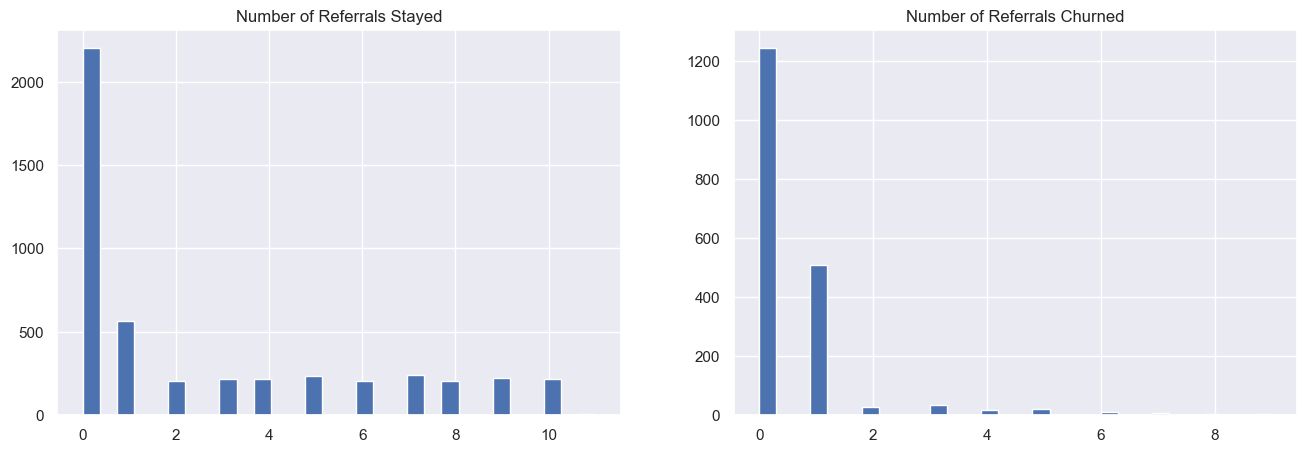

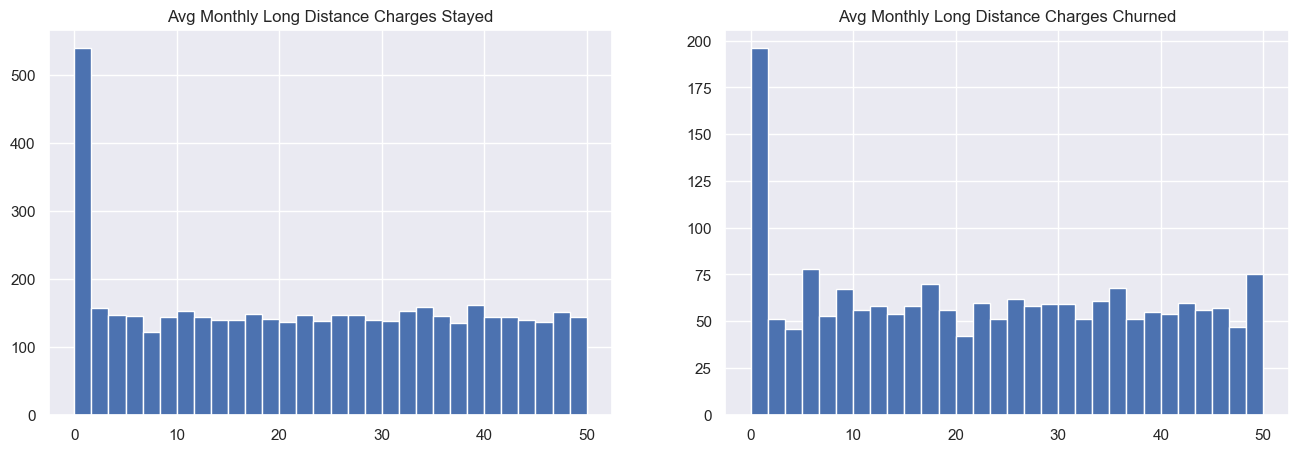

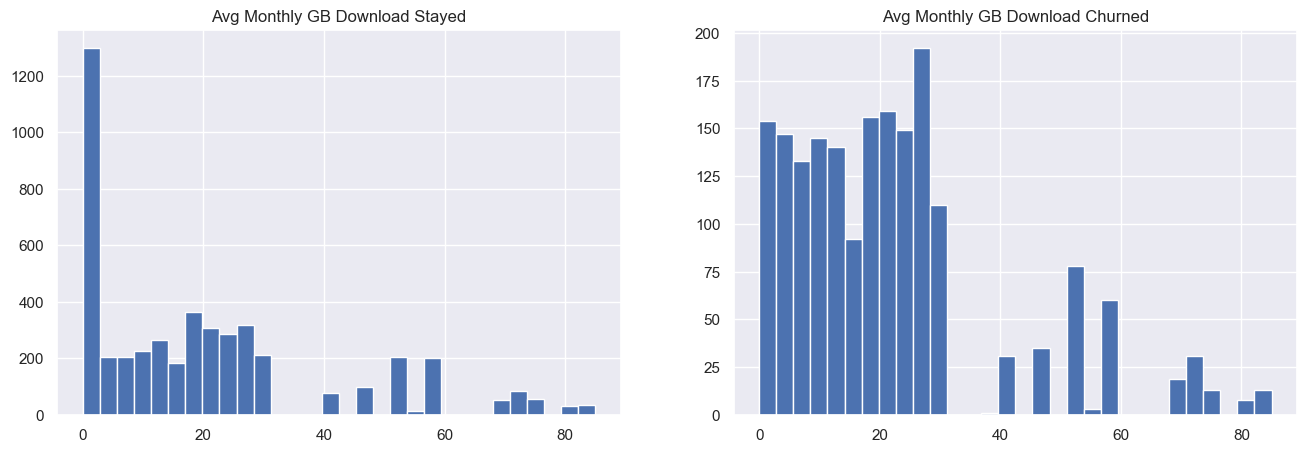

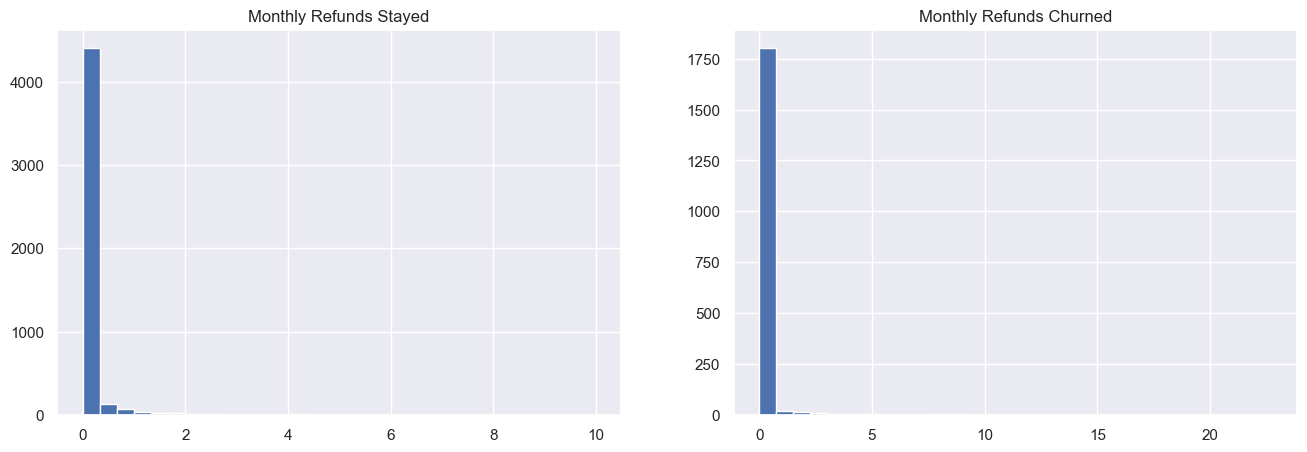

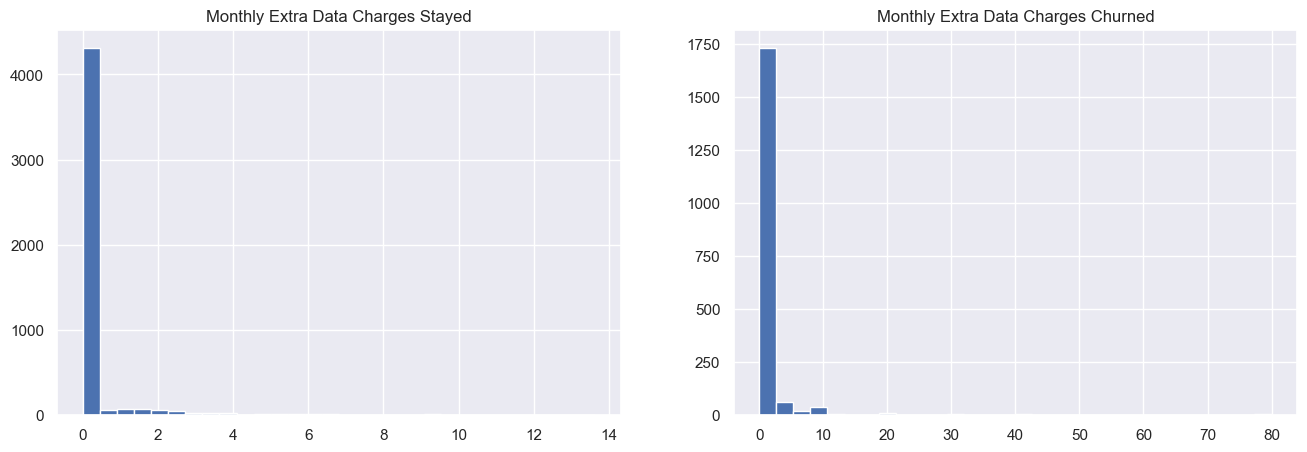

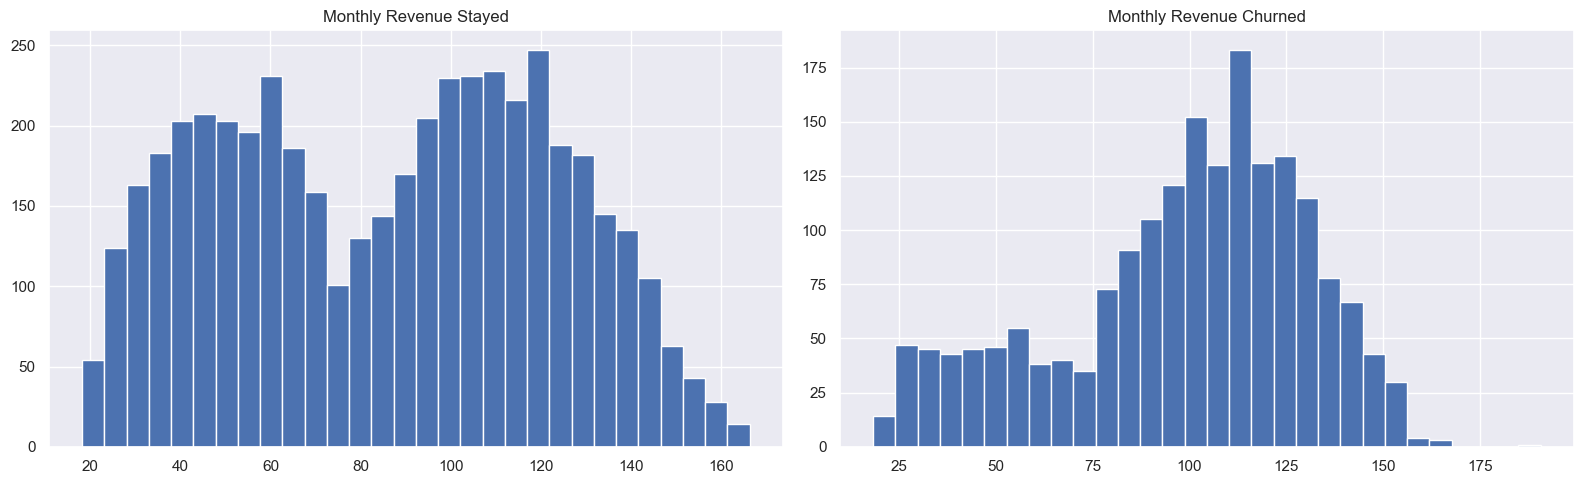

In [48]:
columnes_num = Cust.select_dtypes(include=np.number).columns.tolist()

for i in (columnes_num):
    fig, axs = plt.subplots(1, 2,figsize=(16,5))
    axs[0].set_title(i + ' Stayed')
    axs[1].set_title(i + ' Churned')
    Cust_stayed[i].hist(ax=axs[0], bins = 30);
    Cust_churned[i].hist(ax=axs[1], bins = 30);
fig.tight_layout();

In [49]:
for i in columnes_num:
    print(f'Stayed {i} :')
    Cust_stayed[i].describe()
    print(f'Churned {i} :')
    Cust_churned[i].describe()

Stayed Age :


count    4720.000
mean       45.582
std        16.383
min        19.000
25%        32.000
50%        45.000
75%        58.000
max        80.000
Name: Age, dtype: float64

Churned Age :


count    1869.000
mean       49.736
std        17.605
min        19.000
25%        35.000
50%        50.000
75%        65.000
max        80.000
Name: Age, dtype: float64

Stayed Number of Dependents :


count    4720.000
mean        0.618
std         1.058
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         9.000
Name: Number of Dependents, dtype: float64

Churned Number of Dependents :


count    1869.000
mean        0.118
std         0.550
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Number of Dependents, dtype: float64

Stayed Zip Code :


count     4720.000
mean     93513.581
std       1870.732
min      90001.000
25%      92070.000
50%      93547.500
75%      95346.500
max      96148.000
Name: Zip Code, dtype: float64

Churned Zip Code :


count     1869.000
mean     93435.753
std       1823.231
min      90001.000
25%      92117.000
50%      93292.000
75%      95258.000
max      96150.000
Name: Zip Code, dtype: float64

Stayed Number of Referrals :


count    4720.000
mean        2.615
std         3.324
min         0.000
25%         0.000
50%         1.000
75%         5.000
max        11.000
Name: Number of Referrals, dtype: float64

Churned Number of Referrals :


count    1869.000
mean        0.521
std         1.095
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         9.000
Name: Number of Referrals, dtype: float64

Stayed Avg Monthly Long Distance Charges :


count    4720.000
mean       22.940
std        15.491
min         0.000
25%         9.190
50%        22.950
75%        36.472
max        49.990
Name: Avg Monthly Long Distance Charges, dtype: float64

Churned Avg Monthly Long Distance Charges :


count    1869.000
mean       23.168
std        15.409
min         0.000
25%         9.500
50%        22.880
75%        36.360
max        49.980
Name: Avg Monthly Long Distance Charges, dtype: float64

Stayed Avg Monthly GB Download :


count    4720.000
mean       20.362
std        21.159
min         0.000
25%         0.000
50%        16.000
75%        27.000
max        85.000
Name: Avg Monthly GB Download, dtype: float64

Churned Avg Monthly GB Download :


count    1869.000
mean       22.175
std        18.309
min         0.000
25%         9.000
50%        19.000
75%        27.000
max        85.000
Name: Avg Monthly GB Download, dtype: float64

Stayed Monthly Refunds :


count    4720.000
mean        0.087
std         0.477
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         9.982
Name: Monthly Refunds, dtype: float64

Churned Monthly Refunds :


count    1869.000
mean        0.131
std         0.884
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        22.720
Name: Monthly Refunds, dtype: float64

Stayed Monthly Extra Data Charges :


count    4720.000
mean        0.233
std         1.020
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        13.636
Name: Monthly Extra Data Charges, dtype: float64

Churned Monthly Extra Data Charges :


count    1869.000
mean        0.861
std         4.553
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        80.000
Name: Monthly Extra Data Charges, dtype: float64

Stayed Monthly Revenue :


count    4720.000
mean       86.069
std        36.413
min        18.166
25%        53.728
50%        89.609
75%       116.260
max       166.380
Name: Monthly Revenue, dtype: float64

Churned Monthly Revenue :


count    1869.000
mean       98.331
std        32.499
min        18.275
25%        80.475
50%       103.749
75%       121.902
max       190.700
Name: Monthly Revenue, dtype: float64

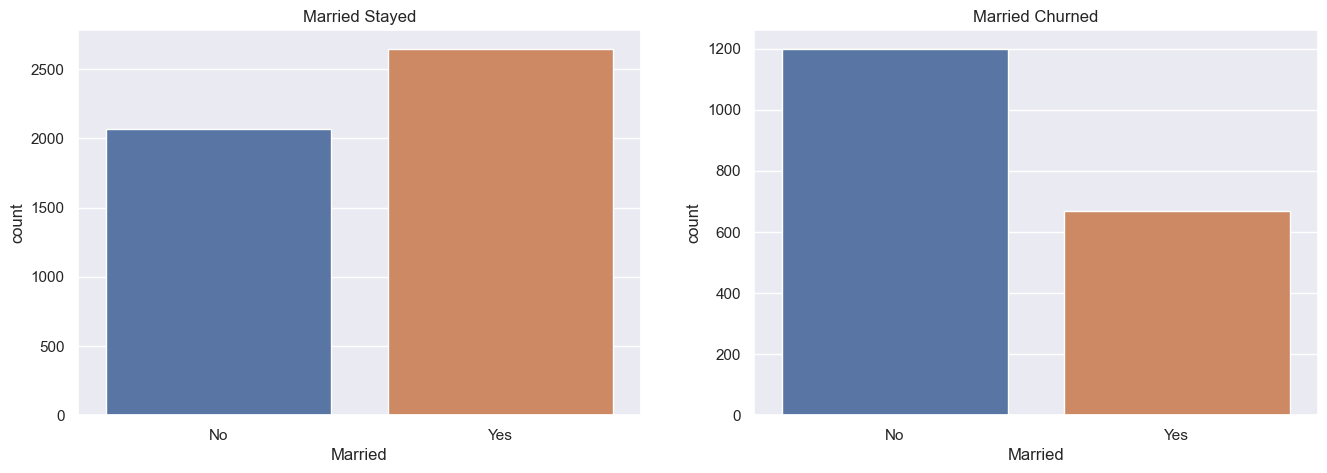

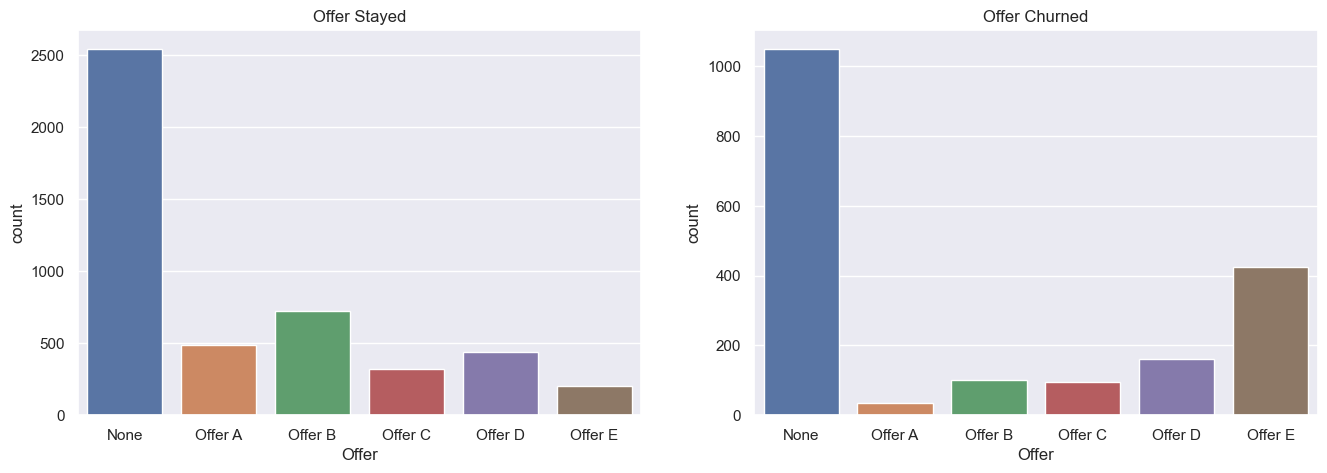

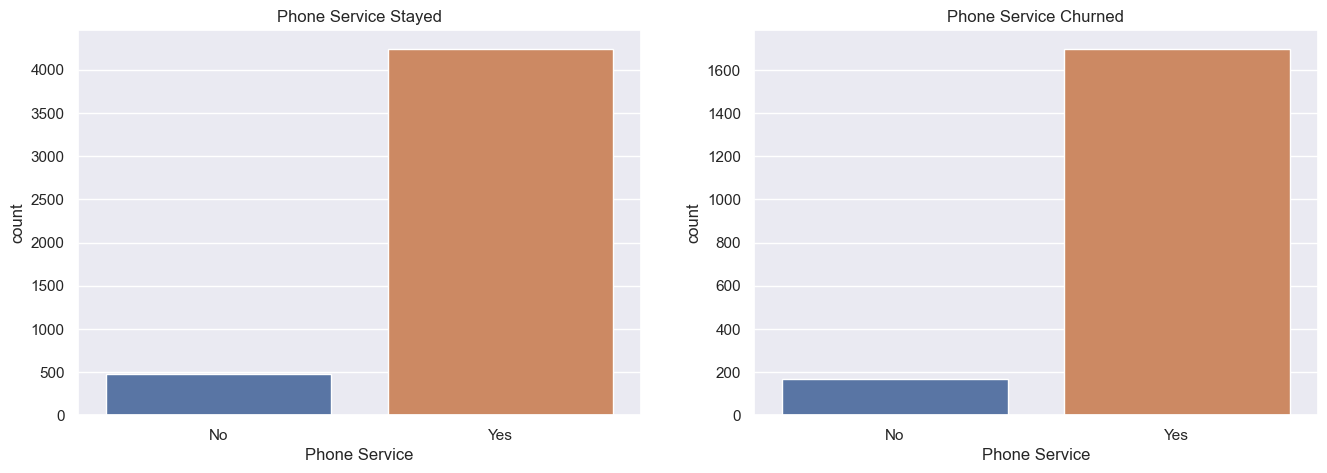

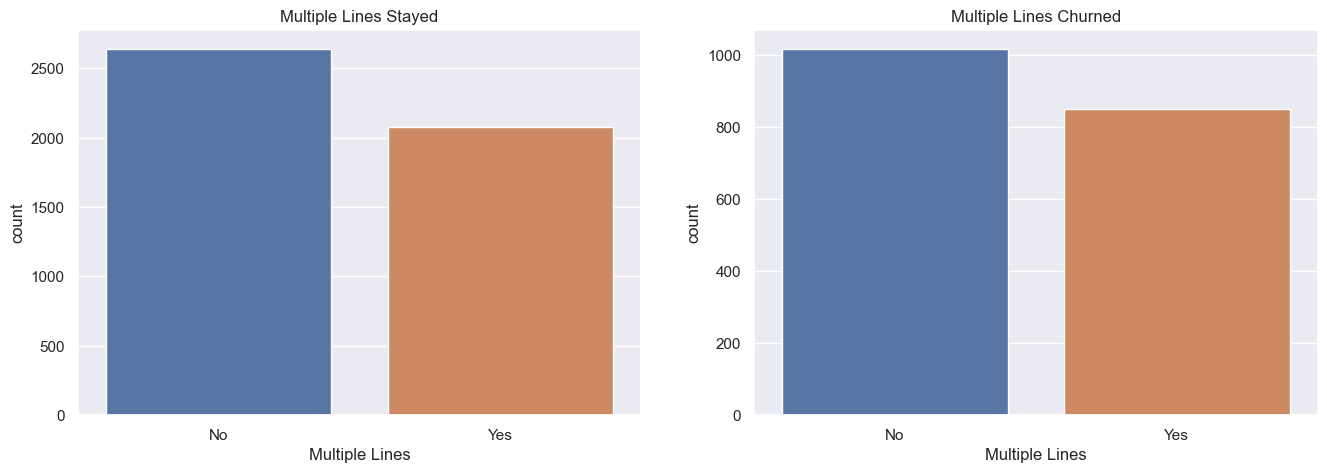

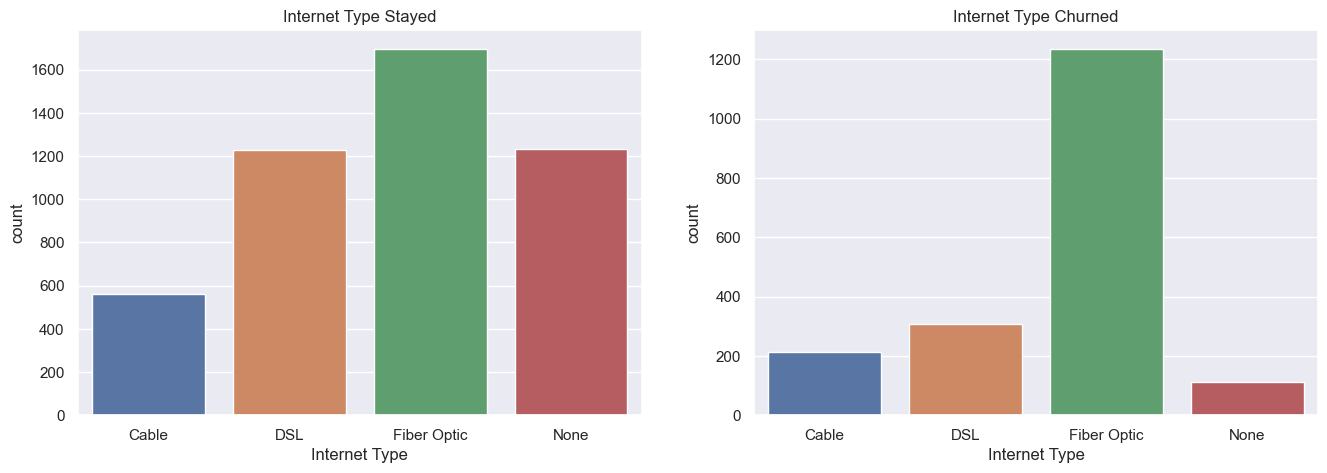

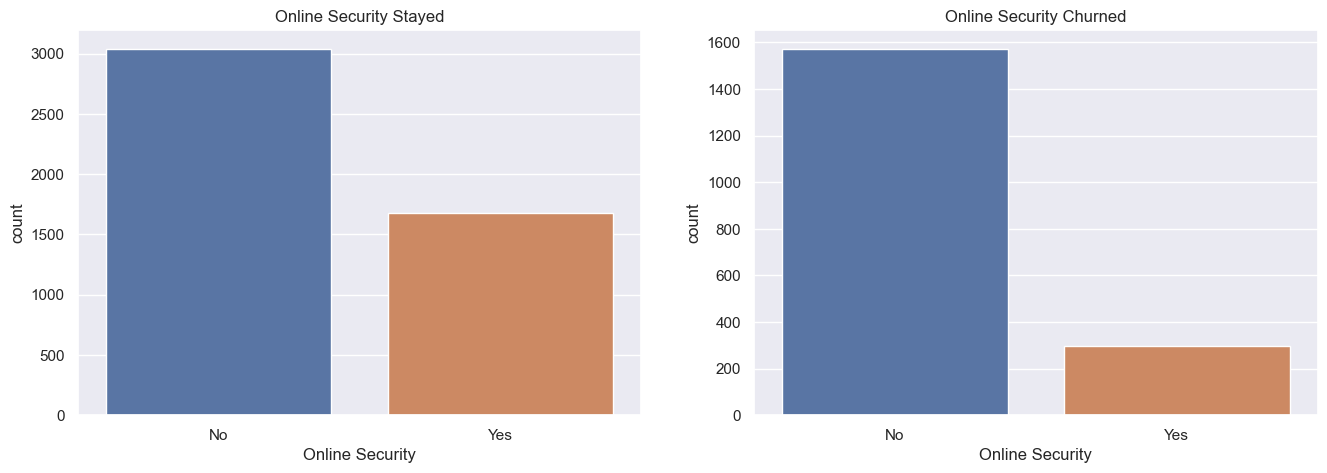

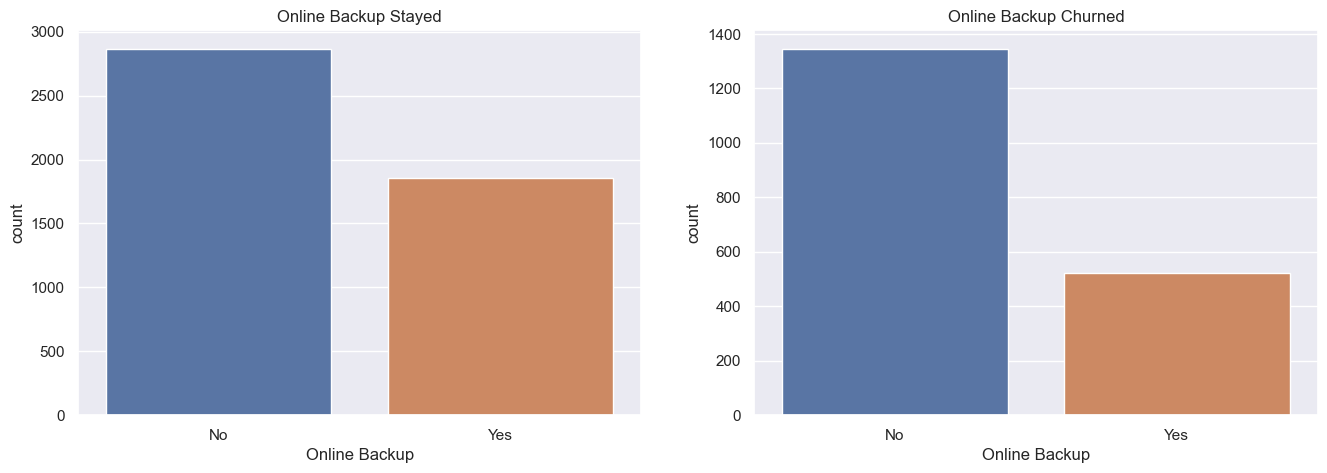

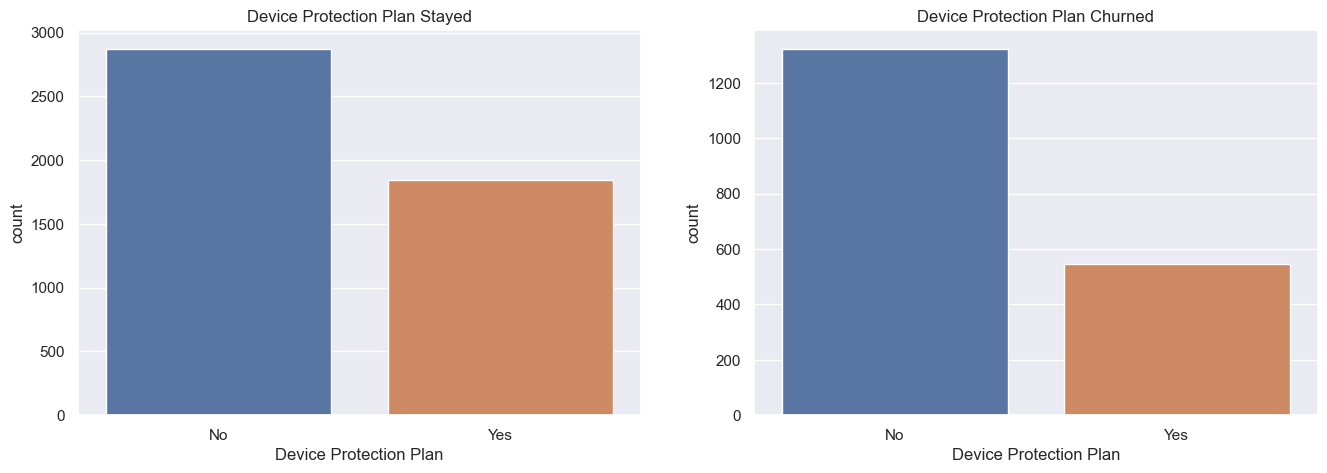

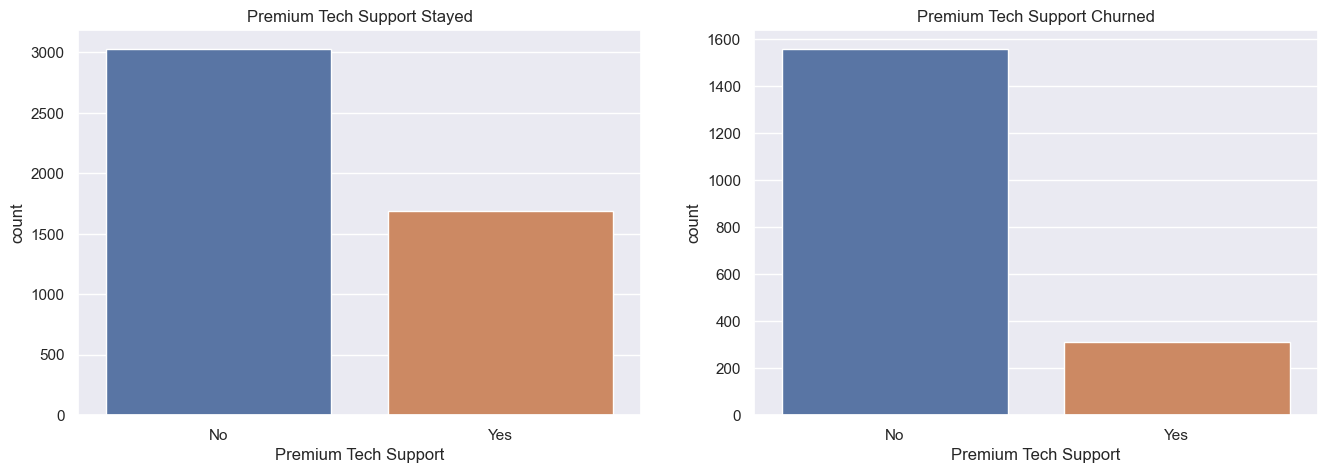

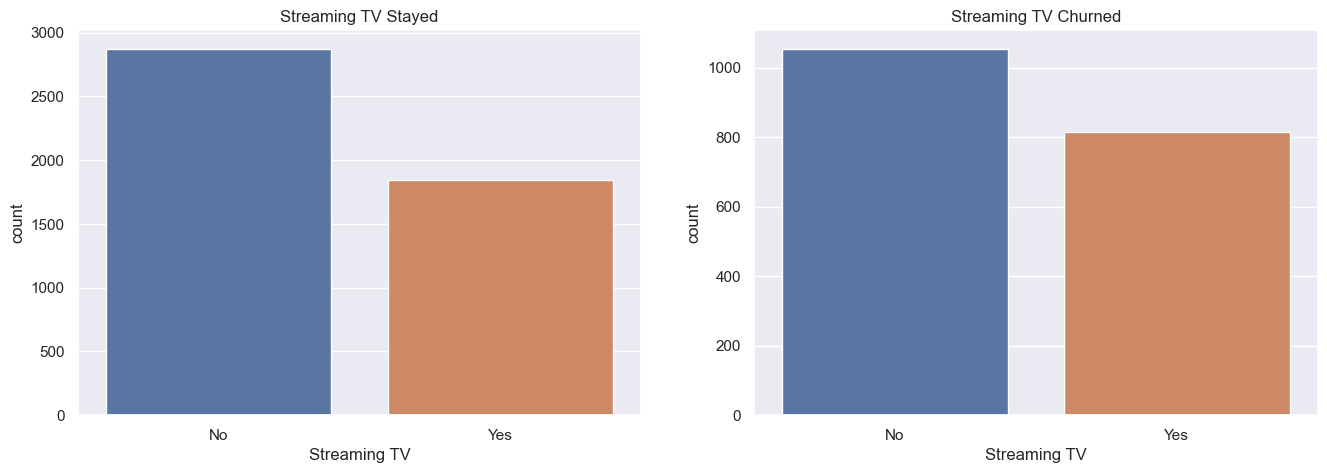

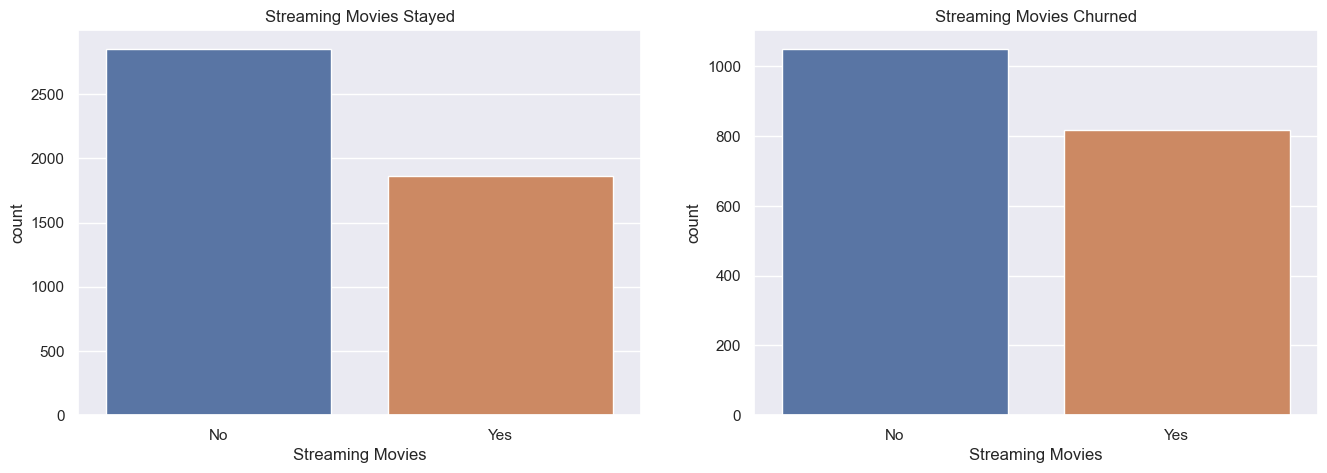

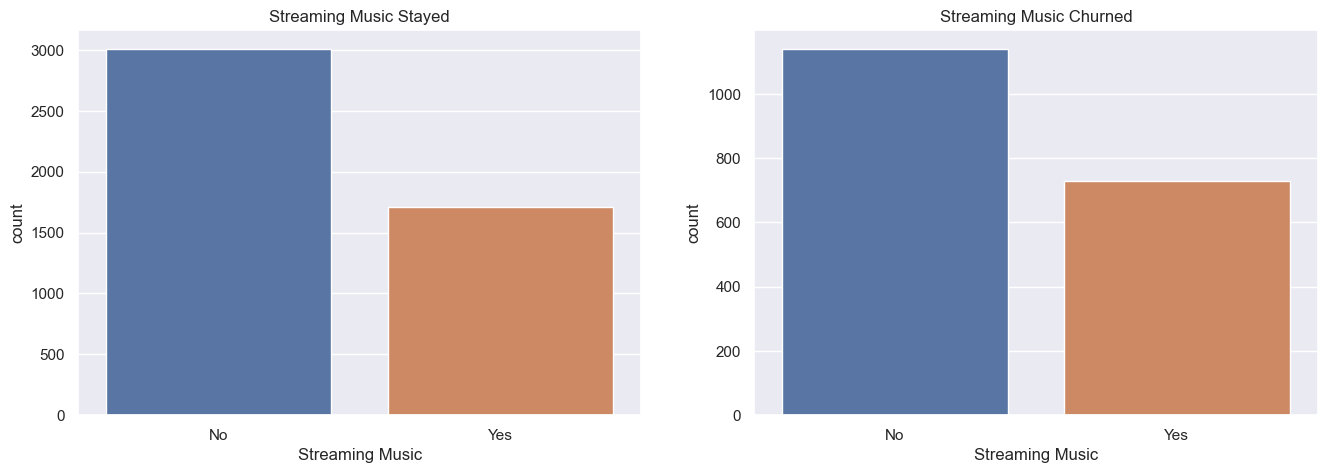

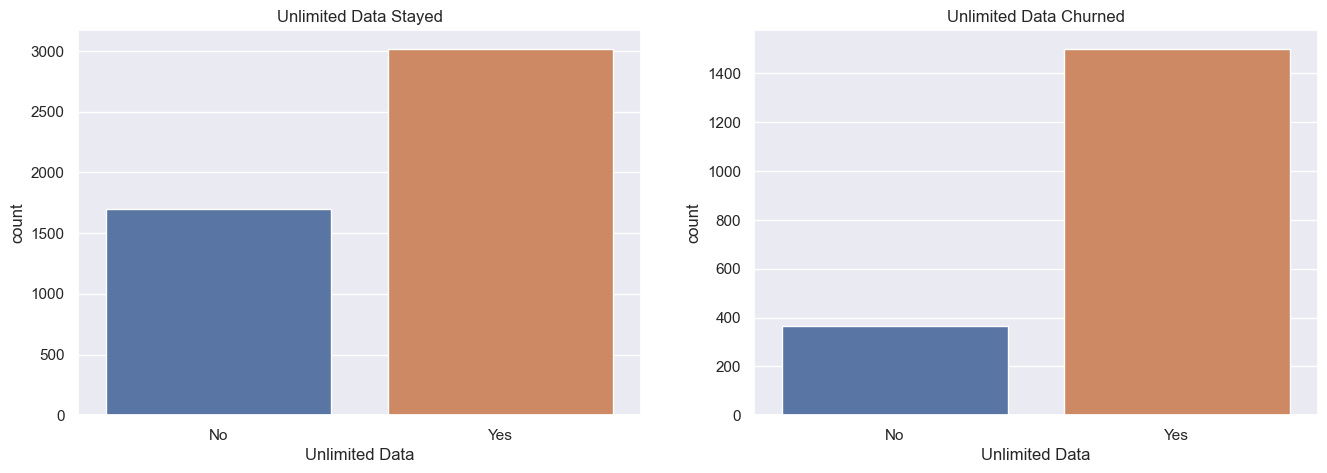

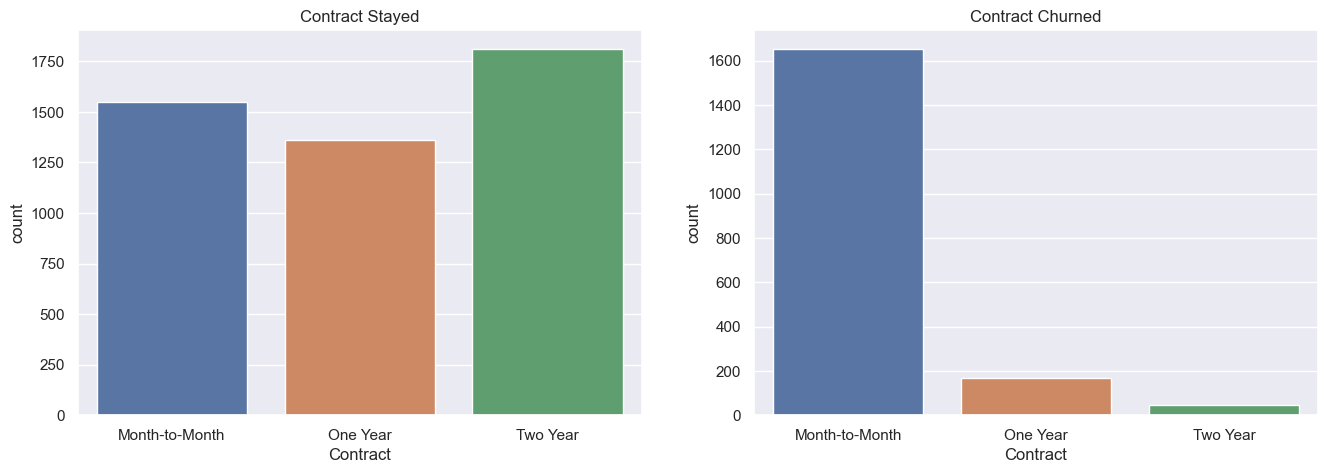

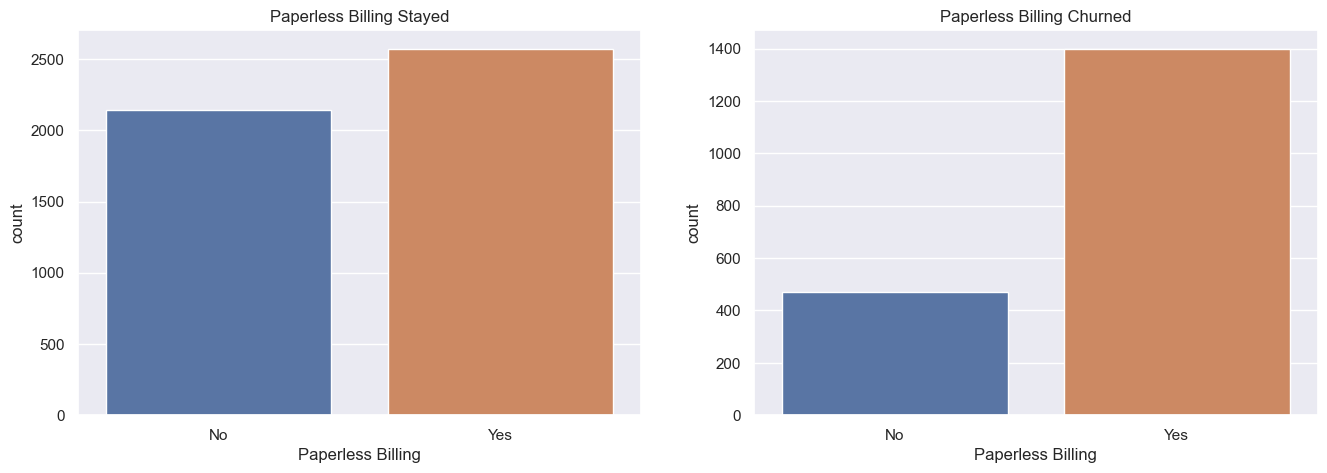

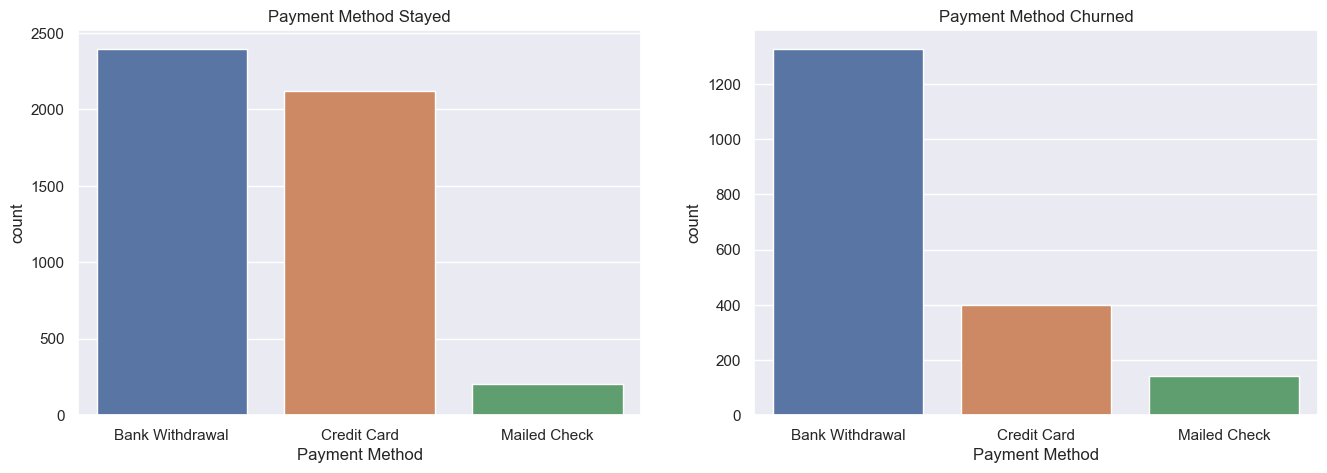

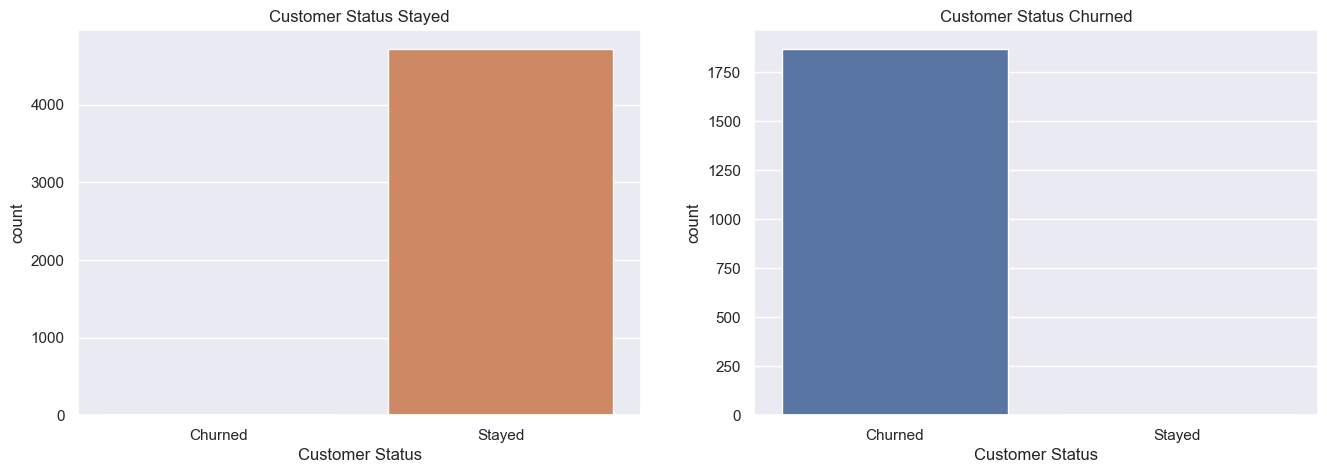

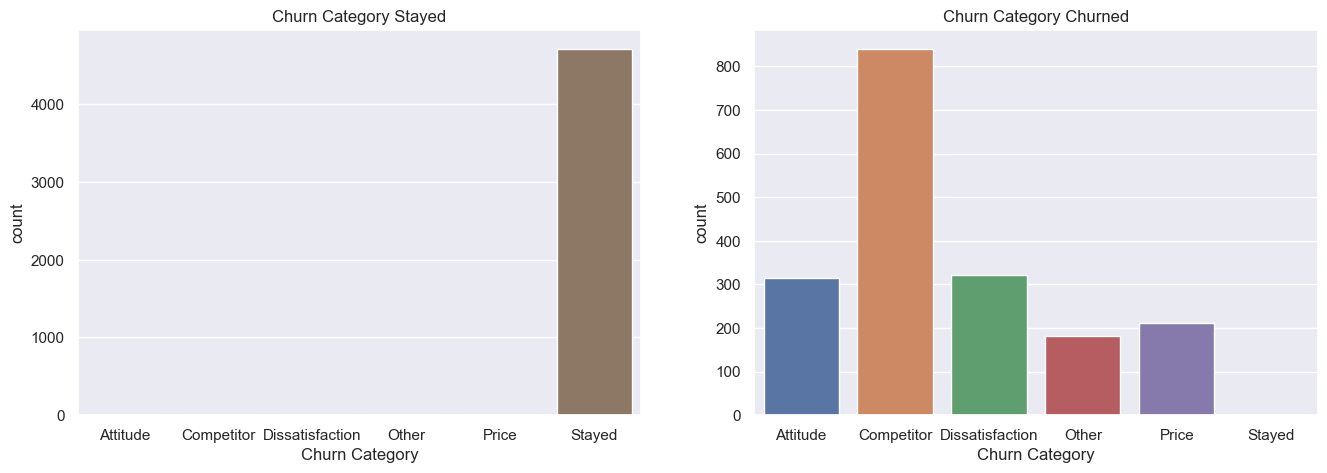

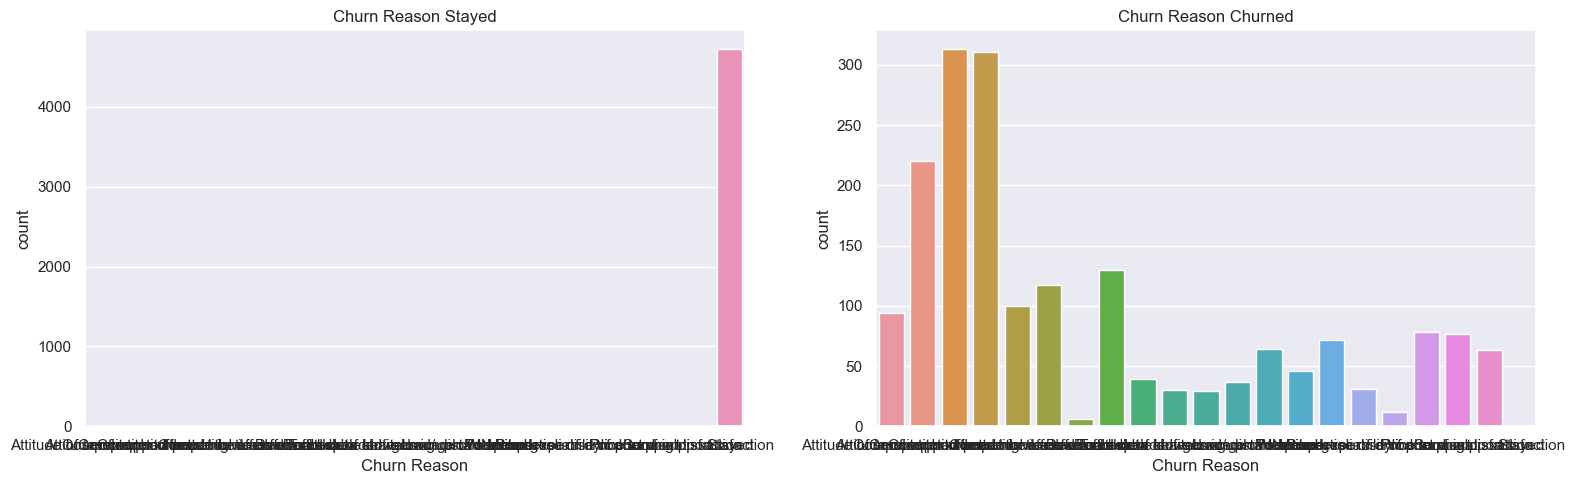

In [50]:
columnes_cat = []
for col in Cust.columns:
    if col not in columnes_num:
        columnes_cat.append(col)

for i in (columnes_cat):
    fig, (ax1,ax2)= plt.subplots(1,2,figsize=(16,5))
    ax1.set_title(i + ' Stayed')
    ax2.set_title(i + ' Churned')
    order = sorted(Cust[i].unique())
    sns.countplot(data= Cust_stayed , x = i, order= order, ax = ax1)
    sns.countplot(data= Cust_churned, x = i, order= order, ax = ax2)
fig.tight_layout();

 ## SECTION 3: Preprocessat de dades: Classifier

### Estudi de balanceig de la Variable objectiu

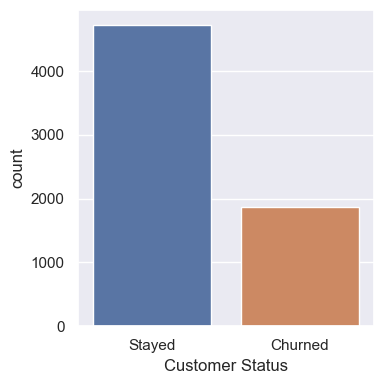

In [51]:
fig, axes= plt.subplots(1,1,figsize=(4,4))
sns.countplot(x= Cust['Customer Status'], ax = axes)
fig.tight_layout();

In [52]:
Cust['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Name: Customer Status, dtype: int64

In [53]:
# Creem un test i un val balancejat 
prova_ch = Cust_churned.copy()
prova_st = Cust_stayed.copy()

# Creem test
prova_ch_t = prova_ch.sample(n = 330, random_state = 2)
prova_st_t = prova_st.sample(n = 329, random_state = 2)
frames = [prova_ch_t,prova_st_t]
x_test = pd.concat(frames)
y_test = x_test['Customer Status']
x_test = x_test.drop(columns = ['Churn Category', 'Churn Reason'])

# treiem mostres utilitzades a test 
prova_ch_1 = prova_ch.drop(prova_ch_t.index)
prova_st_1 = prova_st.drop(prova_st_t.index)

# Creem val 
prova_ch_v = prova_ch_1.sample(n = 330, random_state = 2)
prova_st_v = prova_st_1.sample(n = 329, random_state = 2)
frames = [prova_ch_v,prova_st_v]
x_val = pd.concat(frames)
y_val = x_val['Customer Status']
x_val = x_val.drop(columns = ['Churn Category', 'Churn Reason'])

x_test.shape
y_test.shape

x_val.shape
y_val.shape

(659, 26)

(659,)

(659, 26)

(659,)

In [54]:
# Creem el train
churned_train = prova_ch_1.drop(prova_ch_v.index)
stayed_train = prova_st_1.drop(prova_st_v.index)
frames = [churned_train,stayed_train]
x_train = pd.concat(frames)
y_train = x_train['Customer Status']
x_train = x_train.drop(columns = ['Churn Category', 'Churn Reason'])
x_train.shape
y_train.shape

(5271, 26)

(5271,)

En aquest punt ja hem creat: x_train, x_val, x_test, y_tran, y_val i y_test

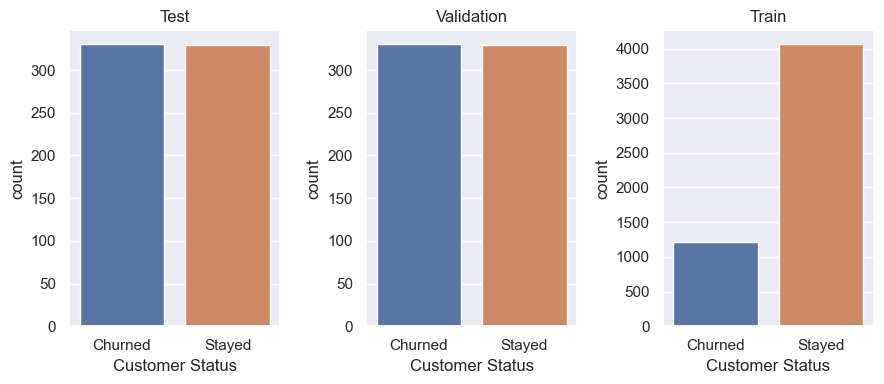

In [55]:
fig, axes= plt.subplots(1,3,figsize=(9,4))
axes[0].set_title('Test')
axes[1].set_title('Validation')
axes[2].set_title('Train')
sns.countplot(x= y_test, ax = axes[0])
sns.countplot(x= y_val, ax = axes[1])
sns.countplot(x= y_train, ax = axes[2])

fig.tight_layout();

In [56]:
y_test.value_counts()
y_val.value_counts()
y_train.value_counts()


Churned    330
Stayed     329
Name: Customer Status, dtype: int64

Churned    330
Stayed     329
Name: Customer Status, dtype: int64

Stayed     4062
Churned    1209
Name: Customer Status, dtype: int64

#### Balancejem el Train 

In [57]:
from sklearn.utils import resample
 
df_majority = x_train[x_train['Customer Status'] == 'Stayed']
df_minority = x_train[x_train['Customer Status'] == 'Churned']

In [58]:
# Oversampling

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(df_majority),    # match number in majority class
                                   random_state=42) # reproducible results

# Combine the majority and oversampled minority classes
df_oversampled = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the data to ensure the oversampled minority class is distributed throughout the dataset
x_train_over = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)
y_train_over = x_train_over['Customer Status']

x_train_over['Customer Status'].value_counts()
x_train_over.head()


Stayed     4062
Churned    4062
Name: Customer Status, dtype: int64

Age Married  Number of Dependents  Zip Code  Number of Referrals    Offer  \
0   52      No                     0     96044                    0     None   
1   23      No                     0     95006                    0  Offer B   
2   78      No                     1     91605                    0  Offer D   
3   35     Yes                     3     90022                    4     None   
4   58      No                     0     95322                    0  Offer E   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0           Yes                               4.22             No   
1           Yes                              21.56            Yes   
2           Yes                              11.59             No   
3            No                               0.00             No   
4           Yes                              46.17             No   

  Internet Type  ...  Streaming Movies Streaming Music Unlimited Data  \
0           DSL  ...                No              No             No   
1   Fiber Optic  ...               Yes             Yes            Yes   
2   Fiber Optic  ...               Yes              No             No   
3         Cable  ...               Yes             Yes            Yes   
4   Fiber Optic  ...                No              No            Yes   

         Contract Paperless Billing   Payment Method Customer Status  \
0        One Year                No      Credit Card          Stayed   
1  Month-to-Month               Yes  Bank Withdrawal         Churned   
2  Month-to-Month               Yes  Bank Withdrawal         Churned   
3        Two Year               Yes      Credit Card          Stayed   
4  Month-to-Month               Yes  Bank Withdrawal         Churned   

  Monthly Refunds Monthly Extra Data Charges Monthly Revenue  
0             0.0                      1.667          82.840  
1             0.0                      0.000         131.986  
2             0.0                     10.909         124.345  
3             0.0                      0.000          56.188  
4             0.0                      0.000         116.270  

[5 rows x 26 columns]

In [59]:
# Undersampling 

# Oversample the minority class
df_majority_undersampled = resample(df_majority, 
                                   replace=False,     # sample with replacement
                                   n_samples=len(df_minority),    # match number in majority class
                                   random_state=42) # reproducible results

# Combine the majority and oversampled minority classes
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the data to ensure the oversampled minority class is distributed throughout the dataset
x_train_under = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)
y_train_under = x_train_under['Customer Status']

x_train_under['Customer Status'].value_counts()
x_train_under.head()

Churned    1209
Stayed     1209
Name: Customer Status, dtype: int64

Age Married  Number of Dependents  Zip Code  Number of Referrals    Offer  \
0   44      No                     0     95004                    0  Offer E   
1   26      No                     0     92129                    0     None   
2   44      No                     0     90278                    0     None   
3   38     Yes                     0     96050                    1  Offer D   
4   57      No                     1     92056                    0  Offer D   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0           Yes                              40.15            Yes   
1           Yes                              36.48             No   
2           Yes                              18.90            Yes   
3           Yes                               5.40             No   
4           Yes                              44.88             No   

  Internet Type  ...  Streaming Movies Streaming Music Unlimited Data  \
0   Fiber Optic  ...               Yes             Yes            Yes   
1           DSL  ...                No              No            Yes   
2   Fiber Optic  ...                No              No            Yes   
3   Fiber Optic  ...               Yes             Yes            Yes   
4          None  ...                No              No             No   

         Contract Paperless Billing   Payment Method Customer Status  \
0  Month-to-Month               Yes  Bank Withdrawal         Churned   
1  Month-to-Month               Yes  Bank Withdrawal         Churned   
2  Month-to-Month                No  Bank Withdrawal          Stayed   
3        One Year                No  Bank Withdrawal         Churned   
4  Month-to-Month                No      Credit Card          Stayed   

  Monthly Refunds Monthly Extra Data Charges Monthly Revenue  
0             0.0                        0.0         132.710  
1             0.0                        0.0          83.647  
2             0.0                        0.0         109.004  
3             0.0                        0.0         105.691  
4             0.0                        0.0          64.535  

[5 rows x 26 columns]

Fem gràfics dels balanceijos de train 

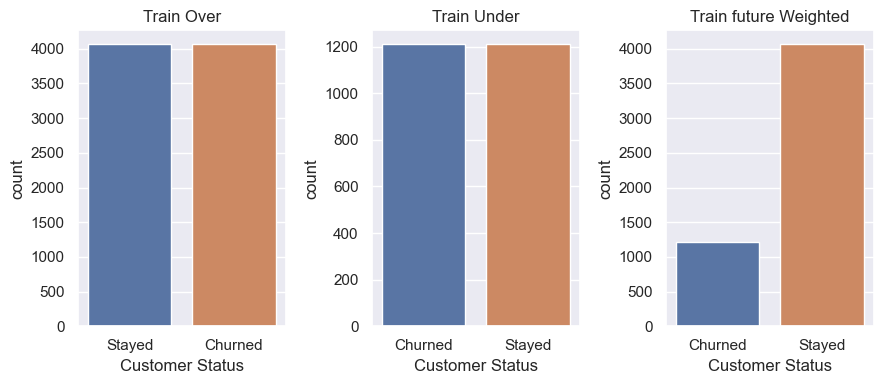

In [60]:
fig, axes= plt.subplots(1,3,figsize=(9,4))
axes[0].set_title('Train Over')
axes[1].set_title('Train Under')
axes[2].set_title('Train future Weighted')
sns.countplot(x= y_train_over, ax = axes[0])
sns.countplot(x= y_train_under, ax = axes[1])
sns.countplot(x= y_train, ax = axes[2])

fig.tight_layout();

### Normalitzem les variables


Visualitzarem les nostres dades per veure si existeixen errors o patrons en les nostres dades que podem identificar, per això representarem les variables de la següent manera Boxplots o histogrames

### Variables Numèriques:

Anem a veure com són les nostres variables numèriques

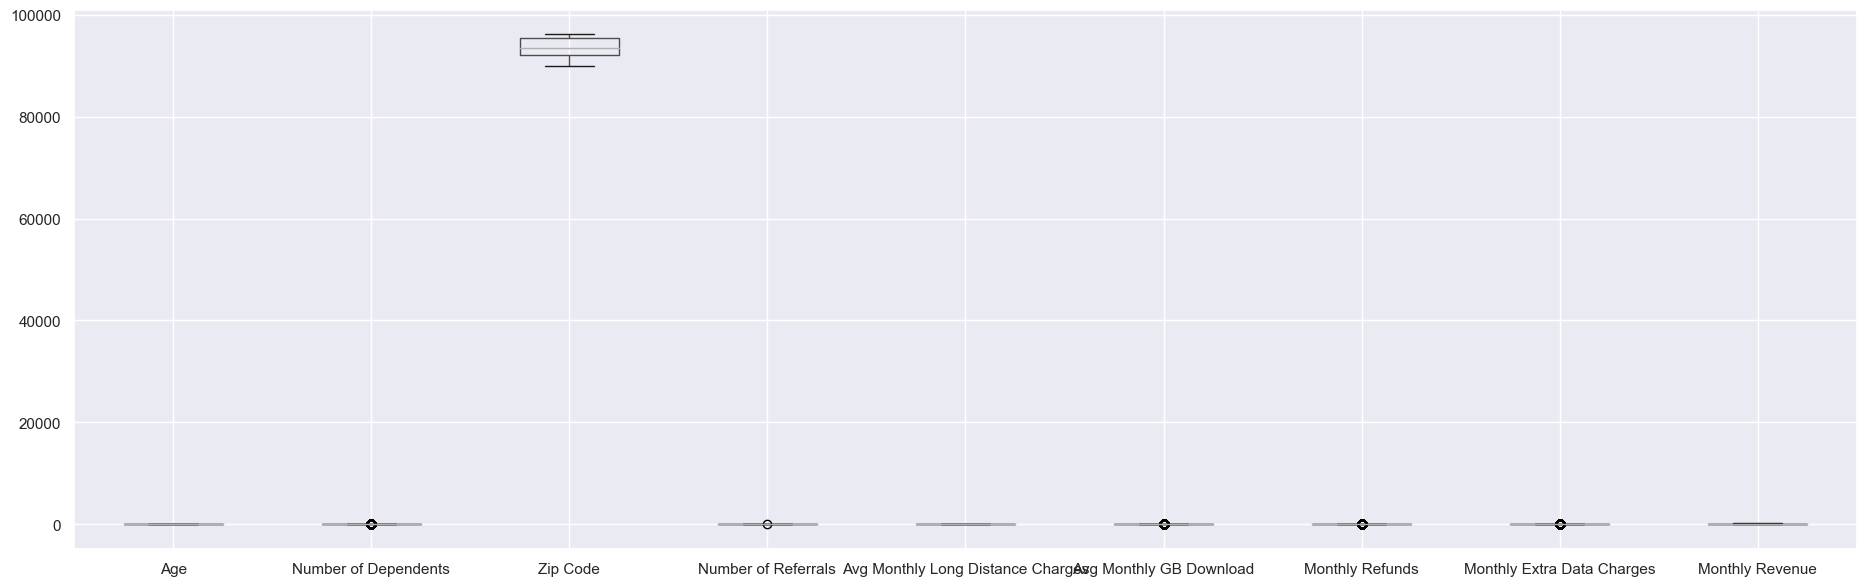

In [61]:
numerical_columns = x_train.dtypes[x_train.dtypes!='object'].index
x_train.loc[:, numerical_columns].boxplot(figsize=(23,7));

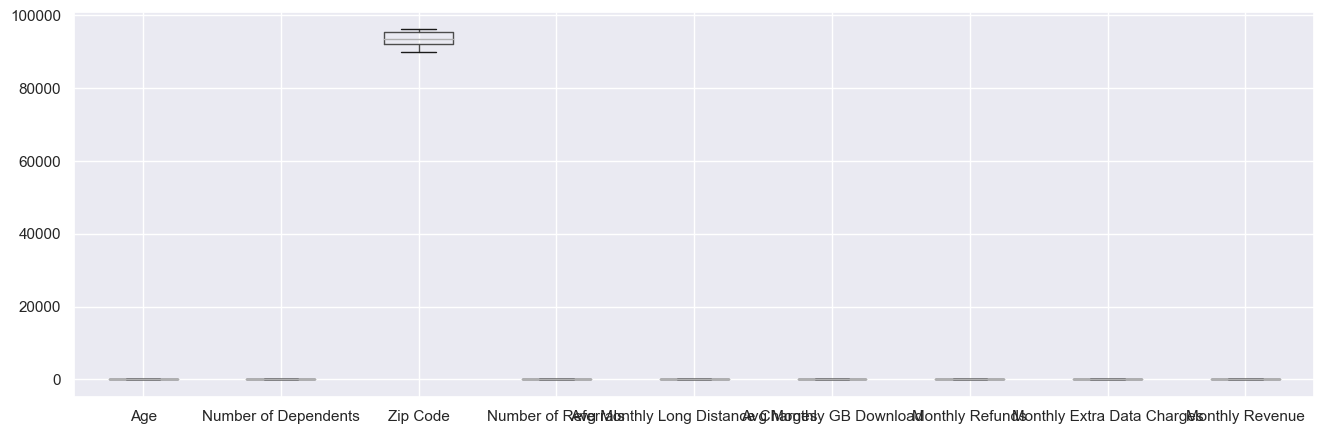

In [62]:
x_train.loc[:,numerical_columns].boxplot(figsize=(16,5),showfliers=False); # much better, but would be nicer one by one

In [63]:
min_max_scaler =  preprocessing.MinMaxScaler()

# Noramlitzem x_train
x_train_norm = x_train.copy()
x_train_norm[numerical_columns] = min_max_scaler.fit_transform(x_train[numerical_columns])
x_train_norm.describe()

# Noramlitzem x_train_over
x_train_over_norm = x_train_over.copy()
x_train_over_norm[numerical_columns] = min_max_scaler.fit_transform(x_train_over[numerical_columns])
x_train_over_norm.describe()

# Noramlitzem x_train_under
x_train_under_norm = x_train_under.copy()
x_train_under_norm[numerical_columns] = min_max_scaler.fit_transform(x_train_under[numerical_columns])
x_train_under_norm.describe()


'''
for i in numerical_columns:
    x, _= boxcox(train_new[i])
    train_new[i + '_bx'] = x

train_new[['Median Age_bxm', 'Male Population_bxm', 'Female Population_bxm', 'Total Population_bxm', 'Number of Veterans_bxm', 
            'Foreign-born_bxm', 'Average Household Size_bxm']] = min_max_scaler.fit_transform(train_new[['Median Age_bx', 'Male Population_bx', 'Female Population_bx', 'Total Population_bx', 'Number of Veterans_bx', 
            'Foreign-born_bx', 'Average Household Size_bx']])
'''

Age  Number of Dependents  Zip Code  Number of Referrals  \
count  5271.000              5271.000  5271.000             5271.000   
mean      0.451                 0.056     0.571                0.193   
std       0.274                 0.110     0.301                0.280   
min       0.000                 0.000     0.000                0.000   
25%       0.213                 0.000     0.343                0.000   
50%       0.443                 0.000     0.576                0.000   
75%       0.656                 0.000     0.868                0.364   
max       1.000                 1.000     1.000                1.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           5271.000                 5271.000   
mean                               0.460                    0.245   
std                                0.308                    0.243   
min                                0.000                    0.000   
25%                                0.186                    0.035   
50%                                0.460                    0.200   
75%                                0.727                    0.318   
max                                1.000                    1.000   

       Monthly Refunds  Monthly Extra Data Charges  Monthly Revenue  
count         5271.000                    5271.000         5271.000  
mean             0.005                       0.005            0.410  
std              0.029                       0.030            0.208  
min              0.000                       0.000            0.000  
25%              0.000                       0.000            0.226  
50%              0.000                       0.000            0.441  
75%              0.000                       0.000            0.577  
max              1.000                       1.000            1.000

Age  Number of Dependents  Zip Code  Number of Referrals  \
count  8124.000              8124.000  8124.000             8124.000   
mean      0.465                 0.040     0.570                0.143   
std       0.280                 0.095     0.298                0.243   
min       0.000                 0.000     0.000                0.000   
25%       0.230                 0.000     0.344                0.000   
50%       0.459                 0.000     0.575                0.000   
75%       0.689                 0.000     0.867                0.091   
max       1.000                 1.000     1.000                1.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           8124.000                 8124.000   
mean                               0.460                    0.254   
std                                0.308                    0.236   
min                                0.000                    0.000   
25%                                0.185                    0.071   
50%                                0.458                    0.212   
75%                                0.725                    0.329   
max                                1.000                    1.000   

       Monthly Refunds  Monthly Extra Data Charges  Monthly Revenue  
count         8124.000                    8124.000         8124.000  
mean             0.005                       0.007            0.430  
std              0.034                       0.042            0.202  
min              0.000                       0.000            0.000  
25%              0.000                       0.000            0.258  
50%              0.000                       0.000            0.468  
75%              0.000                       0.000            0.585  
max              1.000                       1.000            1.000

Age  Number of Dependents  Zip Code  Number of Referrals  \
count  2418.000              2418.000  2418.000             2418.000   
mean      0.467                 0.076     0.573                0.145   
std       0.279                 0.174     0.299                0.248   
min       0.000                 0.000     0.000                0.000   
25%       0.230                 0.000     0.344                0.000   
50%       0.459                 0.000     0.577                0.000   
75%       0.689                 0.000     0.867                0.091   
max       1.000                 1.000     1.000                1.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                           2418.000                 2418.000   
mean                               0.471                    0.249   
std                                0.310                    0.236   
min                                0.000                    0.000   
25%                                0.189                    0.059   
50%                                0.483                    0.212   
75%                                0.738                    0.318   
max                                1.000                    1.000   

       Monthly Refunds  Monthly Extra Data Charges  Monthly Revenue  
count         2418.000                    2418.000         2418.000  
mean             0.006                       0.007            0.429  
std              0.036                       0.042            0.202  
min              0.000                       0.000            0.000  
25%              0.000                       0.000            0.257  
50%              0.000                       0.000            0.468  
75%              0.000                       0.000            0.586  
max              1.000                       1.000            1.000

"\nfor i in numerical_columns:\n    x, _= boxcox(train_new[i])\n    train_new[i + '_bx'] = x\n\ntrain_new[['Median Age_bxm', 'Male Population_bxm', 'Female Population_bxm', 'Total Population_bxm', 'Number of Veterans_bxm', \n            'Foreign-born_bxm', 'Average Household Size_bxm']] = min_max_scaler.fit_transform(train_new[['Median Age_bx', 'Male Population_bx', 'Female Population_bx', 'Total Population_bx', 'Number of Veterans_bx', \n            'Foreign-born_bx', 'Average Household Size_bx']])\n"

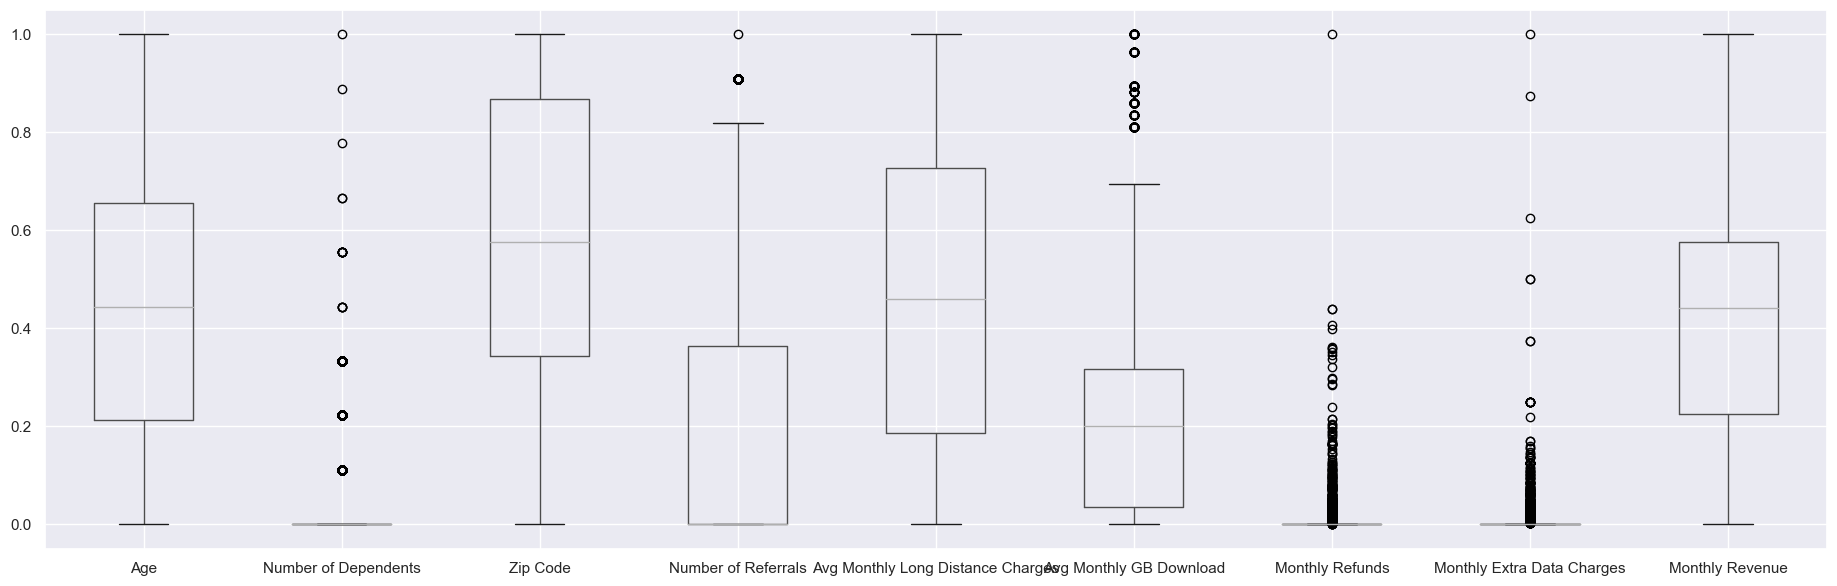

In [64]:
x_train_norm.loc[:, numerical_columns].boxplot(figsize=(23,7));

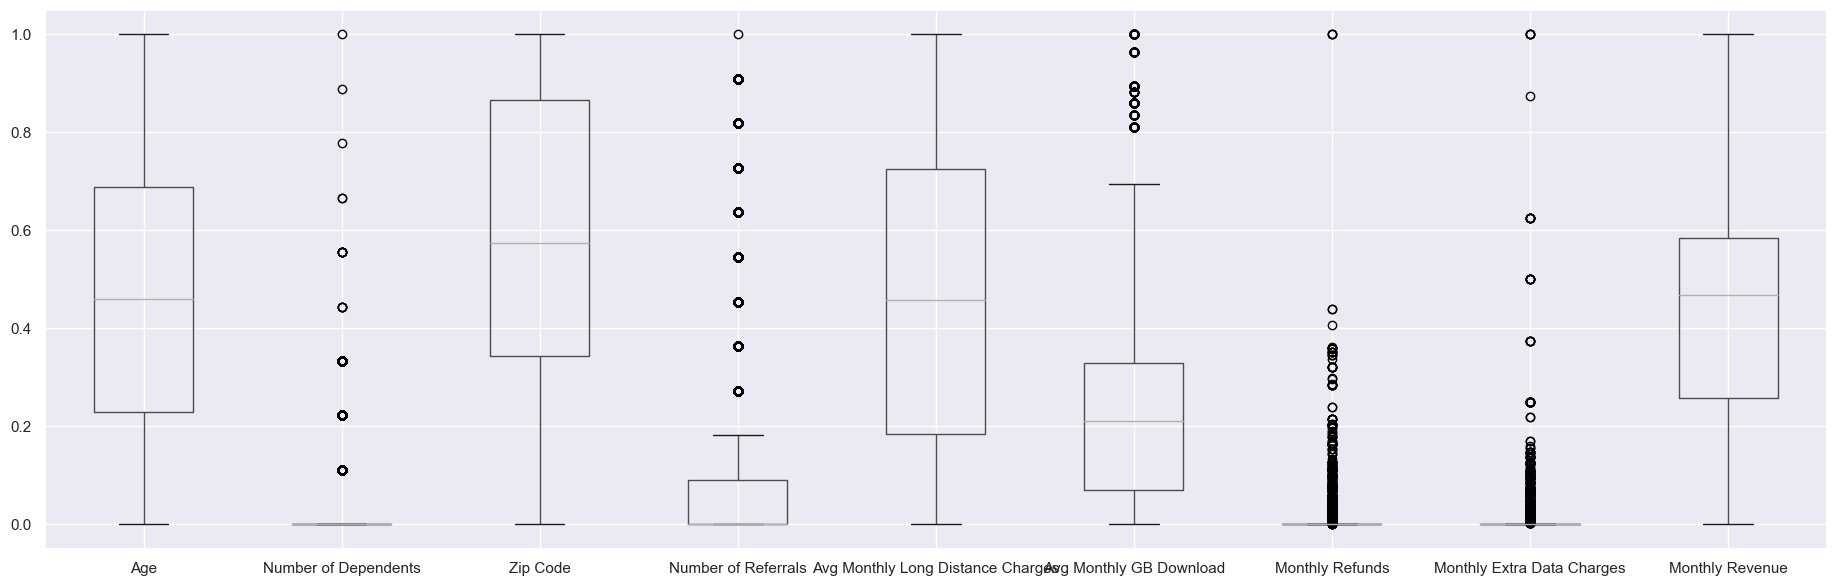

In [65]:
x_train_over_norm.loc[:, numerical_columns].boxplot(figsize=(23,7));

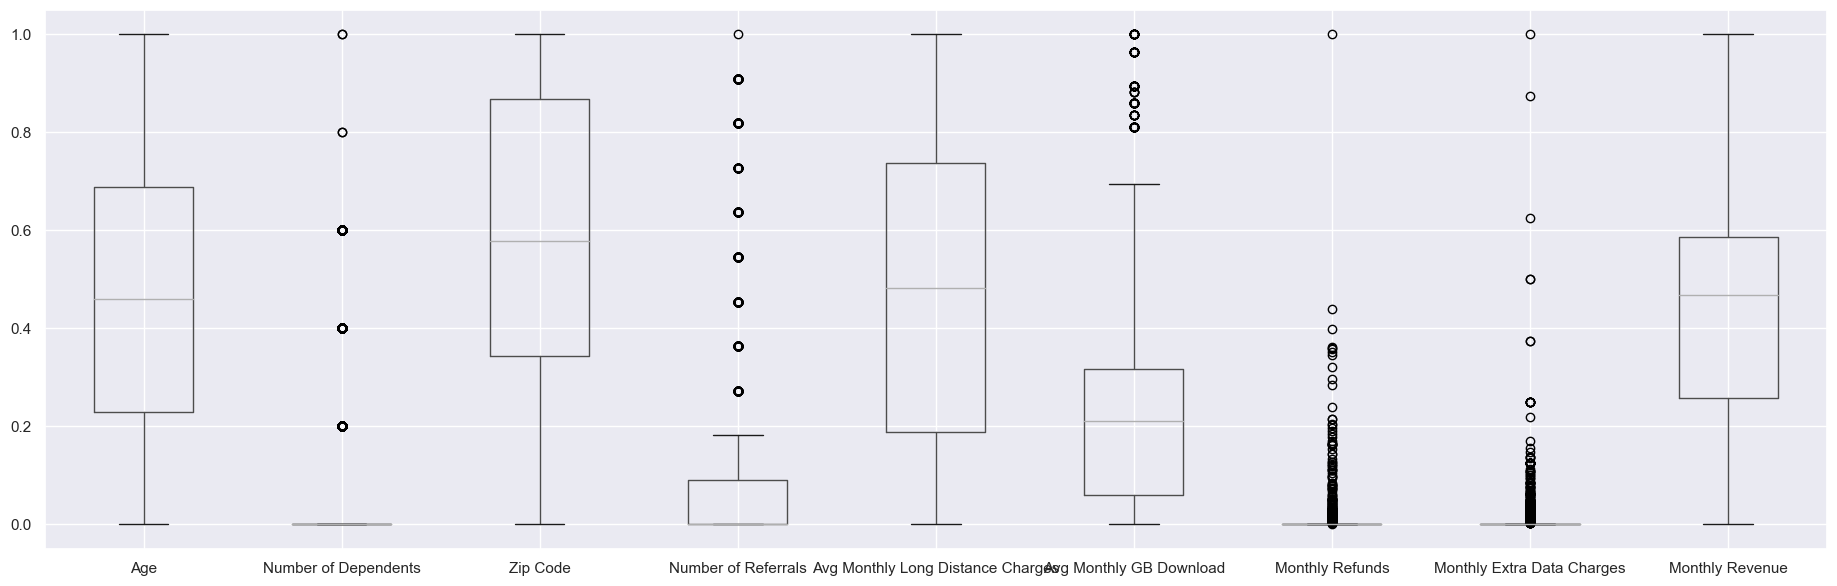

In [66]:
x_train_under_norm.loc[:, numerical_columns].boxplot(figsize=(23,7));

### Normalitzem validate

In [67]:
# VALIDATE 

x_val_norm = x_val.copy()
x_val_norm[numerical_columns] = min_max_scaler.fit_transform(x_val[numerical_columns])
x_val_norm.describe()
'''
for i in numerical_columns:
    x, _= boxcox(validate_new[i])
    validate_new[i + '_bx'] = x

validate_new[['Median Age_bxm', 'Total Population_bxm', 'Number of Veterans_bxm', 
            'Foreign-born_bxm', 'Average Household Size_bxm','Foreign_rate_bxm','Male_rate_bxm','Veterans_rate_bxm']] = min_max_scaler.fit_transform(validate_new[['Median Age_bx', 'Total Population_bx', 'Number of Veterans_bx', 
            'Foreign-born_bx', 'Average Household Size_bx','Foreign_rate_bx','Male_rate_bx','Veterans_rate_bx']])
validate_new = validate_new[['City', 'State', 'Median Age_bxm', 'Total Population_bxm', 'Number of Veterans_bxm', 
            'Foreign-born_bxm', 'Average Household Size_bxm','Foreign_rate_bxm','Male_rate_bxm','Veterans_rate_bxm']]
'''


Age  Number of Dependents  Zip Code  Number of Referrals  \
count  659.000               659.000   659.000              659.000   
mean     0.466                 0.065     0.557                0.146   
std      0.278                 0.149     0.312                0.252   
min      0.000                 0.000     0.000                0.000   
25%      0.230                 0.000     0.330                0.000   
50%      0.443                 0.000     0.557                0.000   
75%      0.689                 0.000     0.870                0.091   
max      1.000                 1.000     1.000                1.000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                            659.000                  659.000   
mean                               0.448                    0.251   
std                                0.310                    0.231   
min                                0.000                    0.000   
25%                                0.178                    0.082   
50%                                0.437                    0.212   
75%                                0.698                    0.318   
max                                1.000                    1.000   

       Monthly Refunds  Monthly Extra Data Charges  Monthly Revenue  
count          659.000                     659.000          659.000  
mean             0.014                       0.008            0.501  
std              0.077                       0.055            0.241  
min              0.000                       0.000            0.000  
25%              0.000                       0.000            0.295  
50%              0.000                       0.000            0.542  
75%              0.000                       0.000            0.691  
max              1.000                       1.000            1.000

"\nfor i in numerical_columns:\n    x, _= boxcox(validate_new[i])\n    validate_new[i + '_bx'] = x\n\nvalidate_new[['Median Age_bxm', 'Total Population_bxm', 'Number of Veterans_bxm', \n            'Foreign-born_bxm', 'Average Household Size_bxm','Foreign_rate_bxm','Male_rate_bxm','Veterans_rate_bxm']] = min_max_scaler.fit_transform(validate_new[['Median Age_bx', 'Total Population_bx', 'Number of Veterans_bx', \n            'Foreign-born_bx', 'Average Household Size_bx','Foreign_rate_bx','Male_rate_bx','Veterans_rate_bx']])\nvalidate_new = validate_new[['City', 'State', 'Median Age_bxm', 'Total Population_bxm', 'Number of Veterans_bxm', \n            'Foreign-born_bxm', 'Average Household Size_bxm','Foreign_rate_bxm','Male_rate_bxm','Veterans_rate_bxm']]\n"

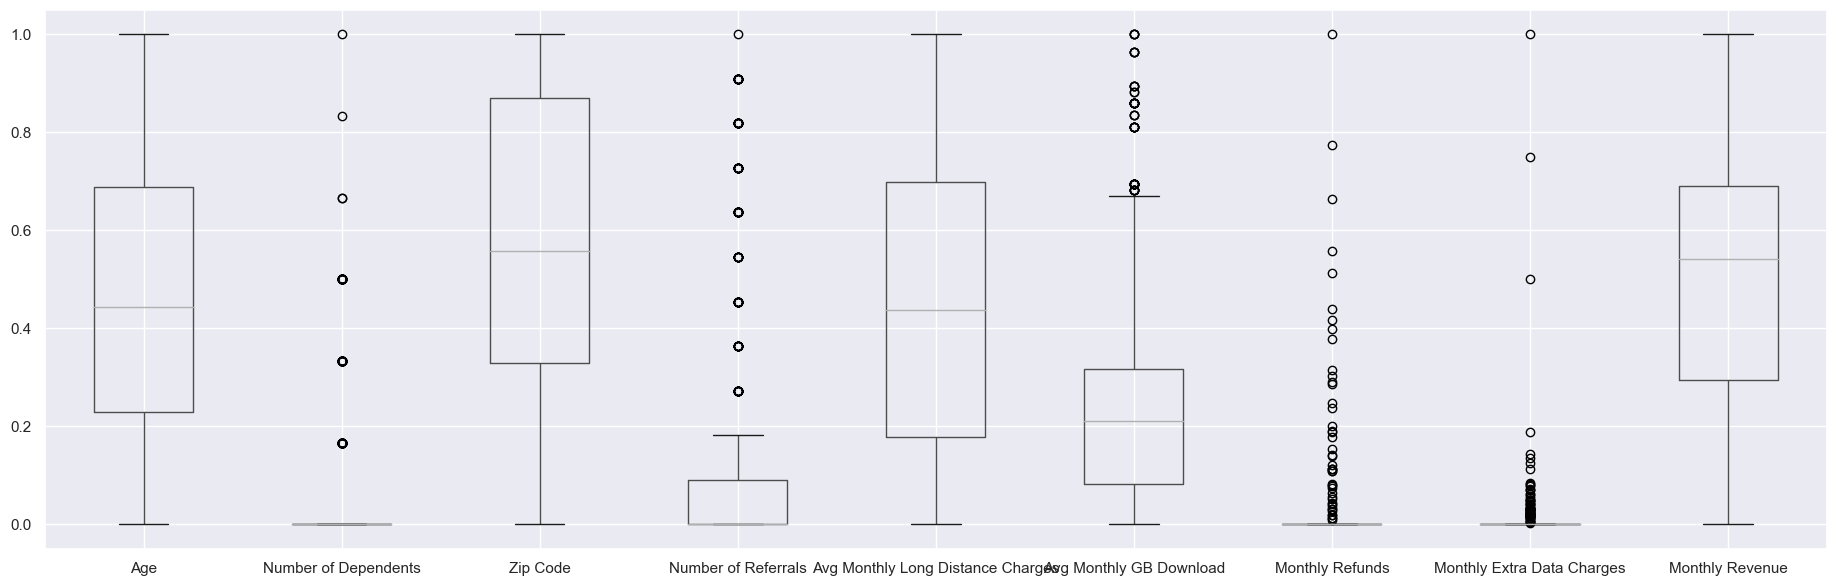

In [68]:
x_val_norm.loc[:, numerical_columns].boxplot(figsize=(23,7));

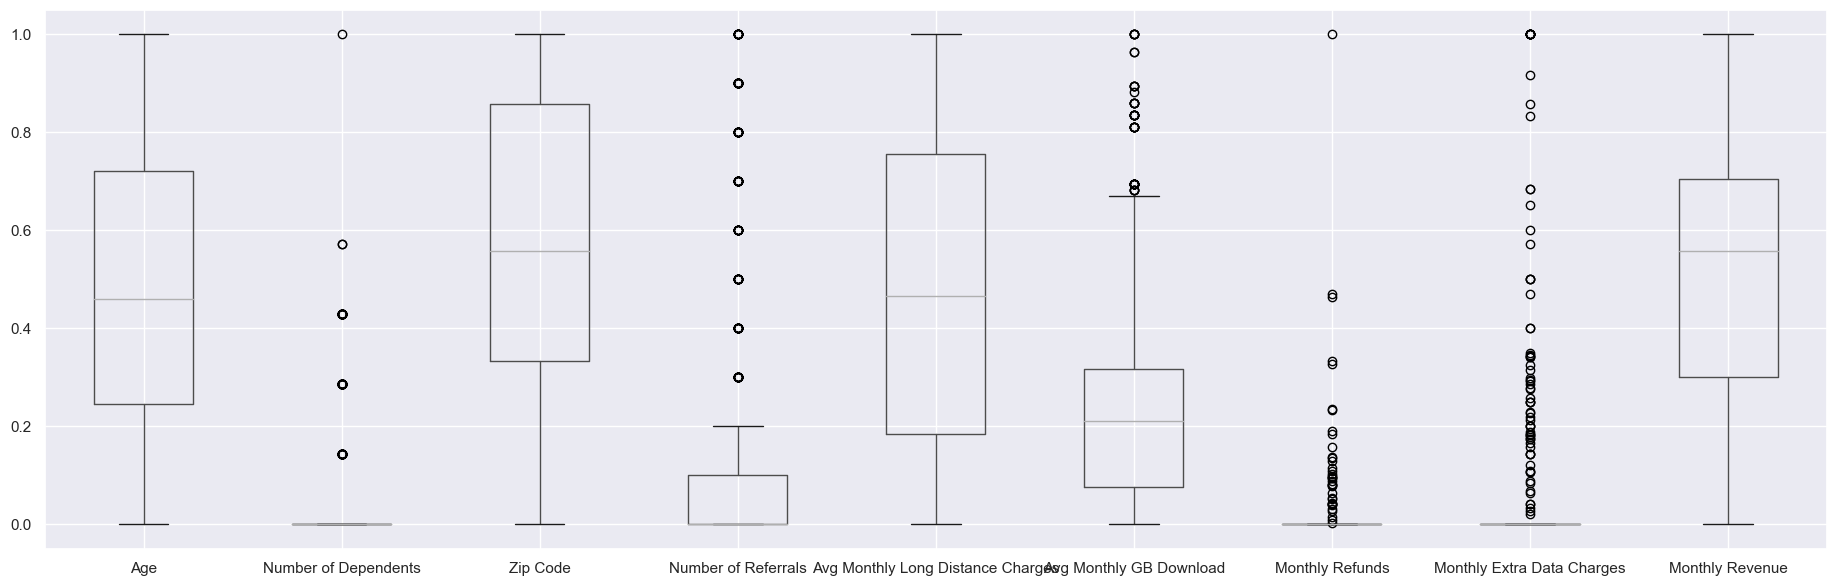

In [69]:
# Normalitzem test
x_test_norm = x_test.copy()
x_test_norm[numerical_columns] = min_max_scaler.fit_transform(x_test[numerical_columns])
x_test_norm.loc[:, numerical_columns].boxplot(figsize=(23,7));

## SECTION 4: Definició de Models 

### KNN

Adaptem els datasets per poder predir-los

In [70]:
x_val_norm.drop(columns=['Customer Status'], inplace = True)
x_test_norm.drop(columns=['Customer Status'], inplace = True)
x_train_norm.drop(columns=['Customer Status'], inplace = True)
x_train_over_norm.drop(columns=['Customer Status'], inplace = True)
x_train_under_norm.drop(columns=['Customer Status'], inplace = True)

In [71]:
x_train_norm.columns
diccionari_resultats={'KNN': [],
                     'DT': [],
                     'RF': [],
                      'XGB': [],
                    'SVM_L': [],
                     'SVM_R':[]}

Index(['Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Refunds',
       'Monthly Extra Data Charges', 'Monthly Revenue'],
      dtype='object')

In [72]:
# Definim funció scoring per evaluar quins hiperparàmetres ens funcionen millor amb la funció grid_seacrh_CV
from sklearn.metrics import *
def scorer(true,pred):
    return f1_score(pred,true, pos_label = 'Churned')

score = make_scorer(scorer, greater_is_better=True)

def scorer_xgb(true,pred):
    return f1_score(pred,true, pos_label = 0)

score_xgb = make_scorer(scorer_xgb, greater_is_better=True)

#### Preparem datasets per als models

In [73]:
# Adaptem datasets als models
 
# TRAIN weight
model_train_data_tmp = x_train_norm.copy()
model_train_data_tmp = pd.get_dummies(model_train_data_tmp)

# eliminem les columnes dummy binaries que no calen 
cols_to_drop = [col for col in model_train_data_tmp.columns if col.endswith('No')]

# Drop the columns 
model_train_data = model_train_data_tmp.drop(columns=cols_to_drop)

# TRAIN over
model_train_over_data_tmp = x_train_over_norm.copy()
model_train_over_data_tmp = pd.get_dummies(model_train_over_data_tmp)

# eliminem les columnes dummy binaries que no calen 
cols_to_drop = [col for col in model_train_over_data_tmp.columns if col.endswith('No')]

# Drop the columns 
model_train_over_data = model_train_over_data_tmp.drop(columns=cols_to_drop)



# TRAIN under
model_train_under_data_tmp = x_train_under_norm.copy()
model_train_under_data_tmp = pd.get_dummies(model_train_under_data_tmp)

# eliminem les columnes dummy binaries que no calen 
cols_to_drop = [col for col in model_train_under_data_tmp.columns if col.endswith('No')]

# Drop the columns 
model_train_under_data = model_train_under_data_tmp.drop(columns=cols_to_drop)

# VALIDATION
model_val_tmp = x_val_norm.copy()
model_val_tmp = pd.get_dummies(model_val_tmp)

# Drop the columns
model_val = model_val_tmp.drop(columns=cols_to_drop)


#### Preparem datasets y_train, y_val i y_test per a XGBoost

In [74]:
#Y_WEIGHTED
y_train_xgb = pd.get_dummies(y_train, drop_first = True)

#Y_OVERSAMPLED
y_train_over_xgb = pd.get_dummies(y_train_over, drop_first = True)

#Y_UNDERSAMPLED
y_train_under_xgb = pd.get_dummies(y_train_under, drop_first = True)

# Y_VAL
y_val_xgb = pd.get_dummies(y_val, drop_first = True)


In [75]:
from sklearn.model_selection import GridSearchCV
# MODEL AMB X_TRAIN_NORM (WEIGHTED)

# Create a KNN classifier
knn_weight = KNeighborsClassifier()

# Set up the hyperparameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 15,20,25],
    'weights': ['distance']
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=knn_weight, scoring = score, param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(model_train_data, y_train)

knn_weight = grid_search.best_estimator_

pred = knn_weight.predict(model_val)

# Print the best hyperparameters
print(grid_search.best_params_)

#confusion_matrix = confusion_matrix(y_val, pred)
#print(confusion_matrix)
 
print(classification_report(y_val,pred))

#print(knn.predict_proba(val))
y_val.value_counts()
resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['KNN'].append(resultat)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 15, 20, 25],
                         'weights': ['distance']},
             scoring=make_scorer(scorer))

{'n_neighbors': 20, 'weights': 'distance'}
              precision    recall  f1-score   support

     Churned       0.91      0.61      0.73       330
      Stayed       0.71      0.94      0.81       329

    accuracy                           0.78       659
   macro avg       0.81      0.78      0.77       659
weighted avg       0.81      0.78      0.77       659



Churned    330
Stayed     329
Name: Customer Status, dtype: int64

0.7332123411978221


In [76]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [77]:
# MODEL AMB X_TRAIN_OVER_NORM 

# Create a KNN classifier
knn_over = KNeighborsClassifier()

# Set up the hyperparameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 15,20,25]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=knn_over ,scoring = score,param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(model_train_over_data, y_train_over)

knn_over = grid_search.best_estimator_

pred = knn_over.predict(model_val)

# Print the best hyperparameters
print(grid_search.best_params_)

#confusion_matrix = confusion_matrix(y_val, pred)
#print(confusion_matrix)

print(classification_report(y_val,pred))
#print(grid_search.cv_results_)

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['KNN'].append(resultat)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 15, 20, 25]},
             scoring=make_scorer(scorer))

{'n_neighbors': 5}
              precision    recall  f1-score   support

     Churned       0.79      0.76      0.78       330
      Stayed       0.77      0.80      0.78       329

    accuracy                           0.78       659
   macro avg       0.78      0.78      0.78       659
weighted avg       0.78      0.78      0.78       659

0.775888717156105


In [78]:

from sklearn.metrics import *
# MODEL AMB X_TRAIN_UNDER_NORM 

# Create a KNN classifier
knn_under = KNeighborsClassifier()

# Set up the hyperparameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 15,20,25]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=knn_under, scoring = score,param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(model_train_under_data, y_train_under)

knn_under = grid_search.best_estimator_

pred = knn_under.predict(model_val)

# Print the best hyperparameters
print(grid_search.best_params_)

#confusion_matrix = confusion_matrix(y_val, pred)
#print(confusion_matrix)

print(classification_report(y_val,pred))
#print(grid_search.cv_results_)
resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['KNN'].append(resultat)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 15, 20, 25]},
             scoring=make_scorer(scorer))

{'n_neighbors': 9}
              precision    recall  f1-score   support

     Churned       0.76      0.86      0.81       330
      Stayed       0.84      0.73      0.78       329

    accuracy                           0.80       659
   macro avg       0.80      0.80      0.80       659
weighted avg       0.80      0.80      0.80       659

0.8091168091168092


### Decision Tree

In [79]:
# Weighted model 
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[5,7,9,10],
             'min_samples_leaf':[7,9,10,15],
             'min_samples_split':[1,3,5]}

clf = GridSearchCV(tree.DecisionTreeClassifier(class_weight = 'balanced' ), tree_para, scoring = score)
clf = clf.fit(model_train_data, y_train)
pred = clf.predict(model_val)

print(classification_report(y_val,pred))

# Print the best parameters
print(clf.best_params_)
resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['DT'].append(resultat)

              precision    recall  f1-score   support

     Churned       0.81      0.85      0.83       330
      Stayed       0.85      0.80      0.82       329

    accuracy                           0.83       659
   macro avg       0.83      0.83      0.83       659
weighted avg       0.83      0.83      0.83       659

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 1}
0.8306332842415317


In [80]:
# Oversampled model 
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['entropy'],
             'max_depth':[9,10,12],
             'min_samples_leaf':[9,10,12],
             'min_samples_split':[1,3,5]}

clf = GridSearchCV(tree.DecisionTreeClassifier(),tree_para, scoring = score )
#Utilitzem datasets amb oversampling
clf = clf.fit(model_train_over_data, y_train_over)
pred = clf.predict(model_val)

print(classification_report(y_val,pred))

# Print the best parameters
print(clf.best_params_)

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['DT'].append(resultat)

              precision    recall  f1-score   support

     Churned       0.84      0.81      0.82       330
      Stayed       0.81      0.84      0.83       329

    accuracy                           0.83       659
   macro avg       0.83      0.83      0.83       659
weighted avg       0.83      0.83      0.83       659

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 1}
0.822804314329738


In [81]:
# Undersampled model 
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],
             'max_depth':[5,7,9,10],
             'min_samples_leaf':[5,10,15],
             'min_samples_split':[1,3,5]}

clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_para, scoring = score)
#Utilitzem datasets amb oversampling
clf = clf.fit(model_train_under_data, y_train_under)
pred = clf.predict(model_val)

print(classification_report(y_val,pred))

# Print the best parameters
print(clf.best_params_)

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['DT'].append(resultat)

              precision    recall  f1-score   support

     Churned       0.80      0.86      0.83       330
      Stayed       0.85      0.79      0.82       329

    accuracy                           0.82       659
   macro avg       0.83      0.82      0.82       659
weighted avg       0.83      0.82      0.82       659

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 1}
0.8299120234604104


### Random Forest 

In [82]:
# Weighted RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,class_weight= 'balanced_subsample' )

# Define the hyperparameter grid
param_grid = {'criterion':['gini', 'entropy'],
              'n_estimators': [50,100],
              'max_depth': [10,15,20],
              'min_samples_split': [10,15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = score)

# Fit the object to the training data
grid_search.fit(model_train_data, y_train)

# Select the best model
rf = grid_search.best_estimator_

# Make predictions on the test set
pred = rf.predict(model_val)

print(classification_report(y_val,pred))

# Print the best parameters
print(grid_search.best_params_)

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['RF'].append(resultat)


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [10, 15],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(scorer))

              precision    recall  f1-score   support

     Churned       0.90      0.75      0.82       330
      Stayed       0.78      0.92      0.85       329

    accuracy                           0.83       659
   macro avg       0.84      0.83      0.83       659
weighted avg       0.84      0.83      0.83       659

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 15, 'n_estimators': 100}
0.8192371475953566


In [83]:
# Oversampled RF
rf_over = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {'criterion':['entropy','gini'],
              'n_estimators': [50,100],
              'max_depth': [10,15,20],
              'min_samples_split': [1,3,5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_over, param_grid=param_grid, scoring = score)

# Fit the object to the training data
grid_search.fit(model_train_over_data, y_train_over)

# Select the best model
rf_over = grid_search.best_estimator_

# Make predictions on the test set
pred = rf_over.predict(model_val)

print(classification_report(y_val,pred))

# Print the best parameters
print(grid_search.best_params_)

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['RF'].append(resultat)


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(scorer))

              precision    recall  f1-score   support

     Churned       0.92      0.68      0.78       330
      Stayed       0.75      0.94      0.83       329

    accuracy                           0.81       659
   macro avg       0.83      0.81      0.81       659
weighted avg       0.83      0.81      0.81       659

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 1, 'n_estimators': 100}
0.7847222222222222


In [84]:
# Undersampled RF
from sklearn.ensemble import RandomForestClassifier

rf_under = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {'criterion':['entropy','gini'],
              'n_estimators': [50,100],
              'max_depth': [5,7,10],
              'min_samples_split': [1,3,5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_under, param_grid=param_grid, scoring = score)

# Fit the object to the training data
grid_search.fit(model_train_under_data, y_train_under)

# Select the best model
rf_under = grid_search.best_estimator_

# Make predictions on the test set
pred = rf_under.predict(model_val)

print(classification_report(y_val,pred))

# Print the best parameters
print(grid_search.best_params_)

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['RF'].append(resultat)


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [50, 100]},
             scoring=make_scorer(scorer))

              precision    recall  f1-score   support

     Churned       0.82      0.87      0.85       330
      Stayed       0.86      0.81      0.84       329

    accuracy                           0.84       659
   macro avg       0.84      0.84      0.84       659
weighted avg       0.84      0.84      0.84       659

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 100}
0.845360824742268


### XGBOOST

In [85]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y= y_train
)

xgb = XGBClassifier(random_state=42 )

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [4,5],
    'n_estimators': [100,150],
    
}

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring = score_xgb)

# Fit the grid search object to the data
grid_search.fit(model_train_data,y_train_xgb, sample_weight=classes_weights )

xgb = grid_search.best_estimator_

pred = xgb.predict(model_val)

print(classification_report(y_val_xgb,pred))

# Print the best parameters and the best score
print('Best parameters:', grid_search.best_params_)

resultat = f1_score(pred,y_val_xgb, pos_label = 0)
print(resultat)
diccionari_resultats['XGB'].append(resultat)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [4, 5],
                         'n_estimators': [100, 150]},
             scoring=make_scorer(scorer_xgb))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       330
           1       0.82      0.88      0.85       329

    accuracy                           0.84       659
   macro avg       0.85      0.84      0.84       659
weighted avg       0.85      0.84      0.84       659

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
0.8372827804107424


In [86]:
from xgboost import XGBClassifier

# Oversampling
xgb = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [4,5],
    'n_estimators': [100,150],
    
}

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring = score_xgb)

# Fit the grid search object to the data
grid_search.fit(model_train_over_data,y_train_over_xgb )

xgb = grid_search.best_estimator_

pred = xgb.predict(model_val)

print(classification_report(y_val_xgb,pred))

# Print the best parameters and the best score
print('Best parameters:', grid_search.best_params_)

resultat = f1_score(pred,y_val_xgb, pos_label = 0)
print(resultat)
diccionari_resultats['XGB'].append(resultat)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [4, 5],
                         'n_estimators': [100, 150]},
             scoring=make_scorer(scorer_xgb))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       330
           1       0.76      0.92      0.83       329

    accuracy                           0.81       659
   macro avg       0.83      0.82      0.81       659
weighted avg       0.83      0.81      0.81       659

Best parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150}
0.793918918918919


In [87]:
from xgboost import XGBClassifier
# Undersampling

xgb = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1,0.5,1],
    'max_depth': [3,4,5],
    'n_estimators': [200,250],
    
}


# Create the grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring = score_xgb)

# Fit the grid search object to the data
grid_search.fit(model_train_under_data,y_train_under_xgb )

xgb = grid_search.best_estimator_

pred = xgb.predict(model_val)

print(classification_report(y_val_xgb,pred))

# Print the best parameters and the best score
print('Best parameters:', grid_search.best_params_)

resultat = f1_score(pred,y_val_xgb, pos_label = 0)
print(resultat)
diccionari_resultats['XGB'].append(resultat)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 4, 5],
                         'n_estimators': [200, 250]},
             scoring=make_scorer(scorer_xgb))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       330
           1       0.88      0.84      0.86       329

    accuracy                           0.86       659
   macro avg       0.86      0.86      0.86       659
weighted avg       0.86      0.86      0.86       659

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.8651851851851852


### SVM linear

In [88]:
# SVM LINEAR amb weighted
from sklearn.svm import SVC

# Set up the parameter grid for grid search
param_grid = {'C': [0.5, 1, 2],
             'gamma':  ['auto', 'scale']}

# Set up the SVM model
svm = SVC(kernel='linear',class_weight = 'balanced')

# Set up the grid search
grid_search = GridSearchCV(svm, param_grid , scoring = score)

# Fit the model
grid_search.fit(model_train_data, y_train)

svm = grid_search.best_estimator_

pred = svm.predict(model_val)
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

print(classification_report(y_val,pred))

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['SVM_L'].append(resultat)


GridSearchCV(estimator=SVC(class_weight='balanced', kernel='linear'),
             param_grid={'C': [0.5, 1, 2], 'gamma': ['auto', 'scale']},
             scoring=make_scorer(scorer))

Best parameters: {'C': 1, 'gamma': 'auto'}
              precision    recall  f1-score   support

     Churned       0.82      0.84      0.83       330
      Stayed       0.84      0.81      0.82       329

    accuracy                           0.83       659
   macro avg       0.83      0.83      0.83       659
weighted avg       0.83      0.83      0.83       659

0.8298507462686566


In [89]:
# SVM LINEAR amb oversampling

# Set up the parameter grid for grid search
param_grid = {'C': [0.5, 1, 2],
             'gamma':  ['auto', 'scale']}

# Set up the SVM model
svm_over = SVC(kernel='linear')

# Set up the grid search
grid_search = GridSearchCV(svm_over, param_grid , scoring = score)

# Fit the model
grid_search.fit(model_train_over_data, y_train_over)

svm_over = grid_search.best_estimator_

pred = svm_over.predict(model_val)
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

print(classification_report(y_val,pred))

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['SVM_L'].append(resultat)


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.5, 1, 2], 'gamma': ['auto', 'scale']},
             scoring=make_scorer(scorer))

Best parameters: {'C': 1, 'gamma': 'auto'}
              precision    recall  f1-score   support

     Churned       0.83      0.87      0.85       330
      Stayed       0.86      0.82      0.84       329

    accuracy                           0.85       659
   macro avg       0.85      0.85      0.85       659
weighted avg       0.85      0.85      0.85       659

0.849112426035503


In [90]:
# SVM LINEAR amb undersampling

# Set up the parameter grid for grid search
param_grid = {'C': [0.5, 1, 2],
             'gamma':  ['auto', 'scale']}

# Set up the SVM model
svm_under = SVC(kernel='linear')

# Set up the grid search
grid_search = GridSearchCV(svm_under, param_grid, scoring = score )

# Fit the model
grid_search.fit(model_train_under_data, y_train_under)

svm_under = grid_search.best_estimator_

pred = svm_under.predict(model_val)
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

print(classification_report(y_val,pred))

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['SVM_L'].append(resultat)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.5, 1, 2], 'gamma': ['auto', 'scale']},
             scoring=make_scorer(scorer))

Best parameters: {'C': 1, 'gamma': 'auto'}
              precision    recall  f1-score   support

     Churned       0.80      0.85      0.82       330
      Stayed       0.84      0.79      0.81       329

    accuracy                           0.82       659
   macro avg       0.82      0.82      0.82       659
weighted avg       0.82      0.82      0.82       659

0.8230088495575221


### SVM radial

In [91]:
# SVM Radial amb weighted

# Set up the parameter grid for grid search
param_grid = {'C': [1, 2,3],
             'gamma':['auto','scale']}

# Set up the SVM model
svm_r = SVC(kernel='rbf',class_weight = 'balanced')

# Set up the grid search
grid_search = GridSearchCV(svm_r, param_grid, scoring = score )

# Fit the model
grid_search.fit(model_train_data, y_train)

svm_r = grid_search.best_estimator_

pred = svm_r.predict(model_val)
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

print(classification_report(y_val,pred))

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['SVM_R'].append(resultat)


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 2, 3], 'gamma': ['auto', 'scale']},
             scoring=make_scorer(scorer))

Best parameters: {'C': 2, 'gamma': 'scale'}
              precision    recall  f1-score   support

     Churned       0.84      0.81      0.83       330
      Stayed       0.82      0.85      0.83       329

    accuracy                           0.83       659
   macro avg       0.83      0.83      0.83       659
weighted avg       0.83      0.83      0.83       659

0.8266253869969039


In [92]:
# SVM Radial amb oversampling

# Set up the parameter grid for grid search
param_grid = {'C': [1,2,3],
             'gamma':['auto','scale']}

# Set up the SVM model
svm_r_over = SVC(kernel='rbf')

# Set up the grid search
grid_search = GridSearchCV(svm_r_over, param_grid, scoring = score)

# Fit the model
grid_search.fit(model_train_over_data, y_train_over)

svm_r_over = grid_search.best_estimator_

pred = svm_r_over.predict(model_val)
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

print(classification_report(y_val,pred))

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['SVM_R'].append(resultat)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': ['auto', 'scale']},
             scoring=make_scorer(scorer))

Best parameters: {'C': 3, 'gamma': 'scale'}
              precision    recall  f1-score   support

     Churned       0.85      0.79      0.82       330
      Stayed       0.80      0.86      0.83       329

    accuracy                           0.83       659
   macro avg       0.83      0.83      0.83       659
weighted avg       0.83      0.83      0.83       659

0.8188976377952757


In [93]:
# SVM Radial amb undersampling

# Set up the parameter grid for grid search
param_grid = {'C': [1,2,3],
             'gamma':['auto','scale']}

# Set up the SVM model
svm_r_under = SVC(kernel='rbf')

# Set up the grid search
grid_search = GridSearchCV(svm_r_under, param_grid , scoring = score)

# Fit the model
grid_search.fit(model_train_under_data, y_train_under)

svm_r_under = grid_search.best_estimator_

pred = svm_r_under.predict(model_val)
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

print(classification_report(y_val,pred))

resultat = f1_score(pred,y_val, pos_label = 'Churned')
print(resultat)
diccionari_resultats['SVM_R'].append(resultat)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': ['auto', 'scale']},
             scoring=make_scorer(scorer))

Best parameters: {'C': 2, 'gamma': 'auto'}
              precision    recall  f1-score   support

     Churned       0.81      0.86      0.83       330
      Stayed       0.85      0.80      0.82       329

    accuracy                           0.83       659
   macro avg       0.83      0.83      0.83       659
weighted avg       0.83      0.83      0.83       659

0.8323529411764705


### Selecció del model 

In [94]:
m_results = pd.DataFrame(diccionari_resultats)
m_results.rename(index = {0:'Weighted', 1: 'Oversampled', 2: 'Undersampled'}, inplace = True)
m_results.head()



KNN     DT     RF    XGB  SVM_L  SVM_R
Weighted      0.733  0.831  0.819  0.837  0.830  0.827
Oversampled   0.776  0.823  0.785  0.794  0.849  0.819
Undersampled  0.809  0.830  0.845  0.865  0.823  0.832

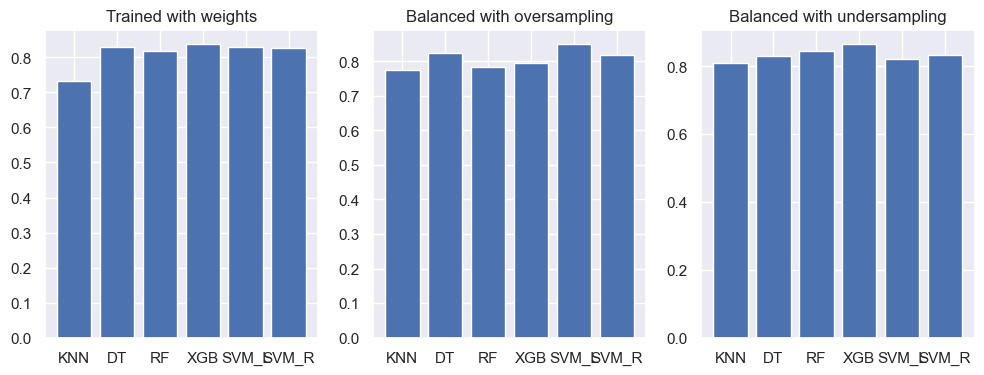

In [95]:
row1 = m_results.iloc[0]
row2 = m_results.iloc[1]
row3 = m_results.iloc[2]

# Set figure size
plt.figure(figsize=(12, 4))

# Plot first row
plt.subplot(131)
plt.bar(row1.index, row1.values)
plt.title('Trained with weights')

# Plot second row
plt.subplot(132)
plt.bar(row2.index, row2.values)
plt.title('Balanced with oversampling')

# Plot third row
plt.subplot(133)
plt.bar(row3.index, row3.values)
plt.title('Balanced with undersampling')

plt.show()
fig.tight_layout();

### Prediccions amb test 

In [96]:
# Juntem train_under i val
x_train_def = pd.concat([model_train_under_data,model_val])
y_train_def = pd.concat([y_train_under_xgb,y_val_xgb])
y_train_def.shape
x_train_def.shape

(3077, 1)

(3077, 37)

In [97]:
# Preparem test per ser predit amb xgboost

# Fem Dummies a Test 
test_tmp = x_test_norm.copy()
test_tmp = pd.get_dummies(test_tmp)
x_test_def = test_tmp.drop(columns=cols_to_drop)
x_test_def.head()

#Y_TEST
y_test_xgb = pd.get_dummies(y_test, drop_first = True)
y_test_xgb.head()

Age  Number of Dependents  Zip Code  Number of Referrals  \
6470  0.361                 0.000     0.003                  0.1   
4358  0.131                 0.429     0.414                  0.0   
5678  0.885                 0.000     0.344                  0.0   
6592  0.525                 0.286     0.196                  0.0   
5430  0.934                 0.000     0.596                  0.3   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
6470                              0.100                    0.118   
4358                              0.811                    0.694   
5678                              0.451                    0.318   
6592                              0.516                    0.224   
5430                              0.985                    0.200   

      Monthly Refunds  Monthly Extra Data Charges  Monthly Revenue  \
6470            0.000                         0.0            0.692   
4358            0.000                         0.0            0.463   
5678            0.000                         1.0            0.588   
6592            0.470                         0.0            0.602   
5430            0.115                         0.0            0.902   

      Married_Yes  ...  Streaming Movies_Yes  Streaming Music_Yes  \
6470            1  ...                     1                    1   
4358            1  ...                     0                    0   
5678            0  ...                     0                    0   
6592            0  ...                     1                    1   
5430            1  ...                     0                    0   

      Unlimited Data_Yes  Contract_Month-to-Month  Contract_One Year  \
6470                   1                        1                  0   
4358                   1                        1                  0   
5678                   0                        1                  0   
6592                   1                        1                  0   
5430                   1                        1                  0   

      Contract_Two Year  Paperless Billing_Yes  \
6470                  0                      1   
4358                  0                      1   
5678                  0                      1   
6592                  0                      0   
5430                  0                      1   

      Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
6470                               1                           0   
4358                               1                           0   
5678                               1                           0   
6592                               1                           0   
5430                               1                           0   

      Payment Method_Mailed Check  
6470                            0  
4358                            0  
5678                            0  
6592                            0  
5430                            0  

[5 rows x 37 columns]

Stayed
6470       0
4358       0
5678       0
6592       0
5430       0

In [98]:
# TEST
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42,learning_rate = 0.1, max_depth = 3, n_estimators=200)

xgb.fit(x_train_def,y_train_def )

pred = xgb.predict(x_test_def)

print(classification_report(y_test_xgb,pred))


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       330
           1       0.87      0.79      0.83       329

    accuracy                           0.84       659
   macro avg       0.84      0.84      0.84       659
weighted avg       0.84      0.84      0.84       659



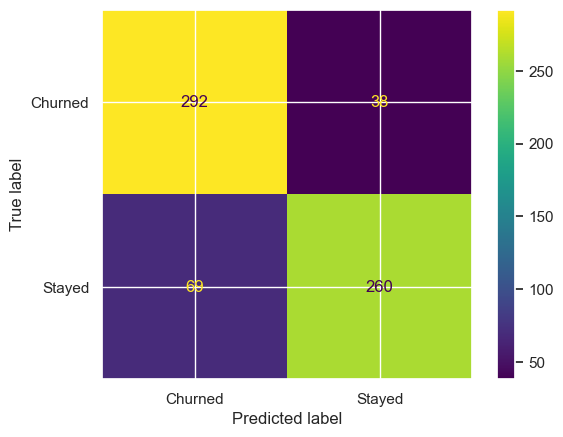

In [99]:
confusion_matrix = confusion_matrix(y_test_xgb,pred, labels=xgb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix ,display_labels=['Churned','Stayed'])
disp.plot()
plt.show()


## SECTION 6: Clustering

#### HC

In [100]:
y_train.value_counts()

Stayed     4062
Churned    1209
Name: Customer Status, dtype: int64

#### 2 clusters

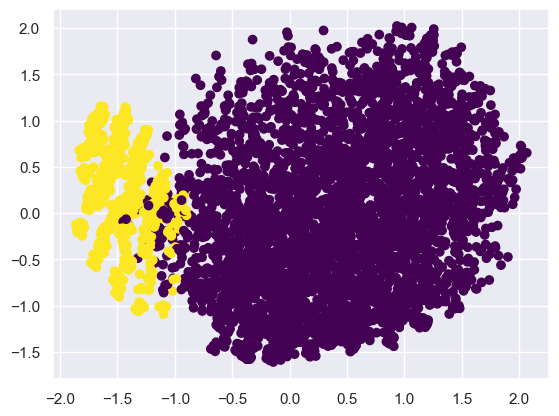

In [101]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Train the hierarchical clustering model
HC = AgglomerativeClustering(n_clusters=2)
clusters = HC.fit_predict(model_train_data)

# Use PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(model_train_data)

# Visualize the clusters using a scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.show()

In [102]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 1]

cluster_0_samples['Customer Status'].value_counts()

Stayed     1069
Churned      74
Name: Customer Status, dtype: int64

In [103]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 0]

cluster_0_samples['Customer Status'].value_counts()

Stayed     2993
Churned    1135
Name: Customer Status, dtype: int64

#### 3 clusters

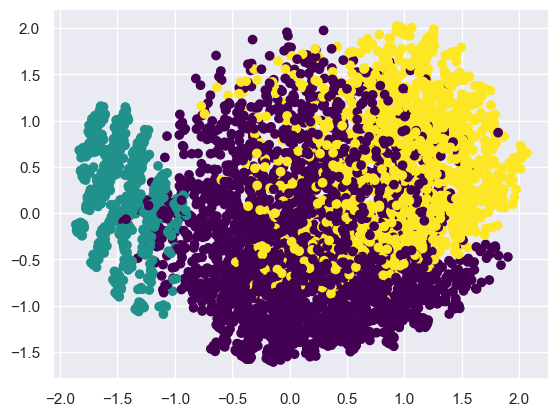

In [104]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Train the hierarchical clustering model
HC = AgglomerativeClustering(n_clusters=3)
clusters = HC.fit_predict(model_train_data)

# Use PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(model_train_data)

# Visualize the clusters using a scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.show()

In [105]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 0]

cluster_0_samples['Customer Status'].value_counts()

Stayed     1751
Churned    1053
Name: Customer Status, dtype: int64

In [106]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 1]

cluster_0_samples['Customer Status'].value_counts()

Stayed     1069
Churned      74
Name: Customer Status, dtype: int64

In [107]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 2]

cluster_0_samples['Customer Status'].value_counts()

Stayed     1242
Churned      82
Name: Customer Status, dtype: int64

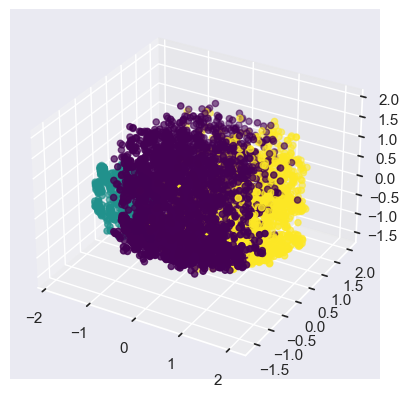

In [108]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(model_train_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis')
plt.show()

#### DBSCAN

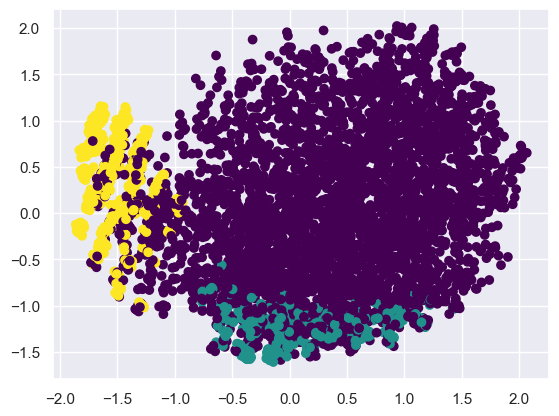

In [109]:
from sklearn.cluster import DBSCAN

# Train the hierarchical clustering model
DB = DBSCAN(eps=1.5, min_samples=75)
clusters = DB.fit_predict(model_train_data)

# Use PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(model_train_data)

# Visualize the clusters using a scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.show()

In [110]:
clusters

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [111]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 0]

cluster_0_samples['Customer Status'].value_counts()

Churned    296
Stayed     134
Name: Customer Status, dtype: int64

In [112]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == 1]

cluster_0_samples['Customer Status'].value_counts()

Stayed     859
Churned     53
Name: Customer Status, dtype: int64

In [113]:
df = pd.concat([model_train_data, y_train], axis=1)
cluster_0_samples = df[clusters == -1]

cluster_0_samples['Customer Status'].value_counts()

Stayed     3069
Churned     860
Name: Customer Status, dtype: int64

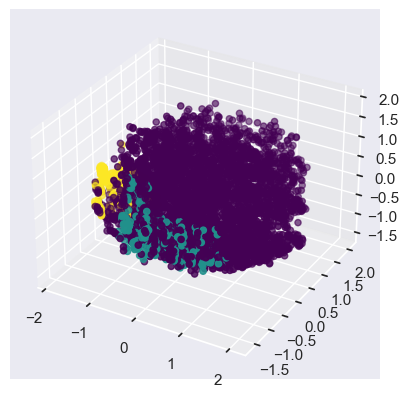

In [114]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(model_train_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis')
plt.show()